# DA514 Class Project

# Analyze education/job data about Kagglers

You are doing consulting work for a company (think of Google, Coursera or a startup) that wants to know more about data science professionals or data science students around the world, so as to launch a new product/business.

They have collected data about Kaggle competition participants which is given you to analyze, study and draw insights from. You are also asked to build a machine learning model for predicting a given target variable.

## Features
**Target Variable**: Job satisfaction level of Kaggler 

**Features**: Demographic features, Features Related to Workplace and many others...

See the file **`dataset_explanation.csv`** for a complete list of 53 features and their explanations.

<pre>
Index(['ID', 'GenderSelect', 'Country', 'Age', 'EmploymentStatus',
       'CodeWriter', 'CurrentJobTitleSelect', 'TitleFit',
       'CurrentEmployerType', 'MLToolNextYearSelect', 'MLMethodNextYearSelect',
       'LanguageRecommendationSelect', 'LearningPlatformUsefulnessBlogs',
       'LearningPlatformUsefulnessKaggle', 'LearningPlatformUsefulnessCourses',
       'LearningPlatformUsefulnessProjects', 'LearningPlatformUsefulnessSO',
       'LearningPlatformUsefulnessTextbook',
       'LearningPlatformUsefulnessYouTube', 'DataScienceIdentitySelect',
       'FormalEducation', 'MajorSelect', 'Tenure', 'PastJobTitlesSelect',
       'MLSkillsSelect', 'MLTechniquesSelect', 'EmployerIndustry',
       'EmployerSize', 'WorkProductionFrequency', 'WorkAlgorithmsSelect',
       'WorkToolsFrequencyPython', 'WorkToolsFrequencyR',
       'WorkToolsFrequencySQL', 'WorkMethodsFrequencyCross-Validation',
       'WorkMethodsFrequencyDataVisualization',
       'WorkMethodsFrequencyDecisionTrees',
       'WorkMethodsFrequencyLogisticRegression',
       'WorkMethodsFrequencyNeuralNetworks', 'WorkMethodsFrequencyPCA',
       'WorkMethodsFrequencyRandomForests',
       'WorkMethodsFrequencyTimeSeriesAnalysis',
       'WorkChallengeFrequencyPolitics', 'WorkChallengeFrequencyUnusedResults',
       'WorkChallengeFrequencyDirtyData', 'WorkChallengeFrequencyExplaining',
       'WorkChallengeFrequencyTalent', 'WorkChallengeFrequencyClarity',
       'WorkChallengeFrequencyDataAccess', 'CompensationScore',
       'WorkDataVisualizations', 'WorkInternalVsExternalTools',
       'WorkMLTeamSeatSelect', 'RemoteWork', 'JobSatisfaction'],
      dtype='object')
</pre>



In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import missingno
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, KFold
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
sns.set()

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
y = df['JobSatisfaction']
X = df.drop(['JobSatisfaction', 'ID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y, random_state=42)
train_set = pd.concat([X_train, y_train], axis=1)

In [ ]:
LabelEncoder=["GenderSelect", "DataScienceIdentitySelect"]

Scaler = ["Age", "CompensationScore"]

OrdinalEncoder = ["TitleFit", "WorkMethodsFrequencyCross-Validation", "WorkMethodsFrequencyDataVisualization", "WorkMethodsFrequencyDecisionTrees", "WorkMethodsFrequencyLogisticRegression",
                  "WorkMethodsFrequencyNeuralNetworks","WorkMethodsFrequencyPCA","WorkMethodsFrequencyRandomForests","WorkChallengeFrequencyPolitics","WorkChallengeFrequencyUnusedResults",
                  "WorkChallengeFrequencyDirtyData", "WorkChallengeFrequencyExplaining", "WorkChallengeFrequencyTalent","WorkChallengeFrequencyClarity","WorkChallengeFrequencyDataAccess",
                  "LearningPlatformUsefulnessBlogs","LearningPlatformUsefulnessKaggle","LearningPlatformUsefulnessCourses","LearningPlatformUsefulnessProjects","LearningPlatformUsefulnessSO",
                  "LearningPlatformUsefulnessTextbook","LearningPlatformUsefulnessYouTube", "WorkToolsFrequencyPython", "WorkToolsFrequencyR", "WorkToolsFrequencySQL", "WorkDataVisualizations",
                  "RemoteWork" ]

 Binary_Encoder = ["Country","CurrentEmployerType" "MLToolNextYearSelect","MethodNextYearSelect", "CurrentEmployerType", "MLToolNextYearSelect",  "MLMethodNextYearSelect", "LanguageRecommendationSelect",
                   "FormalEducation", "MajorSelect", "Tenure", "PastJobTitlesSelect", "MLSkillsSelect", "MLTechniquesSelect", "EmployerIndustry", "EmployerSize", "WorkAlgorithmsSelect", "WorkInternalVsExternalTools",
                   "WorkMLTeamSeatSelect"
                   ]

In [ ]:
df.head()

ID GenderSelect  ... RemoteWork  JobSatisfaction
0   1         Male  ...        NaN              Low
1   2         Male  ...        NaN           Medium
2   3       Female  ...     Rarely           Medium
3   4       Female  ...     Rarely             High
4   5       Female  ...     Rarely             High

[5 rows x 54 columns]

In [ ]:
#Group the features according to their data types
string_cols = []
numeric_cols = []

for col in df.drop(['ID', 'JobSatisfaction'], axis=1).columns:
  if df[col].dtype == 'object':
    string_cols.append(col)
  if df[col].dtype in('int64', 'float64'):
    numeric_cols.append(col)

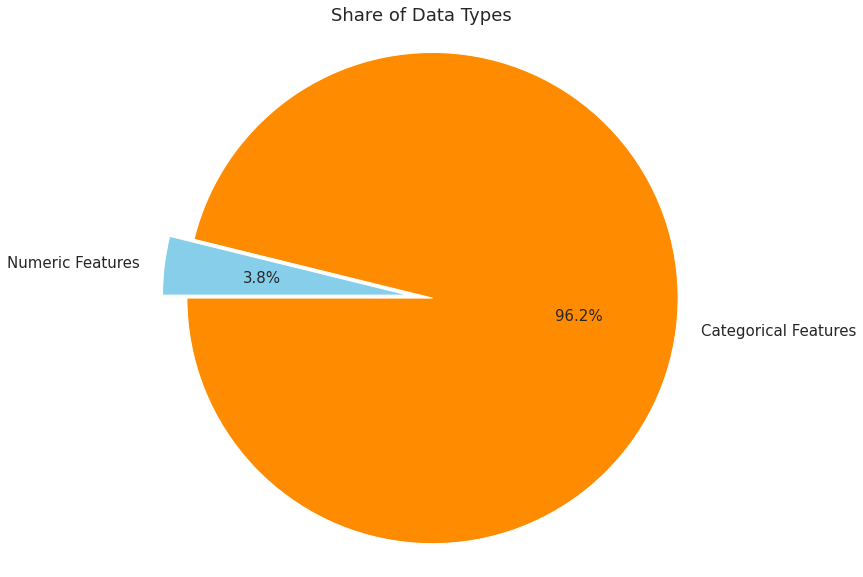

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Categorical Features', 'Numeric Features'
sizes = [len(string_cols), len(numeric_cols)]

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=180, colors=['darkorange', 'skyblue'], textprops={'fontsize': 15}, explode=[0,0.1])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Share of Data Types", fontsize=18);

''

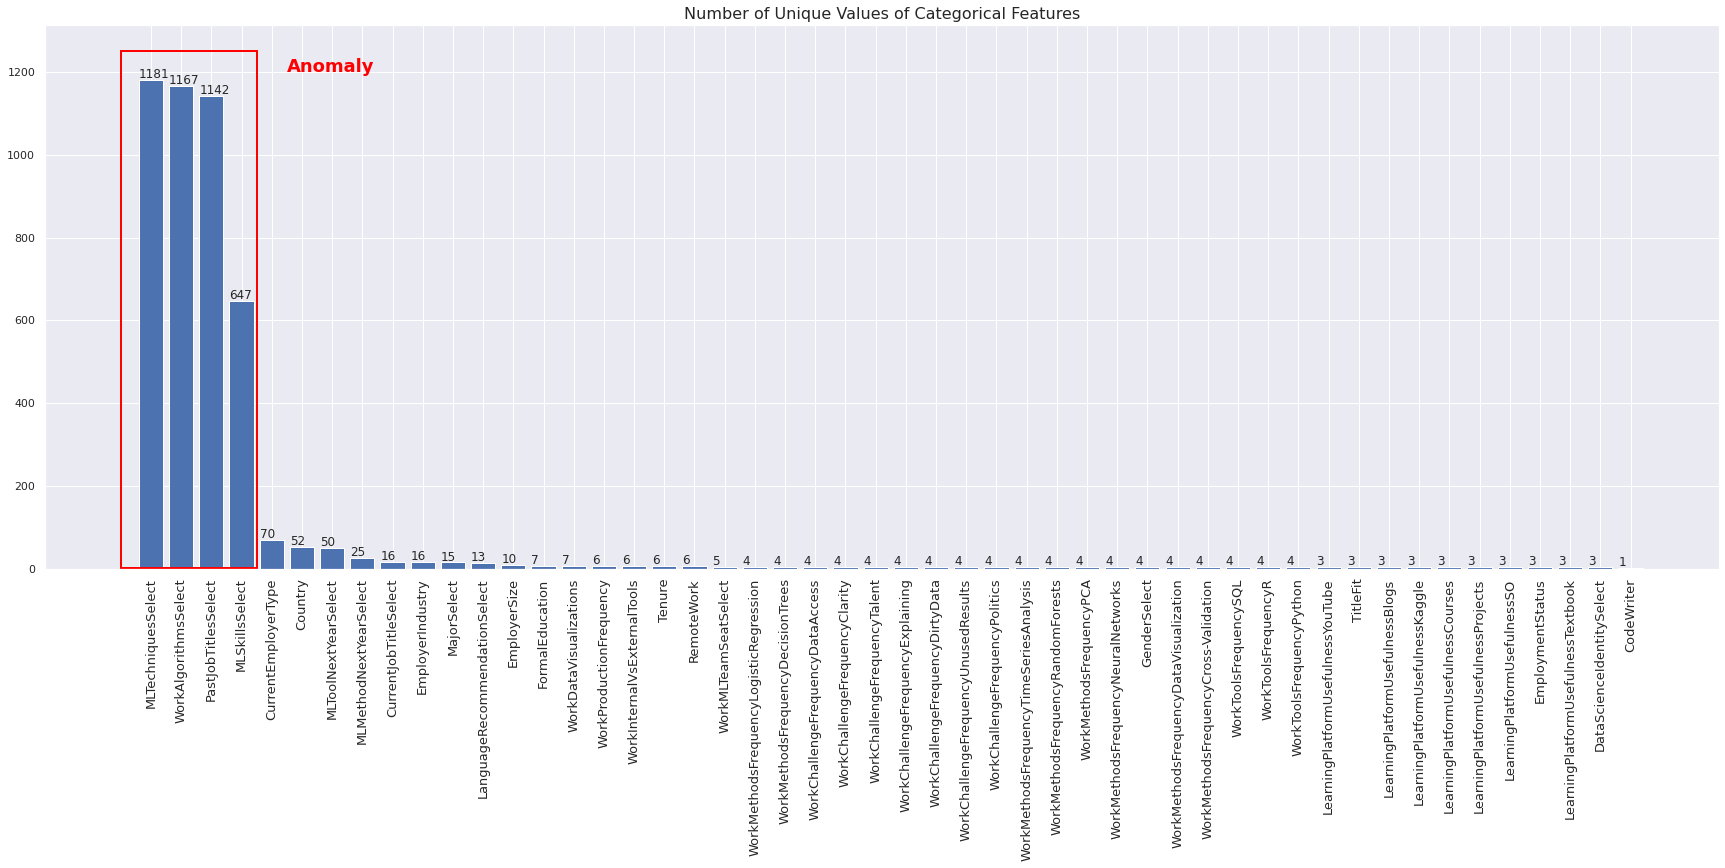

In [ ]:
import matplotlib.patches as patches
size_dict = {}
for col in string_cols:
  size_dict[col] = df[col].nunique()

size_df = pd.DataFrame.from_dict(size_dict, orient='index').reset_index().rename(columns={0:'Number of Unique Values','index': 'Categoric Features'}).sort_values(by='Number of Unique Values', ascending=False)

feature_names = list(size_df['Categoric Features'].values)
fig, ax = plt.subplots(figsize=(30,10))
ax.bar(size_df['Categoric Features'], size_df['Number of Unique Values'])
ax.add_patch(patches.Rectangle((-1,1), 4.5, 1250, color="red", fill=False, linewidth = 2))
plt.xticks(rotation=90, fontsize=13)
plt.text(4.5, 1200, "Anomaly", fontdict={'fontsize': 18, 'color': 'red','fontweight':'bold'})
plt.title('Number of Unique Values of Categorical Features', fontsize=16)

for i, j in enumerate(size_df['Number of Unique Values']):
  plt.text(i-0.4,j+5, j, fontdict={'fontsize': 12})
;

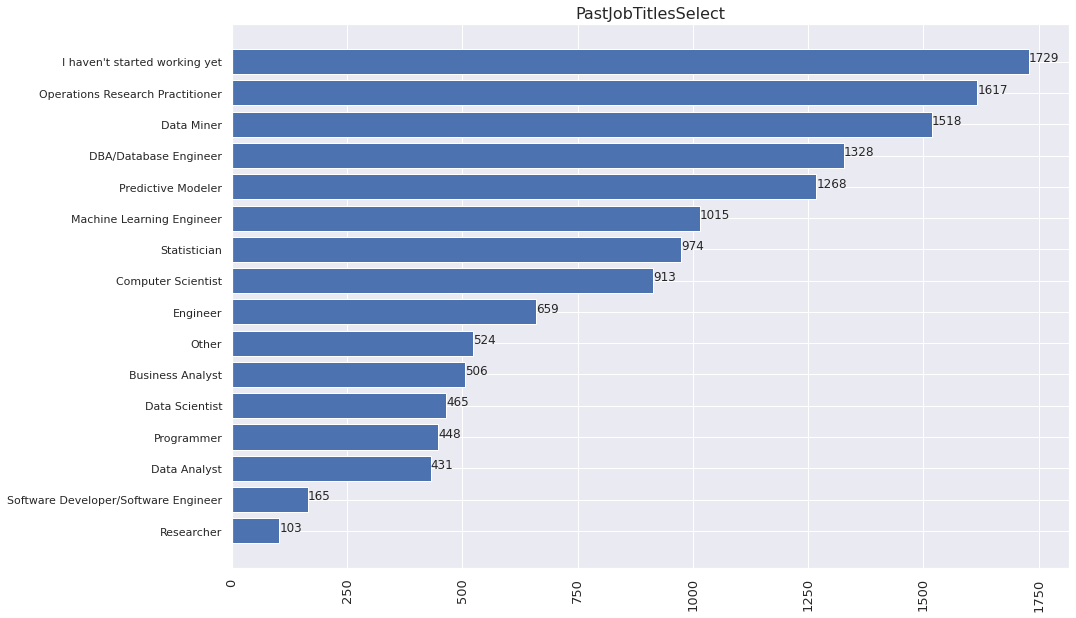

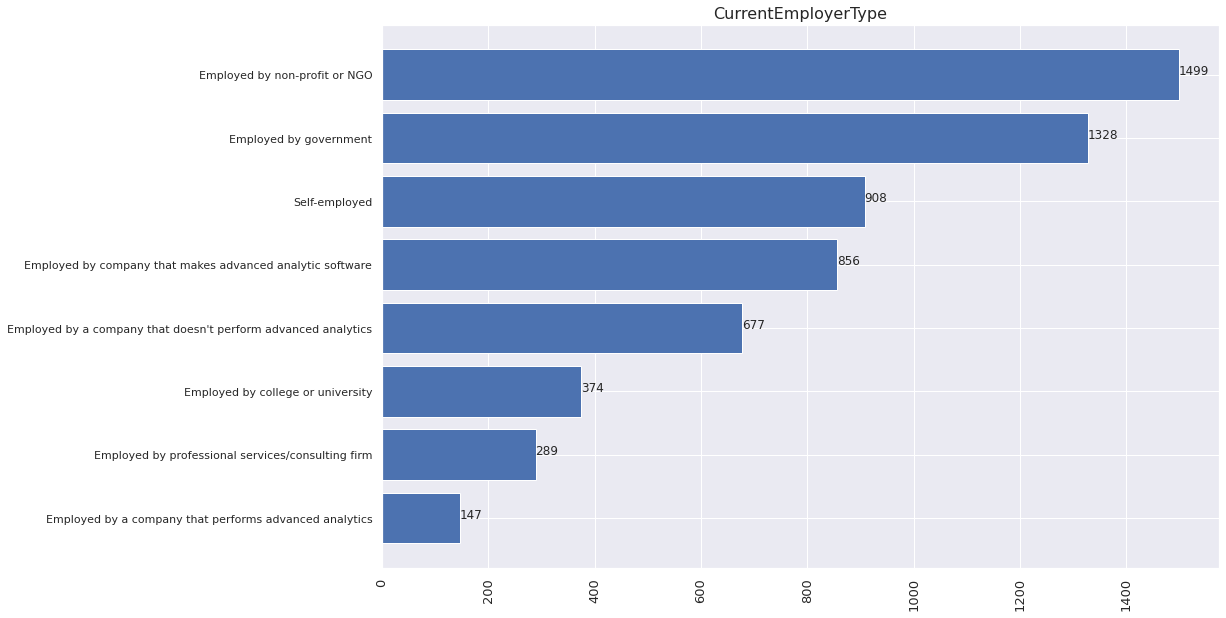

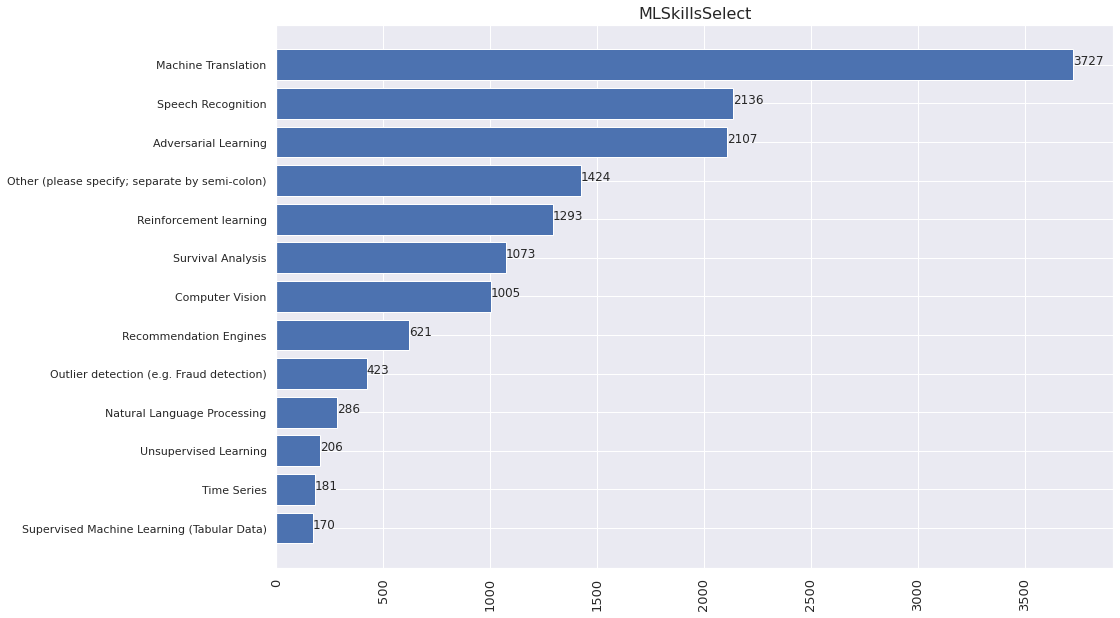

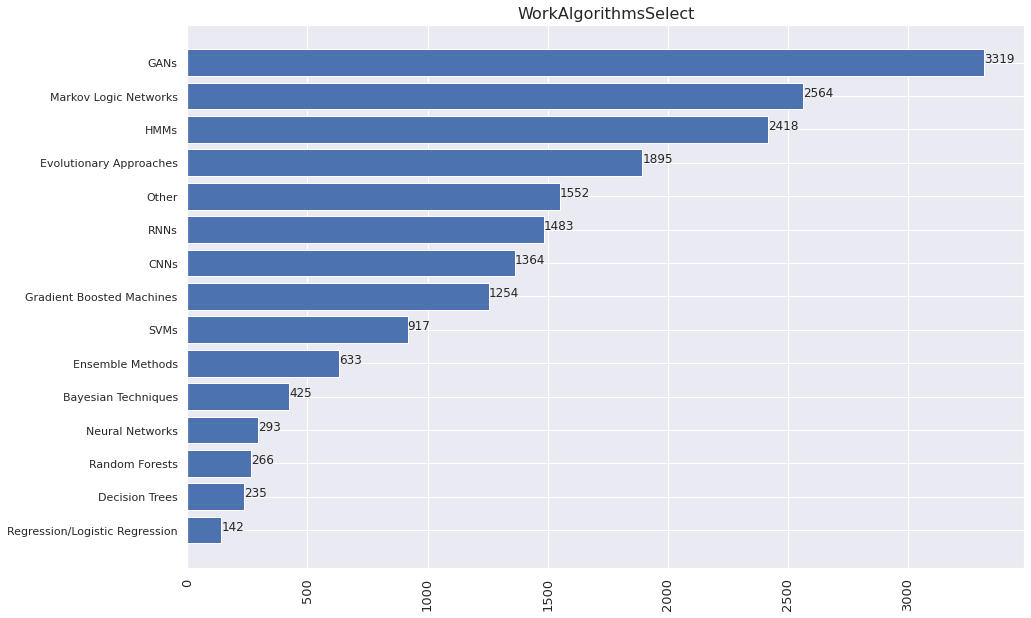

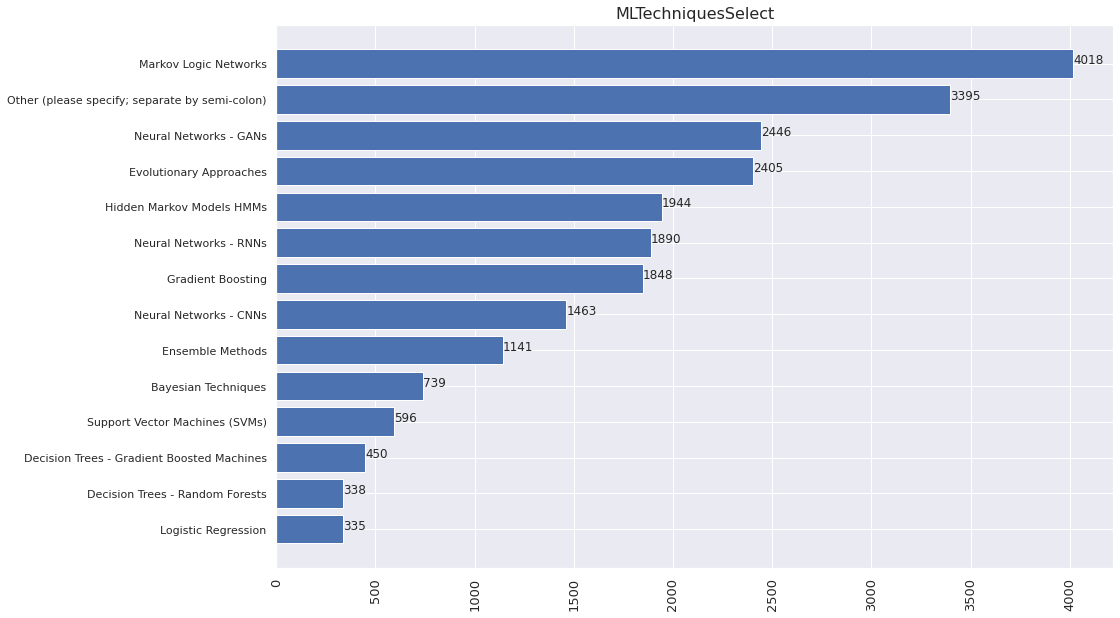

In [ ]:
#df['MLTechniquesSelect'].str.split(',').get_dummies(sep=',')
def dumyfier(data): #burada bilerek drop first uygulamadım --ali
    columns = ["PastJobTitlesSelect","CurrentEmployerType","MLSkillsSelect","WorkAlgorithmsSelect","MLTechniquesSelect"]
    def dummy_df(data, todummy_list):
        for x in todummy_list:
            prefix = x
            dummies = data[x].str.get_dummies(sep=',').add_prefix(prefix+'_') #duplike alan adlarını önlemek için buraya prefix ekledim--ali
            data = data.drop(x, 1)
            data = pd.concat([data, dummies], axis=1)
        return data
    data = dummy_df(data, columns)
    return data

df_yedek = df[["PastJobTitlesSelect","CurrentEmployerType","MLSkillsSelect","WorkAlgorithmsSelect","MLTechniquesSelect"]].copy()    

df_yedek = dumyfier(df_yedek)

main_features = ["PastJobTitlesSelect","CurrentEmployerType","MLSkillsSelect","WorkAlgorithmsSelect","MLTechniquesSelect"]
for i in main_features:
  dfme =df_yedek.filter(regex=i).sum().sort_values(ascending=True)
  xticks = [j.replace(i+'_', '') for j in df_yedek.filter(regex=i).sum().sort_values(ascending=False).index]
  plt.figure(figsize=(15,10))
  plt.barh(xticks, dfme)
  plt.xticks(rotation=90, fontsize=13)
  plt.title(i, fontsize=16)
  for i, j in enumerate(dfme.values):
    plt.text(j,i, j, fontdict={'fontsize': 12});

Although, the features above seem to have alot unique values, these features have multiple labels in each row. The unique labels and their quantities are shown above. 

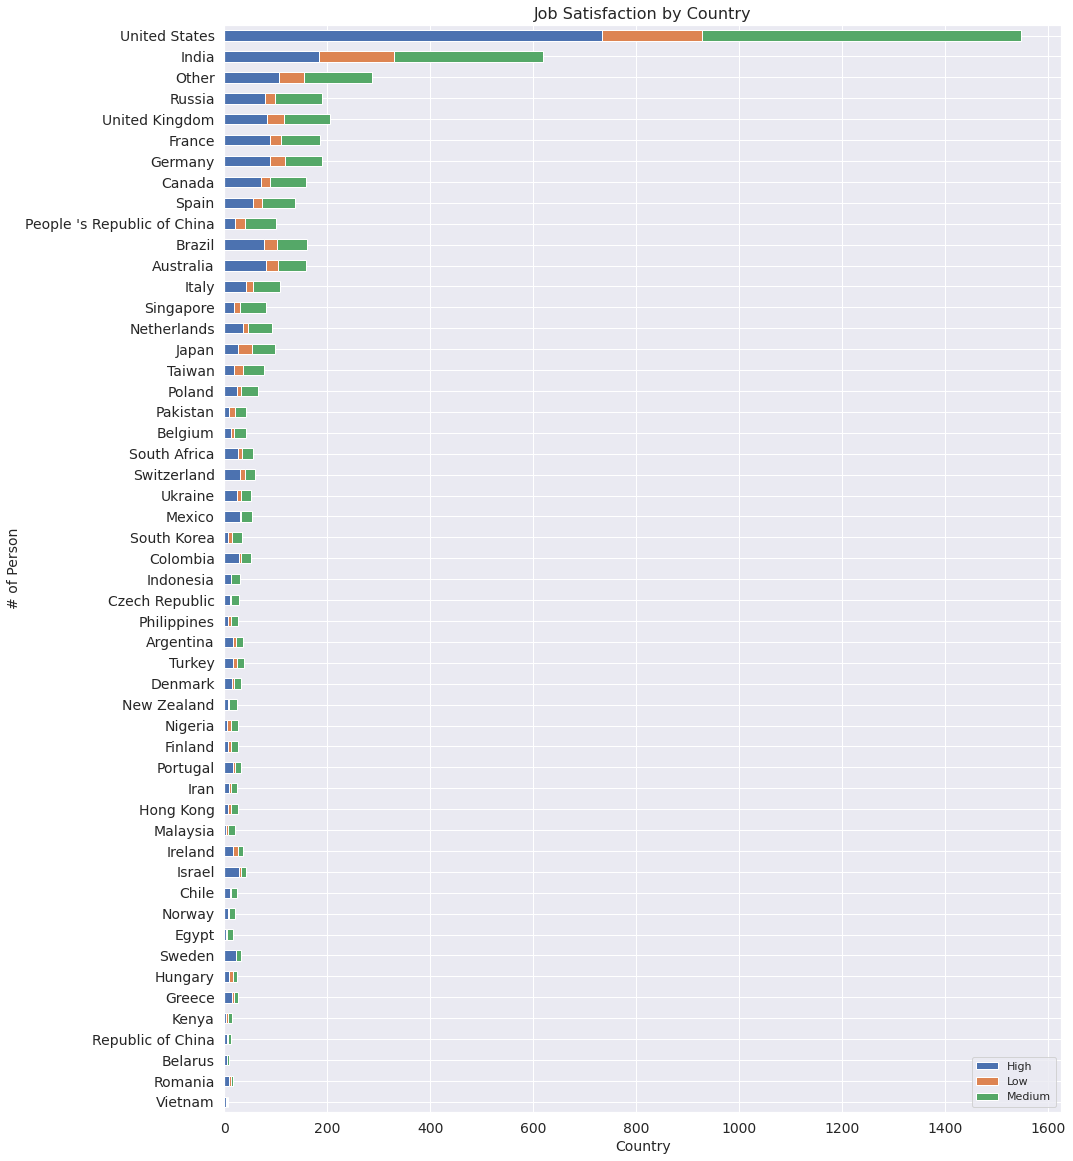

In [ ]:
df_country_satisfaction = df[['Country', 'JobSatisfaction', 'ID']].groupby(['Country', 'JobSatisfaction']).count().rename(columns={'ID': '# of person'})
#df_country_satisfaction.unstack().sort_values(by=('# of person', 'Medium'), ascending=False).fillna(0)
df_country_satisfaction.unstack().sort_values(by=('# of person', 'Medium'), ascending=True).fillna(0).plot(kind='barh', stacked=True, figsize=(15, 20))
plt.legend(['High', 'Low', 'Medium'])
plt.title("Job Satisfaction by Country", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Country',fontsize=14)
plt.ylabel('# of Person', fontsize=14)
plt.show()

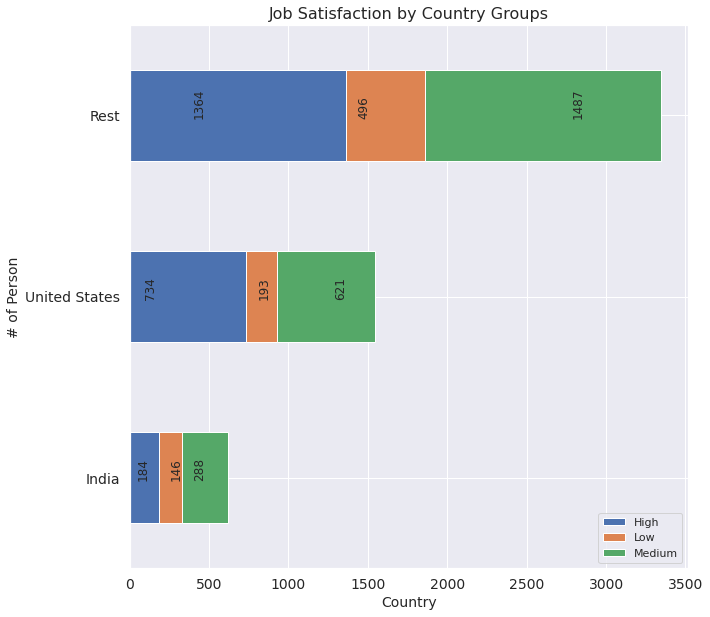

In [ ]:
df_country_satisfaction2 = df_country_satisfaction.reset_index()
df_country_satisfaction2['Country_Group'] = df_country_satisfaction2['Country'].map(lambda x: x if x in (['United States', 'India']) else 'Rest')
df_country_satisfaction2 = df_country_satisfaction2.drop('Country', axis=1)


df_country_satisfaction2 = df_country_satisfaction2[['Country_Group', 'JobSatisfaction', '# of person']].groupby(['Country_Group', 'JobSatisfaction']).sum()
df_country_satisfaction2.unstack().sort_values(by=('# of person', 'Medium'), ascending=True).fillna(0).plot(kind='barh', stacked=True, figsize=(10, 10))
plt.legend(['High', 'Low', 'Medium'])
plt.title("Job Satisfaction by Country Groups", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Country',fontsize=14)
plt.ylabel('# of Person', fontsize=14)

for i, j in enumerate(np.array(df_country_satisfaction2.unstack().sort_values(by=('# of person', 'Medium'), ascending=True))):
  plt.text(j[1]-100, i, j[0], fontdict={'fontsize': 12}, rotation=90)
  plt.text(j[0]+70, i, j[1], fontdict={'fontsize': 12}, rotation=90)
  plt.text(j[2]+j[0]-70, i, j[2], fontdict={'fontsize': 12}, rotation=90)

plt.show()

The Country seems to be distinguishing between High and Meidum level of Satisfaction level. United States is well ahead of the other countries. India follows it. Although their share in the data is quite imbalanced, they have different satisfaction level distribution which might give insight about tha data. 

**Missing Data Analysis**

<Figure size 1800x1080 with 0 Axes>

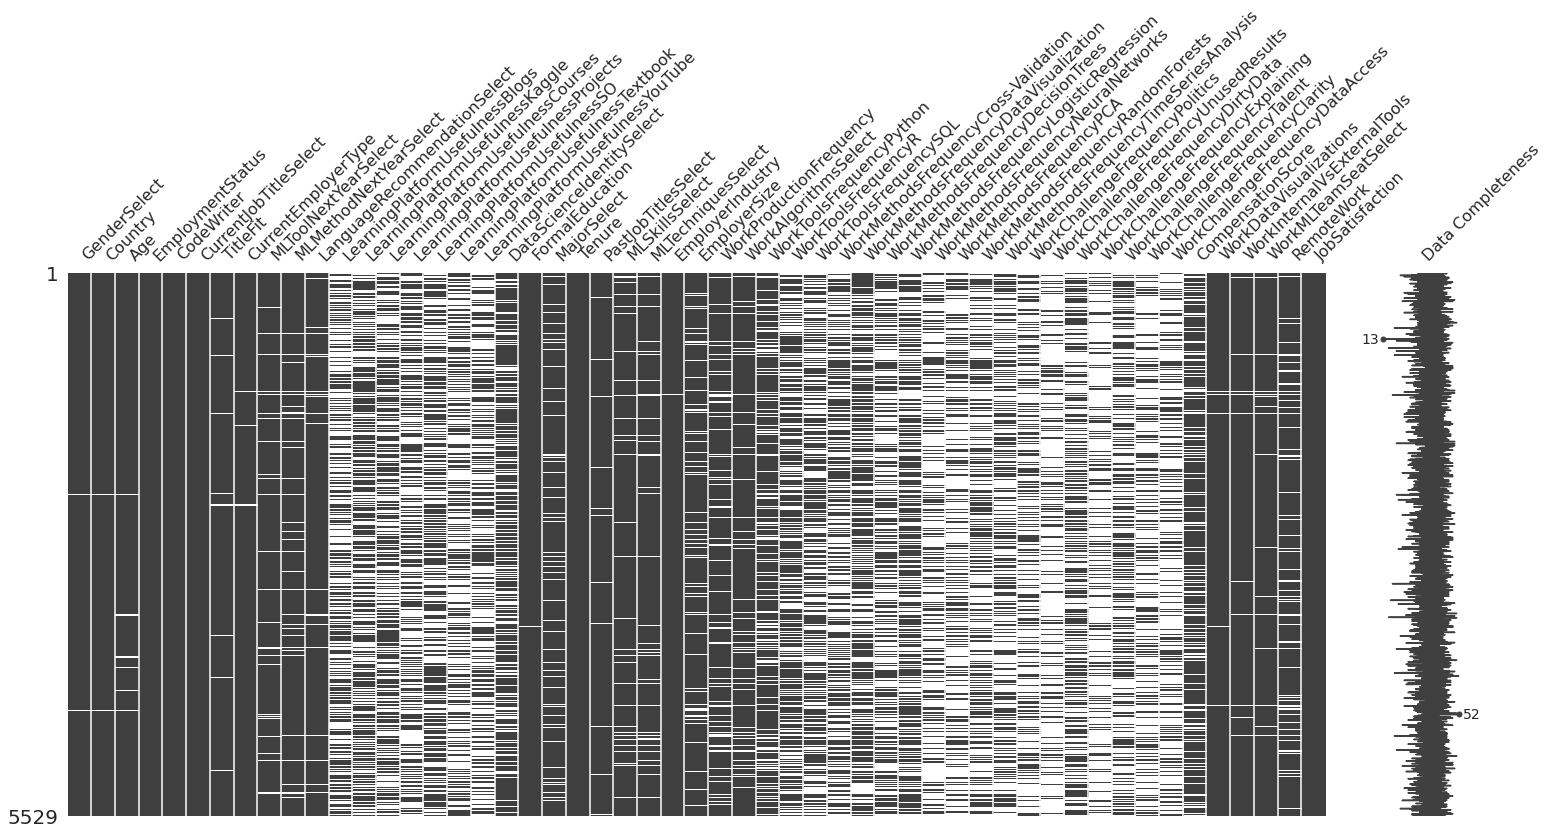

In [ ]:
plt.figure(figsize=(25,15))
missingno.matrix(df.drop('ID', axis=1), labels=True)
plt.show()

''

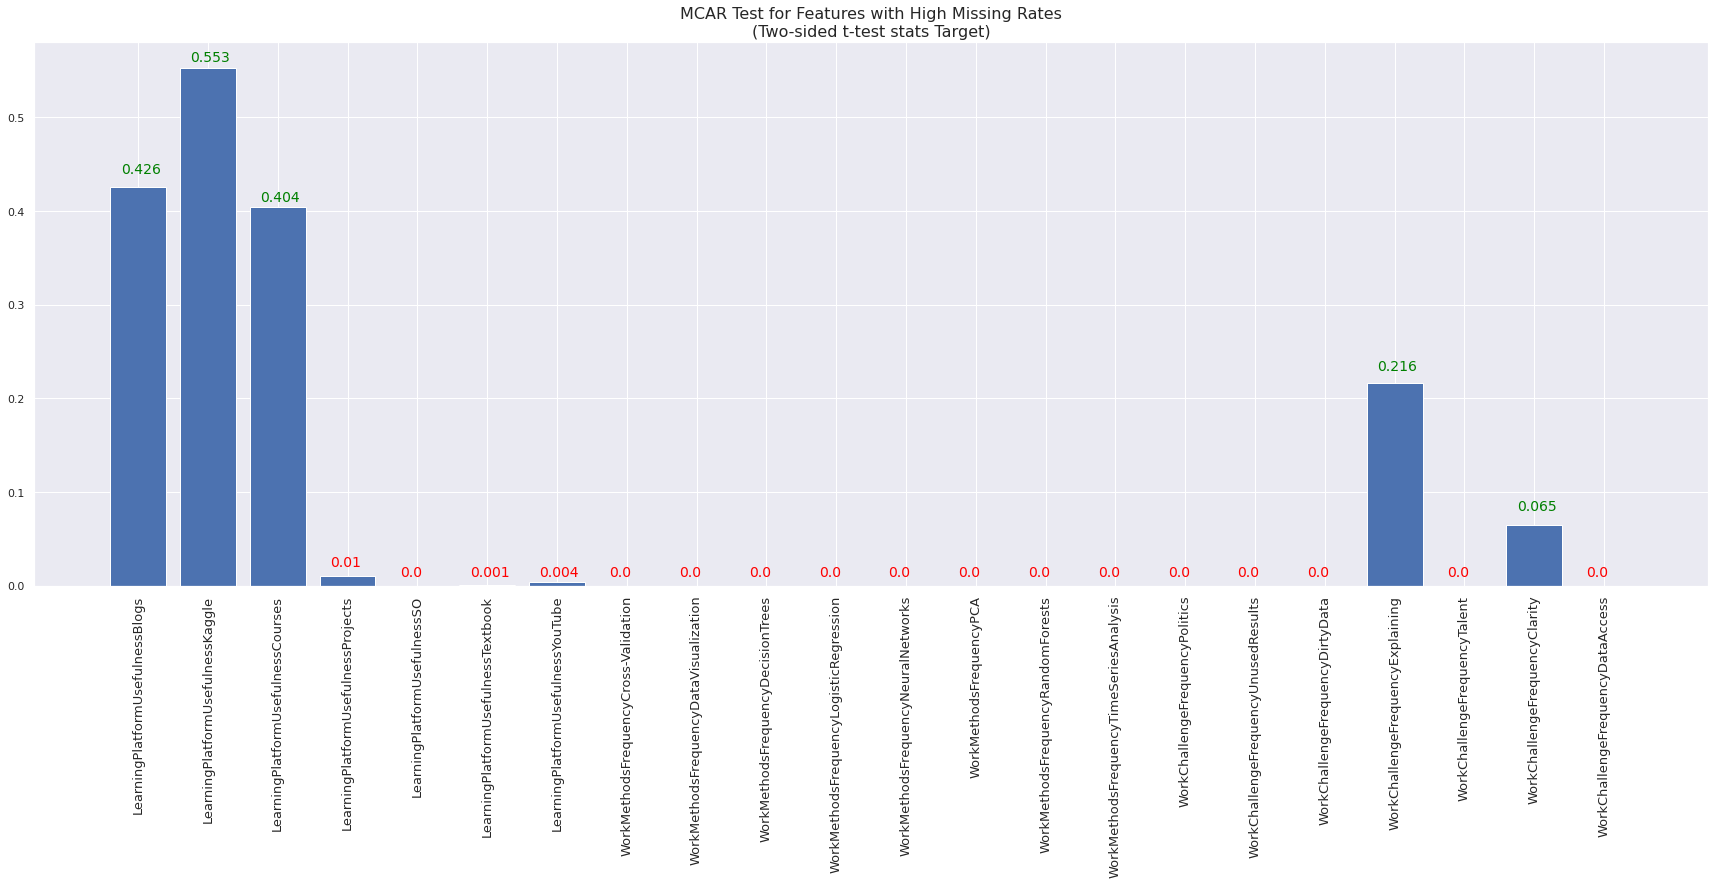

In [ ]:
from scipy import stats
missing_features = ['LearningPlatformUsefulnessBlogs', 'LearningPlatformUsefulnessKaggle','LearningPlatformUsefulnessCourses',  'LearningPlatformUsefulnessProjects',
                    'LearningPlatformUsefulnessSO',  'LearningPlatformUsefulnessTextbook', 'LearningPlatformUsefulnessYouTube',  'WorkMethodsFrequencyCross-Validation',
                    'WorkMethodsFrequencyDataVisualization',  'WorkMethodsFrequencyDecisionTrees', 'WorkMethodsFrequencyLogisticRegression',  'WorkMethodsFrequencyNeuralNetworks',
                    'WorkMethodsFrequencyPCA',  'WorkMethodsFrequencyRandomForests', 'WorkMethodsFrequencyTimeSeriesAnalysis', 'WorkChallengeFrequencyPolitics', 'WorkChallengeFrequencyUnusedResults',
                    'WorkChallengeFrequencyDirtyData', 'WorkChallengeFrequencyExplaining', 'WorkChallengeFrequencyTalent', 'WorkChallengeFrequencyClarity', 'WorkChallengeFrequencyDataAccess']

p_twosided_list = []
verdict_list = []
i_list = []

for i  in missing_features:
  missing_df = df[df[i].isna()]['JobSatisfaction'].map({'Low': 1, 'Medium': 2, 'High': 3})
  non_missing_df = df[df[i].notnull()]['JobSatisfaction'].map({'Low': 1, 'Medium': 2, 'High': 3})
  t, p_twosided = stats.ttest_ind(missing_df, non_missing_df, equal_var=False)
  p_twosided_list.append(p_twosided)
  i_list.append(i)

  verdict = 'Not significant'
  if p_twosided <= 0.025: verdict = 'Significant'
  verdict_list.append(verdict)
  #print('%12s   %6.4f   %15s' % (i, p_twosided, verdict))

plt.figure(figsize=(30,10))
plt.bar(i_list, p_twosided_list)
plt.xticks(rotation=90, fontsize=13)
plt.title('MCAR Test for Features with High Missing Rates\n(Two-sided t-test stats Target)', fontsize=16)

for i, j in enumerate(p_twosided_list):
  if verdict_list[i] == 'Not significant':
    clr = 'green'
  else:
    clr = 'red' 
  plt.text(i-0.25,round(j,2)+0.01, round(p_twosided_list[i], 3) , fontdict={'fontsize': 14, 'color': clr}, rotation=0)
;

Most of the features have missing values. However, features about Learning Platform Usefulness, Work Tools Frequency, Work Methods Frequency and Work Challenge Frequency have the largest missing rates. We conducted two sided t-test on the target for each feature above. Most of the p values are significant which leads us to suspect that the missingness is not MCAR.

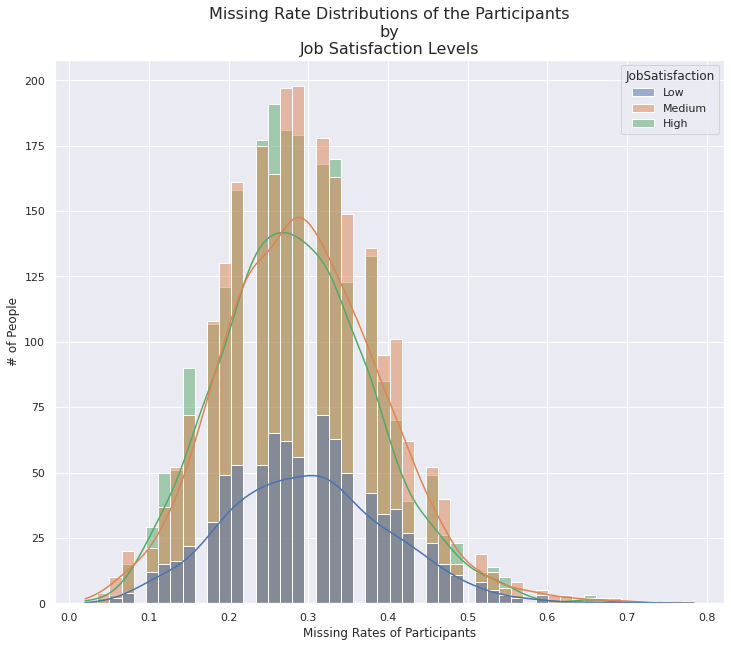

In [ ]:
df_nullratio = df.drop(['ID', 'CodeWriter'], axis=1).copy()
df_nullratio['missing_rate'] = round(df_nullratio.drop('JobSatisfaction', axis=1).isnull().sum(axis=1) / len(df_nullratio.drop('JobSatisfaction', axis=1).columns), 3)

fig, ax = plt.subplots(1,1, figsize=(12,10))
sns.histplot(data=df_nullratio,x='missing_rate', hue='JobSatisfaction', ax=ax, kde=True)
plt.title('Missing Rate Distributions of the Participants\nby\nJob Satisfaction Levels', fontsize=16)
plt.ylabel('# of People')
plt.xlabel('Missing Rates of Participants')
plt.show()

For further analysis, row-based missing column rate is calculated for each participant and checked if there is any relation with the satisfaction level. According to the distribution plot above, it can be infered that the missingness among the participants is nor related to their satisfaction levels.

In [ ]:
class imputer_and_generator():
    
    def __init__():
        "initial"
    def __main__():
        print("Feature Selection Process is started")

        def column_imputer():
            global result
            col_imputation = ['WorkChallengeFrequencyPolitics','WorkChallengeFrequencyUnusedResults',
                              'WorkChallengeFrequencyDirtyData','WorkChallengeFrequencyExplaining','WorkChallengeFrequencyTalent',
                              'WorkChallengeFrequencyClarity','WorkChallengeFrequencyDataAccess','WorkMethodsFrequencyCross-Validation',
                              'WorkMethodsFrequencyDataVisualization','WorkMethodsFrequencyDecisionTrees', 'WorkMethodsFrequencyLogisticRegression', 
                              'WorkMethodsFrequencyNeuralNetworks', 'WorkMethodsFrequencyPCA','WorkMethodsFrequencyRandomForests', 
                              'WorkMethodsFrequencyTimeSeriesAnalysis',"WorkToolsFrequencyPython", "WorkToolsFrequencyR", "WorkToolsFrequencySQL"]
            #dfnew =  df[col_imputation].add_prefix('ORJ_')
            #result = pd.concat([df, dfnew], axis=1)
            result = train_set.copy()
            result[col_imputation] = result[col_imputation].fillna('Missing') #buraya col_imputation ekledim--ali
            for i in result[col_imputation]:
                result[i] = result[i].map({
                                          'Most of the time' : 4,
                                          'Often' : 3,
                                          'Sometimes' : 2,
                                          'Rarely' : 1,
                                          'Missing': 0
                                          })
            
            return  result

  
        def worktoolsfreqmean():
            global result
            result['mean_of_WorkTools']= result.filter(regex='WorkToolsFrequency').mean(axis=1)
            return result
        
        

        def workchallenge():
            global result
            result['mean_of_the_workchallenge']= result.filter(regex='WorkChallengeFrequency').mean(axis=1) #workchallenge ile değiştirilecek
            result['mean_of_the_workmethods']= result.filter(regex='WorkMethodsFrequency').mean(axis=1)
            return result        
        

        #def visualization(result):
          #result['WorkDataVisualizations'] =  result['WorkDataVisualizations'].fillna('None') #burada 29 tane missing vardı. onları da olarak değiştirdim--ali
          #result['WorkDataVisualizationsbinned'] = result['WorkDataVisualizations'].map({
                #'None' : 0,
                #'Less than 10% of projects' : 0.05,
                #'10-25% of projects' : ((10+25)/2) / 100, #scale ederek ölçeği 0-1 arasına getirdim--ali
                #'26-50% of projects' : ((26+50)/2) / 100,
                #'51-75% of projects' : ((51+75)/2) / 100,
                #'76-99% of projects' : ((76+99)/2) / 100,
                #'100% of projects' : 1
                 #       })
          #result.drop('WorkDataVisualizations', axis=1, inplace=True) #orijinal değişkeni nihai tablodan çıkardım--ali
          #return result
        
        def externalvsinternaltools(result):
          result["WorkInternalVsExternalTools"] = result["WorkInternalVsExternalTools"].fillna("Do not know") # 116 tane missing vardı. Do not know ile değiştirdim--ali
          result['UsageofExternaltools'] = result['WorkInternalVsExternalTools'].map({ 
            'Entirely external' : 1,
            'More external than internal' : 0.75,
            'Approximately half internal and half external' : 0.50,
            'More internal than external' : 0.25,
            'Do not know' : 0.10,
            'Entirely internal' : 0        
                                    })

          result['UsageofInternaltools'] = result['WorkInternalVsExternalTools'].map({
                'Entirely internal' : 1,
                'More internal than external' : 0.75,
                'Approximately half internal and half external' : 0.50,
                'More external than internal' : 0.25,
                'Do not know' : 0.10,
                'Entirely external' : 0
                                         })
          result.drop('WorkInternalVsExternalTools', axis=1, inplace=True) #nihai tablodan çıkardım--ali
          return result
        
        def formal_education(result):
          result['FormalEducation'] = result['FormalEducation'].fillna("I prefer not to answer") #7 tane missing vardı prefer not to answer ile değiştirdim--ali
          result['FormalEducation'] = result['FormalEducation'].map({
                "Bachelor's degree": 1, "Master's degree": 2,
                 "Doctoral degree" : 3, "Professional degree": 0,
                 "Some college/university study without earning a bachelor's degree" :0, 
                 "I did not complete any formal education past high school": 0,
                 "I prefer not to answer":0

            })
            #result.fillna(value = 0,inplace = True) --> burayı kaldırdım--ali
          return result
        
        def major_select():
            global result
            s2 = result.MajorSelect.value_counts().index[:6]
            def categ(x):
                if x in s2:
                    return x
                else : 
                    return "Missing" #519 tane missing var. bu şekilde onları others a atıyoruz. %10 olduğu için Missing diye ayrı bir alan yarattım--ali
            result['MajorSelect']= result.MajorSelect.apply(lambda x : categ(x))
            prefix = 'MajorSelect'
            dummies = pd.get_dummies(result['MajorSelect'], prefix=prefix, drop_first=True)# dummy variable trap yüzünden drop_first yaptım--ali
            result = pd.concat([result, dummies], axis=1)
            result = result.drop(['MajorSelect'], axis=1)
            return result
        
        def DataScienceIdentitySelect():
            global result
            result = result.fillna({"DataScienceIdentitySelect": "Unanswered"})
            prefix = 'DataScienceIdentitySelect'
            dummies = pd.get_dummies(result['DataScienceIdentitySelect'], prefix=prefix, drop_first=True) #bütün oluşturduğumuz alanlarda bu şekilde prefix eklememiz gerekiyor, drop_first yaptım--ali
            result = pd.concat([result, dummies], axis=1)
            result = result.drop(['DataScienceIdentitySelect'],axis=1)
            return result
    
        def LanguageRecommendationSelect():
            global result
            result = result.fillna({"LanguageRecommendationSelect": "Unanswered"})
            s = result.LanguageRecommendationSelect.value_counts().index[:4]
            def categ(x):#--> missing value ları iki üst satırda unanswered diye değiştirdiğimiz için bu fonksiyona gerek kalmadı--ali
                if x in s:
                    return x
                else :
                    return "Others"
            result['LanguageRecommendationSelect'] = result.LanguageRecommendationSelect.apply(lambda x : categ(x))
            prefix = 'LanguageRecommendationSelect'
            dummies = pd.get_dummies(result['LanguageRecommendationSelect'],prefix=prefix, drop_first=True) # dummy variable trap yüzünden drop_first yaptım--ali
            dummies = dummies.fillna(0)
            result = pd.concat([result,dummies], axis=1)
            result = result.drop(['LanguageRecommendationSelect'],axis=1)
            return result
        
        def LearningPlatformUsefulness():
            global result
            col_imputation = ['LearningPlatformUsefulnessBlogs','LearningPlatformUsefulnessKaggle','LearningPlatformUsefulnessCourses',
                              'LearningPlatformUsefulnessProjects','LearningPlatformUsefulnessSO','LearningPlatformUsefulnessTextbook','LearningPlatformUsefulnessYouTube']
            result[col_imputation] = result[col_imputation].fillna("Missing") #burayı sadece ilgili kolonlara 0 atayacak şekilde düzenledim--ali
            for i in result[col_imputation]:
                result[i] = result[i].map({
                                          "Missing": 0,
                                          "Not Useful": -1,  #missing i ekledikten sonra not useful u -1 e çevirdim--ali
                                          "Somewhat useful" : 1, 
                                          "Very useful": 2
                                           })
                
            result['mean_of_the_learningplatformusefulness'] = result.filter(regex='LearningPlatformUsefulness').mean(axis=1) #burada 0 lar dahil ortalama alıyoruz, hariç de alabiliriz konuşalım--ali
            return result
        
        
        def WorkMLTeamSeatSelect(): #162 tane missing var--ali
            global result
            result['WorkMLTeamSeatSelect'] = result['WorkMLTeamSeatSelect'].map({#0 : 'Unanswered',-->burada 0: 'unanswered ı missingleeri en basta 0a çekmeyi kaldırdığım için çıkardım--ali                                                         
                                                                                'Business Department' : 'Business Department',
                                                                                'Central Insights Team' : 'Central Insights Team',
                                                                                'IT Department' : 'IT Department' ,
                                                                                'Other' : 'Other' ,
                                                                                'Standalone Team' : 'Standalone Team'
                                                                                })
            result['WorkMLTeamSeatSelect'] = result['WorkMLTeamSeatSelect'].fillna('Unanswered') # unanswered ı buraya aldım--ali
            prefix = 'WorkMLTeamSeatSelect'
            dummies = pd.get_dummies(result['WorkMLTeamSeatSelect'],prefix=prefix, drop_first=True) # dummy variable trap yüzünden drop_first yaptım--ali
            result = pd.concat([result,dummies],axis=1)
            result.drop('WorkMLTeamSeatSelect', axis=1, inplace=True) #orijinal değişkeni nihai tablodan çıkardım--ali
            return result
        
        
        def RemoteWork():#582 tane missing var--ali
            global result
            result['RemoteWork'] = result['RemoteWork'].map({#0 : 'Unanswered', -->burada 0: 'unanswered ı missingleeri en basta 0a çekmeyi kaldırdığım için çıkardım--ali  
                                                             """'Don't know'""" : """'Don't know'""",                                                                  
                                                            'Never' : 'Never',
                                                            'Rarely' : 'Rarely',
                                                            'Sometimes' : 'Sometimes' ,
                                                            'Most of the time' : 'Most of the time' ,
                                                            'Always' : 'Always'
                                                            })
            result['RemoteWork'] = result['RemoteWork'].fillna("Unanswered")  # unanswered ı buraya aldım--ali
            prefix = 'RemoteWork'
            dummies = pd.get_dummies(result['RemoteWork'],prefix=prefix, drop_first=True)# dummy variable trap yüzünden drop_first yaptım--ali
            result = pd.concat([result,dummies],axis=1)
            result.drop('RemoteWork', axis=1, inplace=True) #orijinal değişkeni nihai tablodan çıkardım--ali
            return result
        
        def GenderSelect():#10 tane missing var male/female dışında cok az data var o yüzden missing ve geri kalanları other olarak atadım--ali 
            global result
            result['GenderSelect'] = result['GenderSelect'].map({
                'A different identity' : 'Other',
                'Female' : 'Female',
                'Male' : 'Male',
                'Non-binary, genderqueer, or gender non-conforming' : 'Other'
            })
            result['GenderSelect'] = result['GenderSelect'].fillna('Other')#missing atamasını burada yaptım--ali
            prefix = 'GenderSelect'
            dummies = pd.get_dummies(result['GenderSelect'], prefix=prefix, drop_first=True)# dummy variable trap yüzünden drop_first yaptım--ali
            result = pd.concat([result,dummies], axis=1)
            result.drop('GenderSelect', axis=1, inplace=True) #orijinal değişkeni nihai tablodan çıkardım--ali
            return result
        
        def Country():#16 tane missing vardı o yüzden onları da Other içine koydum--ali
            global result
            country = ['Pakistan', 'Mexico', 'United States', 'France', 'Other',
           'Romania', 'Singapore', 'Argentina', 'Australia',
           "People 's Republic of China", 'Germany', 'India', 'Russia',
           'Taiwan', 'Switzerland', 'United Kingdom', 'Finland', 'Canada',
           'Indonesia', 'South Korea', 'Colombia', 'Spain', 'South Africa',
           'Italy', 'Brazil', 'Czech Republic', 'Philippines', 'Malaysia',
           'Vietnam', 'Egypt', 'Israel', 'Poland', 'Nigeria', 'Chile',
           'Belgium', 'Netherlands', 'Ireland', 'Hong Kong', 'Japan',
           'Denmark', 'New Zealand', 'Hungary', 'Iran', 'Ukraine', 'Greece',
           'Sweden', 'Norway', 'Portugal', 'Kenya', np.nan, 'Turkey',
           'Republic of China', 'Belarus']

            continent = ['Asia', 'North America', 'North America', 'Europe', 'Other', 
                 'Europe','Asia', 'South America', 'Oceania',
                 'Asia', 'Europe', 'Asia', 'Europe',
                 'Asia', 'Europe', 'Europe', 'Europe', 'North America',
                 'Asia', 'Asia', 'South America', 'Europe', 'Africa',
                 'Europe', 'South America', 'Europe', 'Asia', 'Asia',
                 'Asia', 'Africa', 'Asia', 'Europe', 'Africa', 'South America',
                 'Europe', 'Europe', 'Europe', 'Asia', 'Asia',
                 'Europe', 'Oceania', 'Europe', 'Asia', 'Europe', 'Europe',
                 'Europe', 'Europe', 'Europe',  'Africa', np.nan , 'Asia',
                 'Asia', 'Europe']
            #https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry

            dic = {}
            for x,y in zip(continent, country):
                  dic[y] = x
            result["Country"] = result["Country"].fillna("Other") #missing atamasını burada yaptım--ali 
            result['continent'] = result['Country'].map(dic)
            prefix = 'continent'
            dummies = pd.get_dummies(result['continent'], prefix=prefix, drop_first=True)# dummy variable trap yüzünden drop_first yaptım--ali
            result = pd.concat([result,dummies], axis=1)
            result.drop(['Country', 'continent'], axis=1, inplace=True) #bu alanları nihai tablodan çıkardım--ali
            return result
        
        
        #EmploymentStatus
        def hasFullTimeJob():#missing değer yok--ali
            global result 
            result['isFullTimeEmp'] = result['EmploymentStatus'].apply(lambda x: 1 if x == 'Employed full-time'  else 0)
            result.drop('EmploymentStatus', axis=1, inplace=True)
            return result
            #Employment Status drop edilmedi. edilebilir--ali
         
        
        #CodeWriter
        def CodeWriter():
            global result
            result.drop('CodeWriter', axis=1, inplace=True)
            return result
        
        #CurrentJobTitleSelect
        def JobTitleGrouping():
          global result
          #group by similar job satisfaction levels
          group1 = ['Software Developer/Software Engineer', 'Computer Scientist', 'Data Miner', 'Engineer', 'Business Analyst', 'DBA/Database Engineer', 'Programmer', "Data Analyst" ]
          group2 = ['Scientist/Researcher', 'Data Scientist', 'Statistician', 'Operations Research Practitioner']
          group3 = ['Other', 'Predictive Modeler', 'Researcher', 'Machine Learning Engineer']

          groups_dict = {}

          for i in group1:
            groups_dict[i] = 'group1'

          for i in group2:
            groups_dict[i] = 'group2'

          for i in group3:
            groups_dict[i] = 'group3'

          result['CurrentJobTitleSelect'] = result['CurrentJobTitleSelect'].map(groups_dict).fillna('Missing')

          from sklearn.preprocessing import OneHotEncoder
          ohe = OneHotEncoder(drop='first')# dummy variable trap yüzünden drop_first yaptım--ali

          encoded = pd.DataFrame(ohe.fit_transform(result[['CurrentJobTitleSelect']]).toarray())
          encoded.columns = ['CurrentJobTitleSelect_group1','CurrentJobTitleSelect_group2', 'CurrentJobTitleSelect_group3']
          result = pd.concat([result, encoded], axis=1)
          result = result.drop('CurrentJobTitleSelect', axis=1) 
          return result
        
      
    
        #WorkProductionFrequency
        def ProductionFreq(): #626 missing değer var
          global result
          #ProductionFreqDict = {"Never": 0 ,  "Don't know":0, 'Rarely':1, 'Sometimes':2, 'Most of the time':3,'Always':4 } #dont know 0 mu kalmalı
          ProductionFreqDict = {"Never": -1 ,  "Don't know":0, 'Rarely':1, 'Sometimes':2, 'Most of the time':3,'Always':4 } #never ı -1 yaptım--ali
          result["WorkProductionFrequency"] = result["WorkProductionFrequency"].map(ProductionFreqDict)
          result["WorkProductionFrequency"] = result["WorkProductionFrequency"].fillna(0) #bu şekilde missing ler de dont know ile aynı değeri almış oluyor--ali
          return result
    
    
        #EmployerSize
        def EmployerSizeGrouping(): 
          #581 tane missing var. bunları ayrıca ekleyelim bence. ek olarak, şirket büyüklüğü ile job satisfaction arasında ordinal bir bağ kuruyoruz. bence doğru değil. 
          #o yüzden alternatif olarak onehotencoding yapabiliriz--ali
          global result
          sizeDict = { 'I prefer not to answer':0,
               "I don't know":0,
              "100 to 499 employees":1, 
              "Fewer than 10 employees" : 1 , 
              "10 to 19 employees":1,
              '20 to 99 employees':1,
              "500 to 999 employees":2,
              '1,000 to 4,999 employees':3,
              '5,000 to 9,999 employees':4,
              '10,000 or more employees':5}

          #result['EmployerSize'] = result['EmployerSize'].map(sizeDict) #--> bu kodu kaldırdım fakat alan adlarını değiştirmek istersek kullanabiliriz--ali
          result['EmployerSize'] = result['EmployerSize'].fillna("Missing") #missingleri ayrı bir alan olarak atadım--ali          
          prefix = 'EmployerSize'
          dummies = pd.get_dummies(result['EmployerSize'], prefix=prefix, drop_first=True)# dummy variable trap yüzünden drop_first yaptım--ali
          result = pd.concat([result,dummies], axis=1)
          result.drop('EmployerSize', axis=1, inplace=True) #orijinal değişkeni çıkardım--ali
       
          return result
    
        def dumyfier(): #burada bilerek drop first uygulamadım --ali
            global result
            columns = ["PastJobTitlesSelect","CurrentEmployerType","MLSkillsSelect","WorkAlgorithmsSelect","MLTechniquesSelect"]
            def dummy_df(result, todummy_list):
                for x in todummy_list:
                    prefix = x
                    dummies = result[x].str.get_dummies(sep=',').add_prefix(prefix+'_') #duplike alan adlarını önlemek için buraya prefix ekledim--ali
                    result = result.drop(x, 1)
                    result = pd.concat([result, dummies], axis=1)
                return result
            result = dummy_df(result, columns)

            pastjobtitle_group1 = ["PastJobTitlesSelect_Researcher", "PastJobTitlesSelect_Other", "PastJobTitlesSelect_Data Scientist", "PastJobTitlesSelect_Computer Scientist"]

            pastjobtitle_group2 = ["PastJobTitlesSelect_Software Developer/Software Engineer", "PastJobTitlesSelect_Data Analyst", "PastJobTitlesSelect_Engineer", "PastJobTitlesSelect_Programmer", 
                                  "PastJobTitlesSelect_Business Analyst", "PastJobTitlesSelect_I haven't started working yet"]

            pastjobtitle_group3 = ["PastJobTitlesSelect_Data Miner", "PastJobTitlesSelect_DBA/Database Engineer", "PastJobTitlesSelect_Machine Learning Engineer", 
                                  "PastJobTitlesSelect_Operations Research Practitioner", "PastJobTitlesSelect_Predictive Modeler", "PastJobTitlesSelect_Statistician",
                                  "PastJobTitlesSelect_Engineer"]

            currentemployertype_group1 = ["CurrentEmployerType_Employed by a company that performs advanced analytics", "CurrentEmployerType_Employed by college or university",
                                          "CurrentEmployerType_Employed by company that makes advanced analytic software", "CurrentEmployerType_Self-employed"]

            currentemployertype_group2 = ["CurrentEmployerType_Employed by a company that doesn't perform advanced analytics", "CurrentEmployerType_Employed by government",
                                          "CurrentEmployerType_Employed by non-profit or NGO", "CurrentEmployerType_Employed by professional services/consulting firm",
                                          ]

            mlskilss_group1 = ["MLSkillsSelect_Adversarial Learning", "MLSkillsSelect_Natural Language Processing", "MLSkillsSelect_Other (please specify; separate by semi-colon)",
                              "MLSkillsSelect_Outlier detection (e.g. Fraud detection)", "MLSkillsSelect_Recommendation Engines", "MLSkillsSelect_Reinforcement learning",
                              "MLSkillsSelect_Survival Analysis", "MLSkillsSelect_Time Series", "MLSkillsSelect_Unsupervised Learning"]

            mlskilss_group2 = ["MLSkillsSelect_Computer Vision", "MLSkillsSelect_Machine Translation", "MLSkillsSelect_Speech Recognition", "MLSkillsSelect_Supervised Machine Learning (Tabular Data)",
                              ]


            workalgorithms_group1 = ["WorkAlgorithmsSelect_CNNs", "WorkAlgorithmsSelect_Decision Trees", "WorkAlgorithmsSelect_Ensemble Methods", "WorkAlgorithmsSelect_Gradient Boosted Machines",
                                    "WorkAlgorithmsSelect_Neural Networks", "WorkAlgorithmsSelect_RNNs", "WorkAlgorithmsSelect_Random Forests", "WorkAlgorithmsSelect_SVMs"]

            workalgorithms_group2 = ["WorkAlgorithmsSelect_Other", "WorkAlgorithmsSelect_Regression/Logistic Regression"]

            workalgorithms_group3 = ["WorkAlgorithmsSelect_Bayesian Techniques", "WorkAlgorithmsSelect_Evolutionary Approaches", "WorkAlgorithmsSelect_GANs", "WorkAlgorithmsSelect_HMMs",
                                    "WorkAlgorithmsSelect_Markov Logic Networks"]



            mltechniques_group1 = ["MLTechniquesSelect_Bayesian Techniques", "MLTechniquesSelect_Decision Trees - Gradient Boosted Machines","MLTechniquesSelect_Ensemble Methods", 
                                  "MLTechniquesSelect_Evolutionary Approaches", "MLTechniquesSelect_Gradient Boosting", "MLTechniquesSelect_Hidden Markov Models HMMs", "MLTechniquesSelect_Markov Logic Networks",
                                  "MLTechniquesSelect_Neural Networks - CNNs", "MLTechniquesSelect_Neural Networks - GANs", "MLTechniquesSelect_Neural Networks - RNNs", "MLTechniquesSelect_Other (please specify; separate by semi-colon)",
                                  "MLTechniquesSelect_Support Vector Machines (SVMs)"]

            mltechniques_group2 = ["MLTechniquesSelect_Decision Trees - Random Forests", "MLTechniquesSelect_Logistic Regression"]

            result["pastjobtitle_group1"] = result[pastjobtitle_group1].sum(axis=1)
            result["pastjobtitle_group2"] = result[pastjobtitle_group2].sum(axis=1)
            result["pastjobtitle_group3"] = result[pastjobtitle_group3].sum(axis=1)

            result["currentemployertype_group1"] = result[currentemployertype_group1].sum(axis=1)
            result["currentemployertype_group2"] = result[currentemployertype_group2].sum(axis=1)

            result["mlskills_group1"] = result[mlskilss_group1].sum(axis=1)
            result["mlskills_group2"] = result[mlskilss_group2].sum(axis=1)

            result["workalgorithms_group1"] = result[workalgorithms_group1].sum(axis=1)
            result["workalgorithms_group2"] = result[workalgorithms_group2].sum(axis=1)
            result["workalgorithms_group3"] = result[workalgorithms_group3].sum(axis=1)

            result["mltechniques_group1"] = result[mltechniques_group1].sum(axis=1)
            result["mltechniques_group2"] = result[mltechniques_group2].sum(axis=1)

            drop_list = [pastjobtitle_group1, pastjobtitle_group2, pastjobtitle_group3, currentemployertype_group1, currentemployertype_group2, mlskilss_group1, 
                            mlskilss_group2, workalgorithms_group1, workalgorithms_group2, workalgorithms_group3, mltechniques_group1, mltechniques_group2]

            drop_list = [item for sublist in drop_list for item in sublist]                
            result = result.drop(drop_list, axis=1)

            return result
        
        def EmplIndustry(): #-> 12 tane missing var
            global result
            result = result.fillna({"EmployerIndustry": "Unanswered"})
            prefix = 'EmployerIndustry'
            dummies = pd.get_dummies(result['EmployerIndustry'], prefix=prefix, drop_first=True)
            result = pd.concat([result, dummies], axis=1)
            result = result.drop(['EmployerIndustry'],axis=1)
            return result

        #def RemoveID():#bu alan nihai tablodan çıkarılmamıştı. çıkardım--ali
          #global result
          #result.drop('ID', axis=1, inplace=True)

        def EncodeTitleFit(): #encode edilmemişti. ettim--ali
          global result
          result['TitleFit'].fillna('Missing', inplace=True)
          result['TitleFit'] = result['TitleFit'].map({"Fine": 1, "Perfectly": 2, "Poorly": -1, 'Missing': 0})
          return result

        def TenureEncode():
          global result
          result['Tenure'] = result['Tenure'].fillna("I don't write code to analyze data")#çok az missing var onlara da böyle bir kabul yaparak ilerledim--ali
          result['Tenure'] = result['Tenure'].map({'3 to 5 years':3,
                            '1 to 2 years':2,
                            'More than 10 years':5,
                            '6 to 10 years':4,
                            'Less than a year':1,
                            "I don't write code to analyze data":0
                            })
          return result

        def Compensation():
          global result
          result['CompensationMissingIndicator'] = result["CompensationScore"].isnull().replace({True: 1, False: 0})
          result['CompensationScore'] = result['CompensationScore'].fillna(1000)
          return result
        

        def JobSatisfaction():
            global result
            result['JobSatisfaction'] = result['JobSatisfaction'].map({
            'Low' : 1,
            'Medium' : 2,
            'High' : 3
                })
            return result


        
        column_imputer()
        worktoolsfreqmean()
        workchallenge()
        #visualization(result)
        externalvsinternaltools(result)
        formal_education(result)
        major_select()
        DataScienceIdentitySelect()
        LanguageRecommendationSelect()
        LearningPlatformUsefulness()
        WorkMLTeamSeatSelect()
        RemoteWork()
        GenderSelect()
        Country()
        hasFullTimeJob()
        CodeWriter()
        JobTitleGrouping()
        ProductionFreq()
        dumyfier()
        EmployerSizeGrouping()
        EmplIndustry()
        #RemoveID()        
        EncodeTitleFit()
        TenureEncode()
        Compensation()


        JobSatisfaction()
        print("Feature Selection Process Succesfully Completed")

In the class code above, we aimed to gather the data preprocessing steps in one code block for the train data. We avoided any transformation or processing that can lead to data leakage problem.  In the above class, grouped some of the features that we think related to each other. Some of them were mapped with numeric values. details can be found in the code. 

In [ ]:
pipeline_feature_generation = Pipeline([('feature generator', imputer_and_generator.__main__())])

Feature Selection Process is started
Feature Selection Process Succesfully Completed


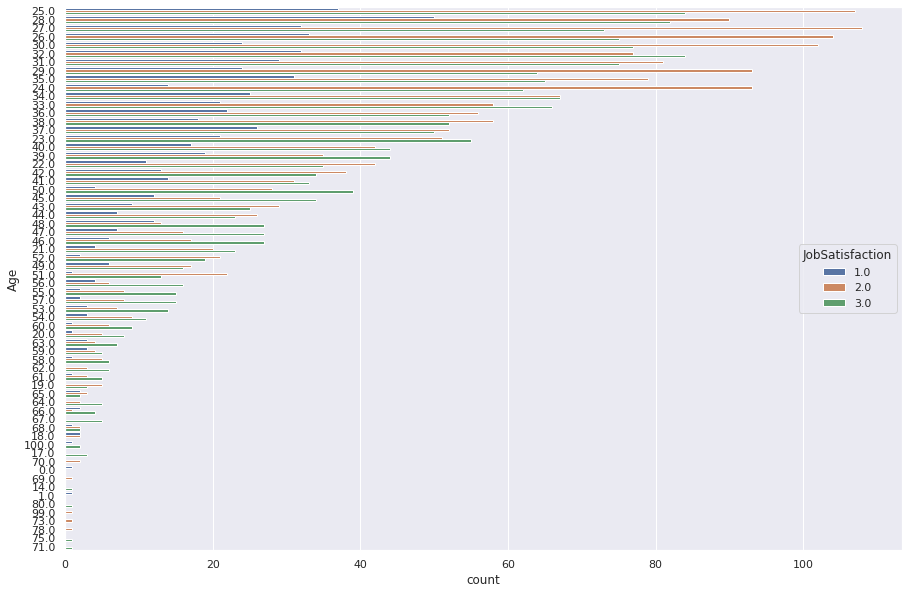

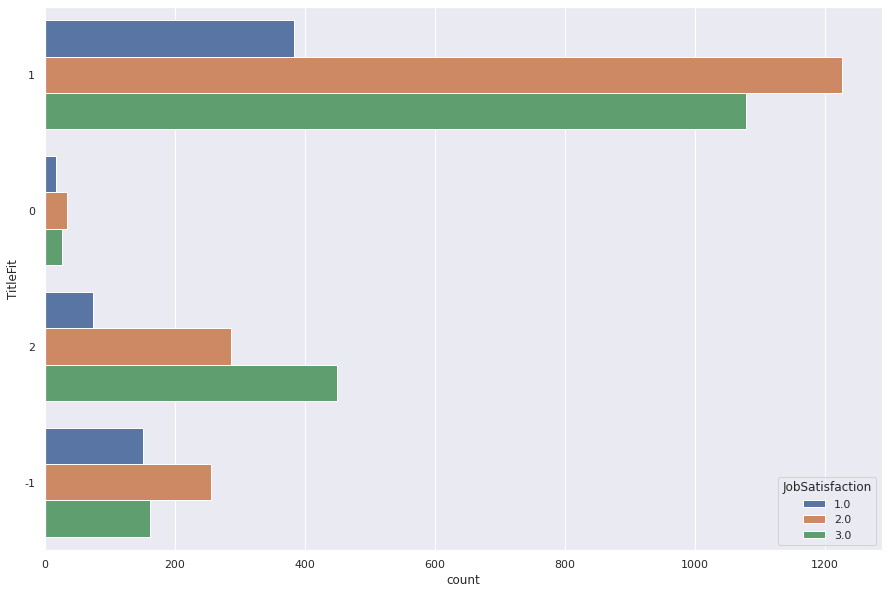

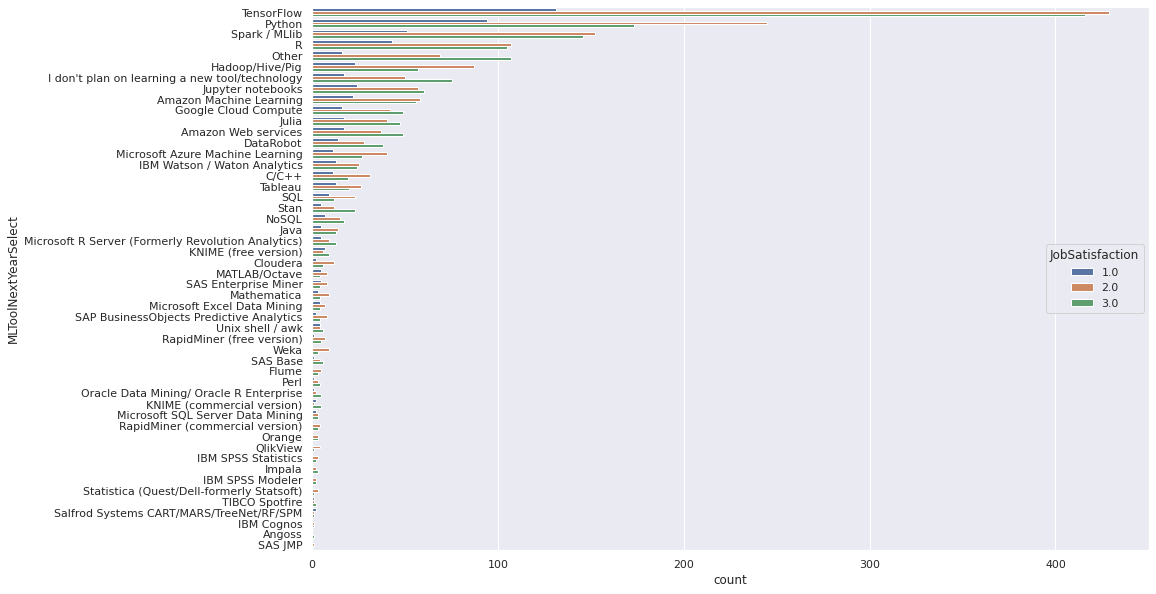

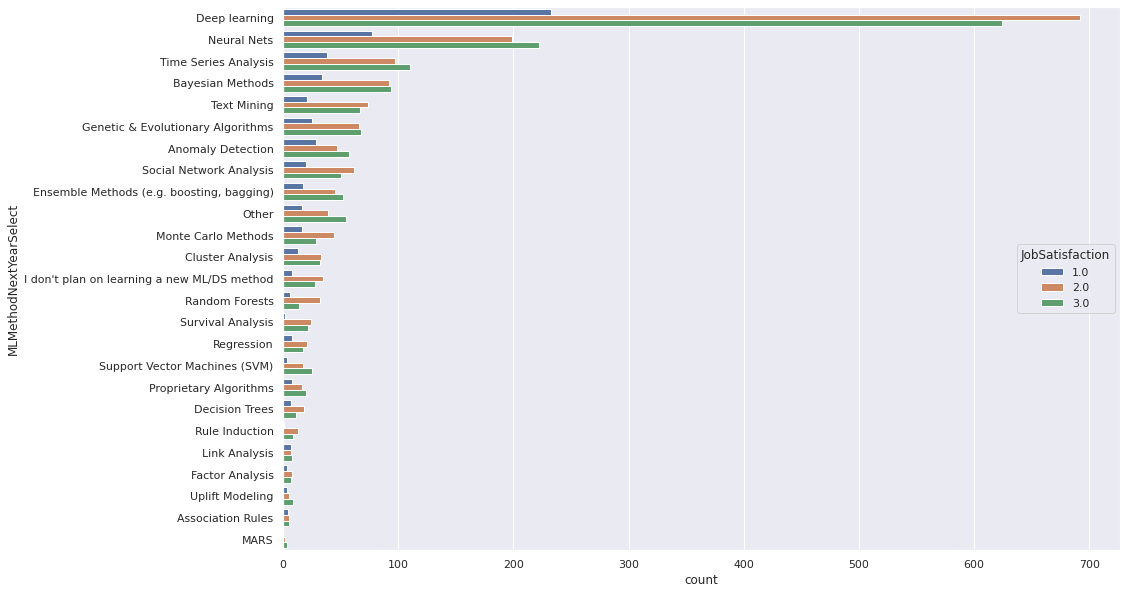

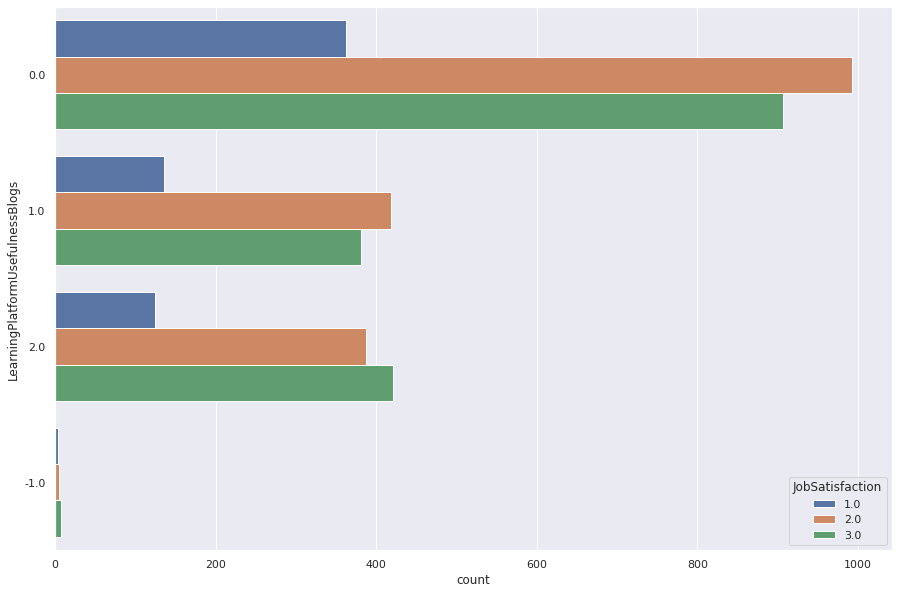

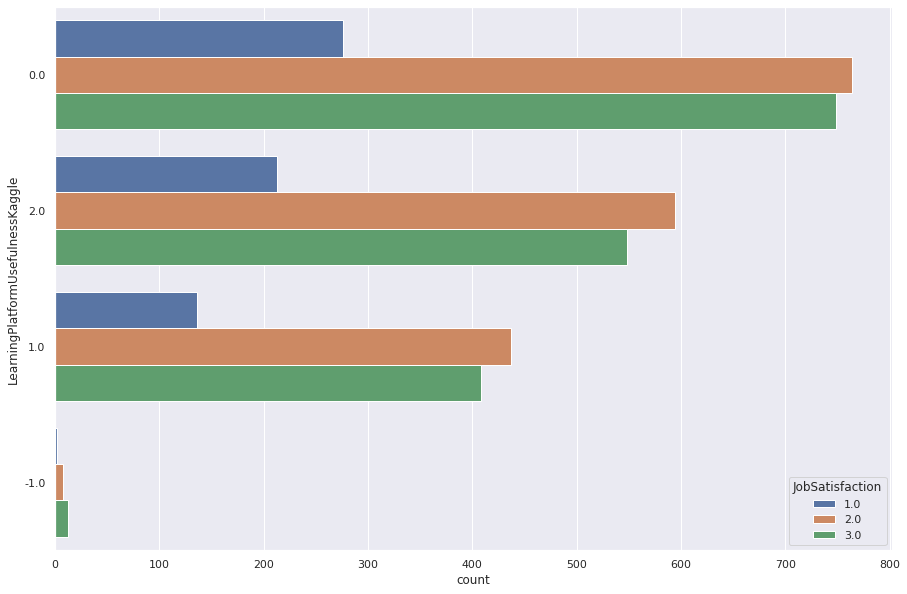

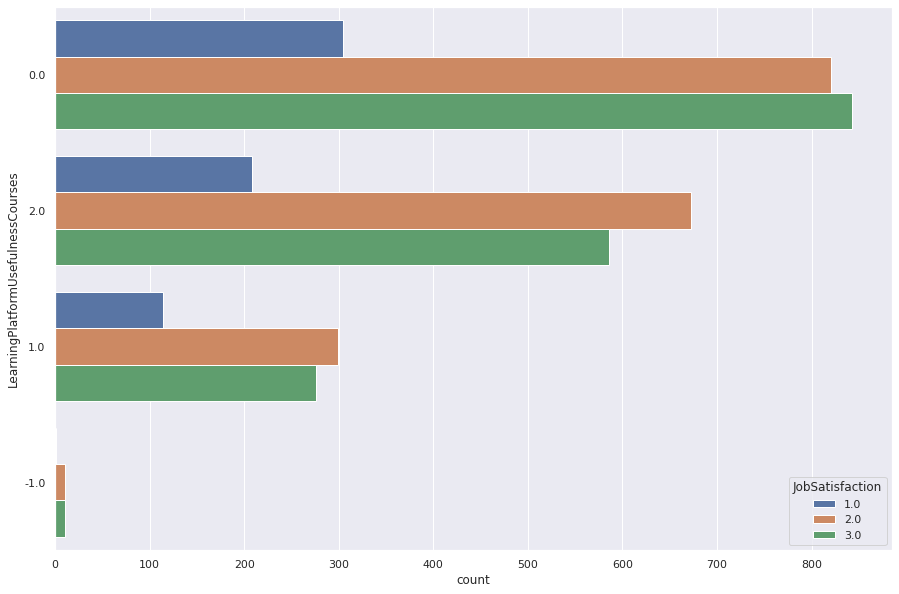

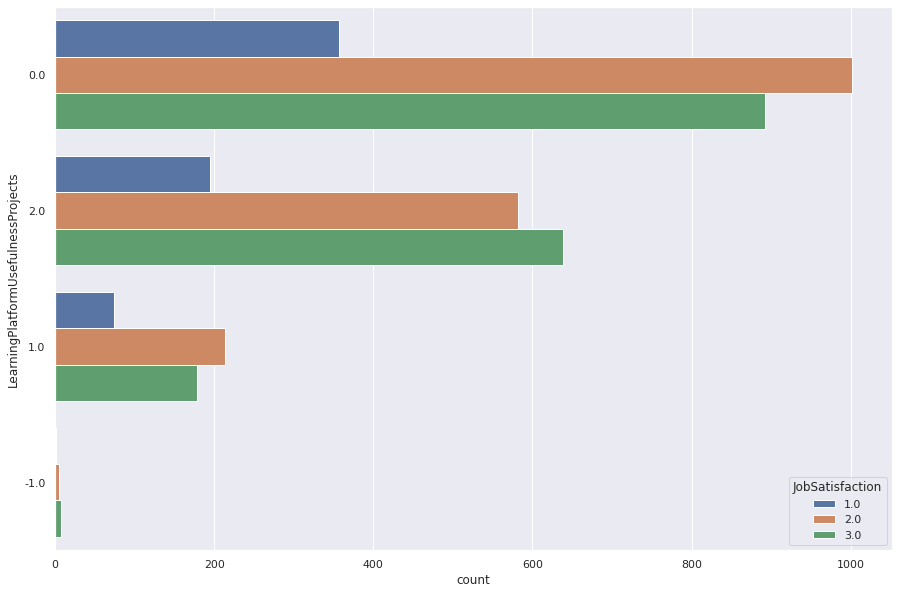

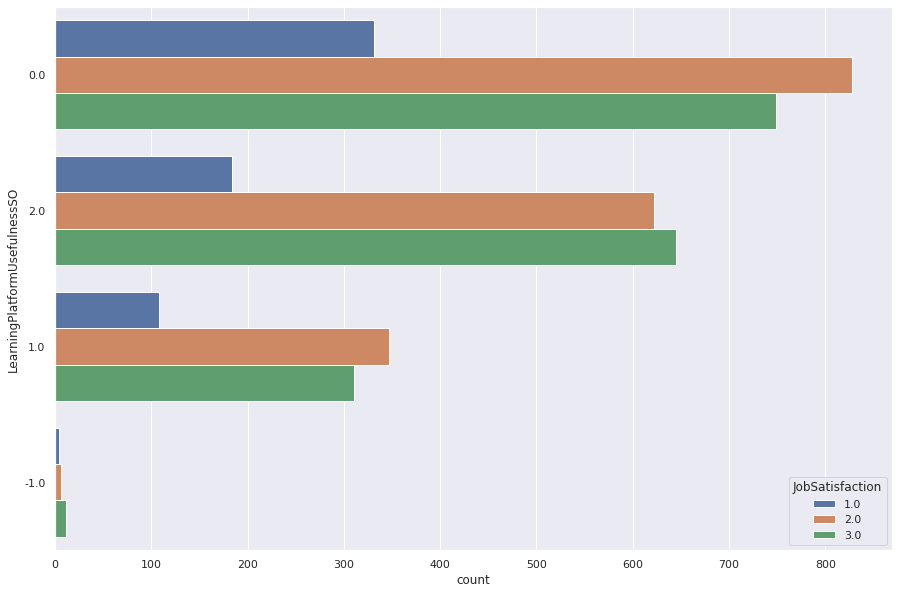

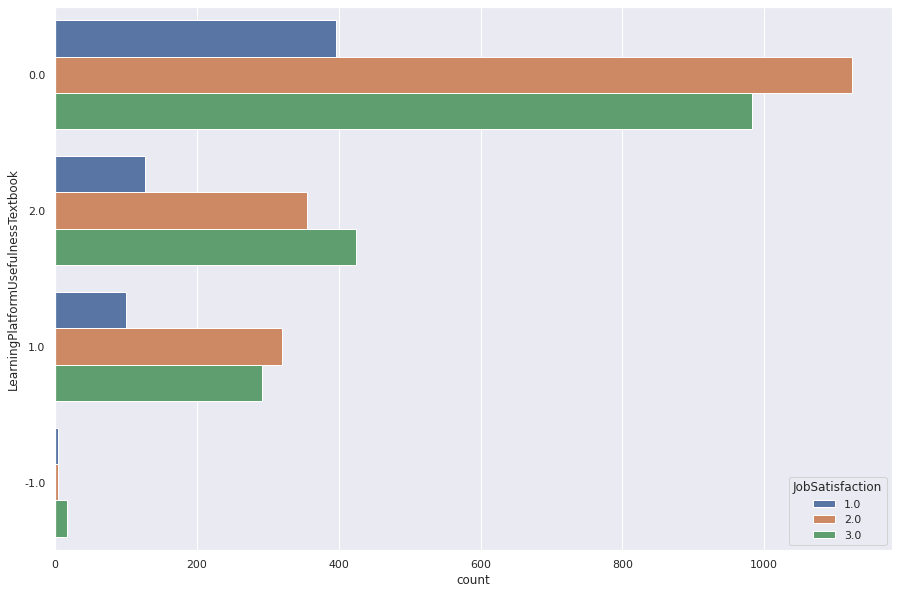

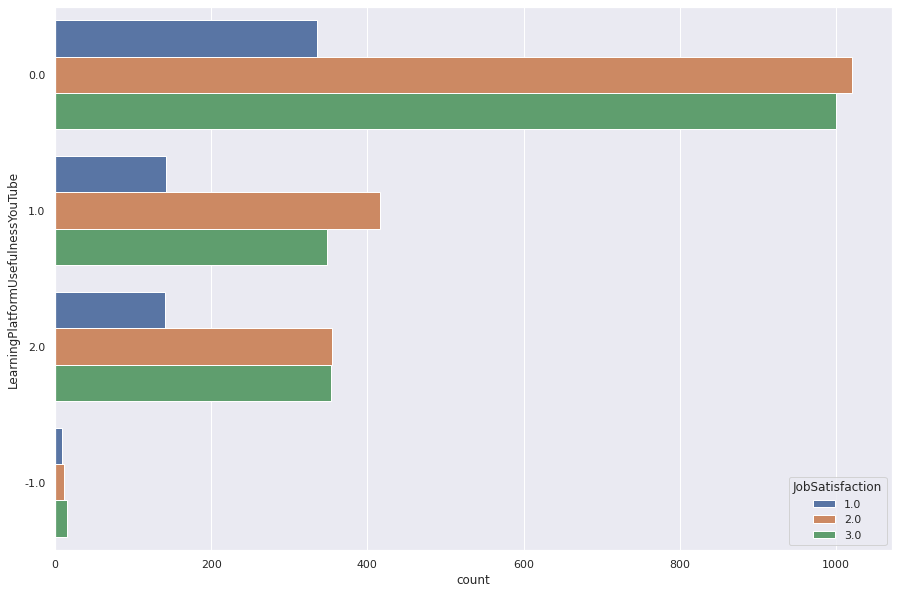

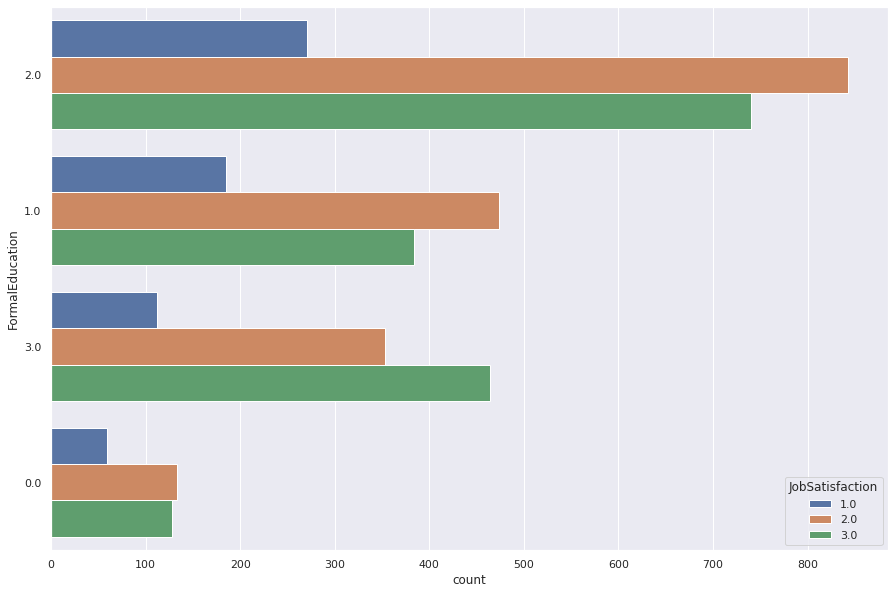

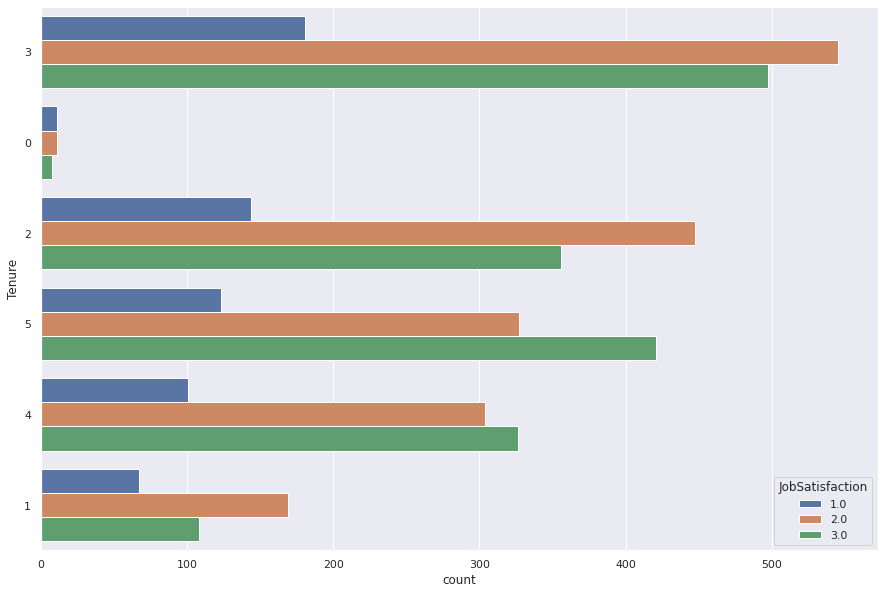

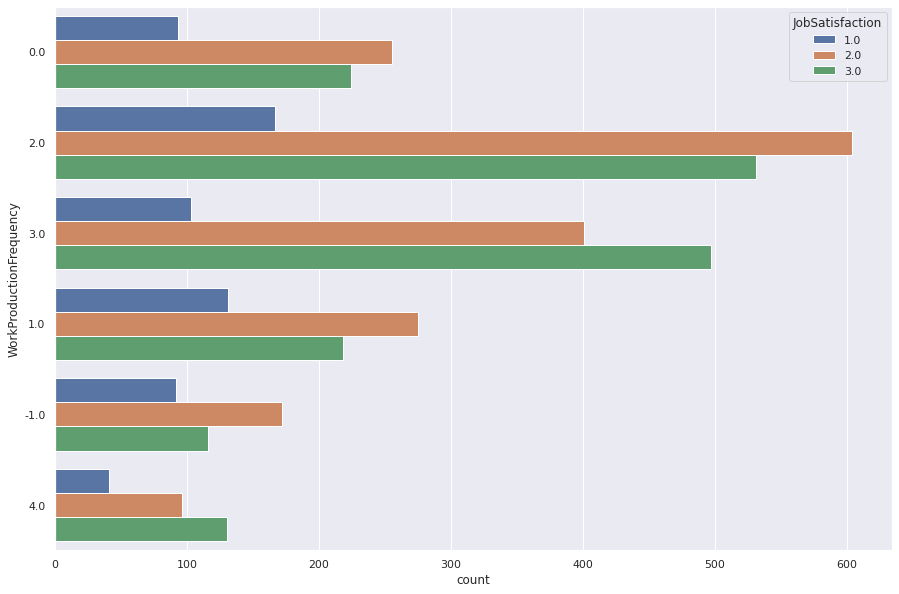

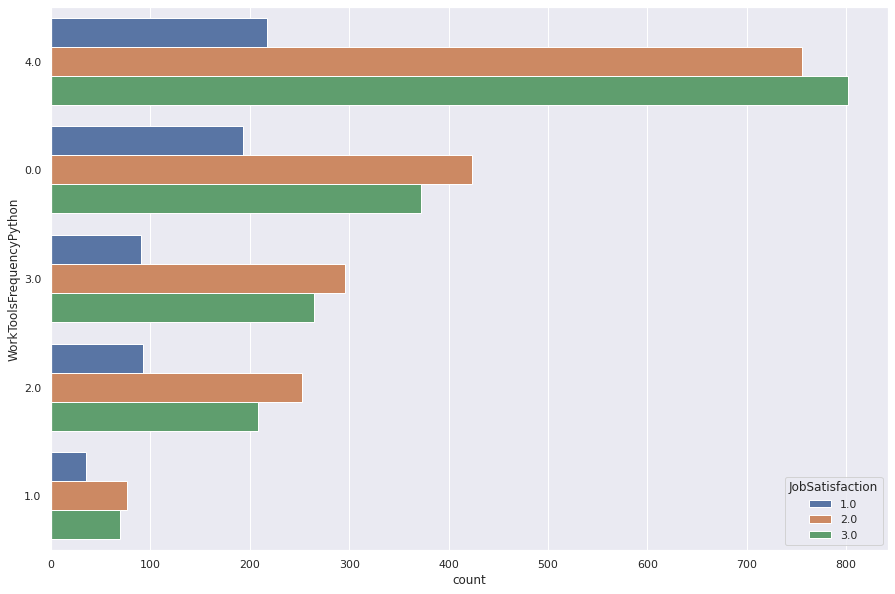

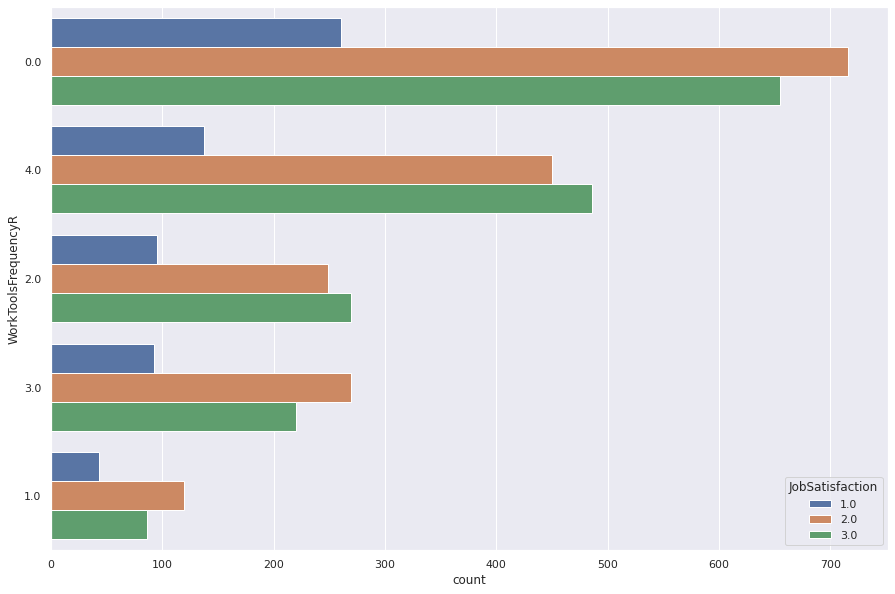

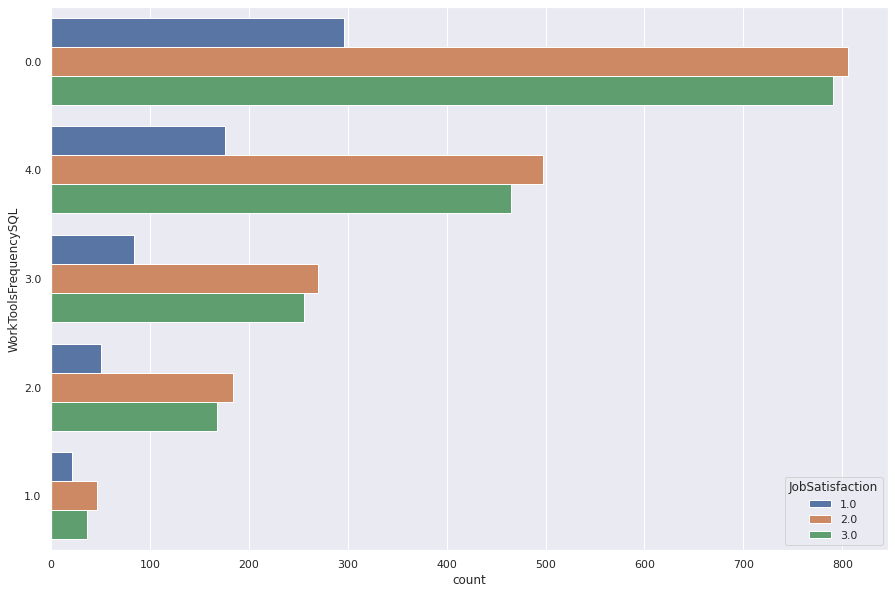

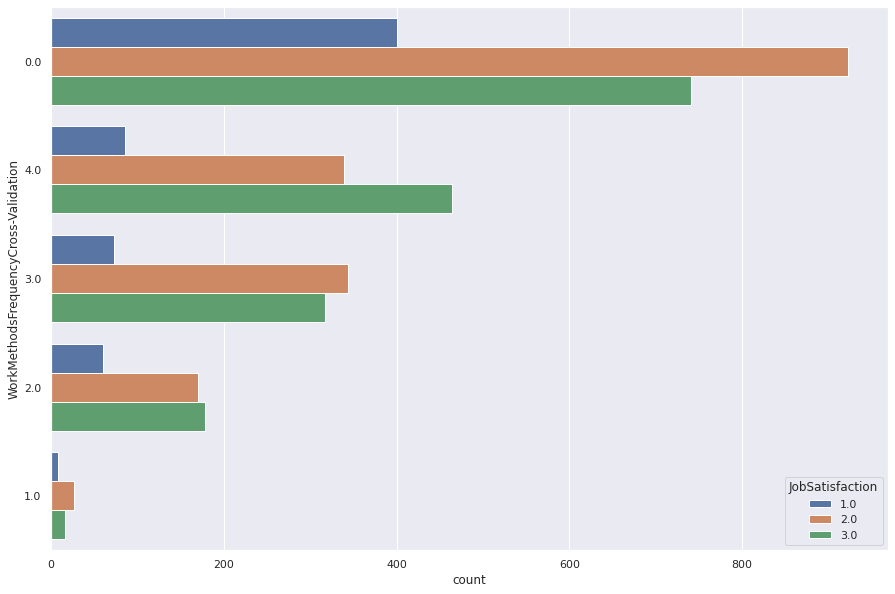

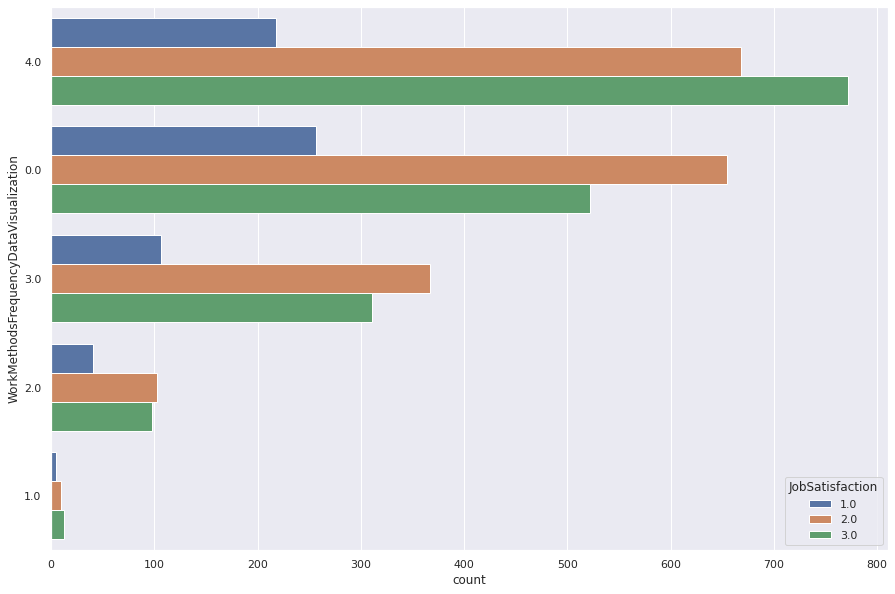

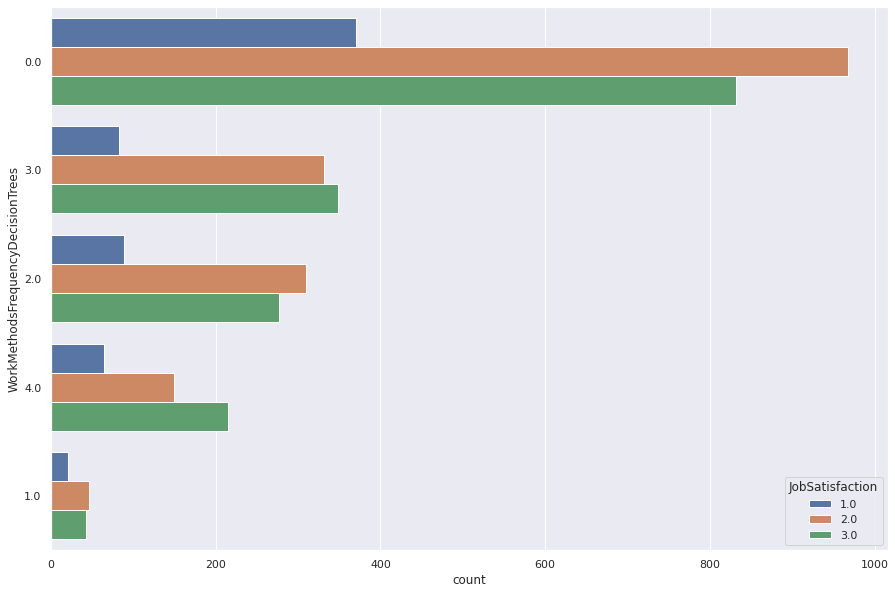

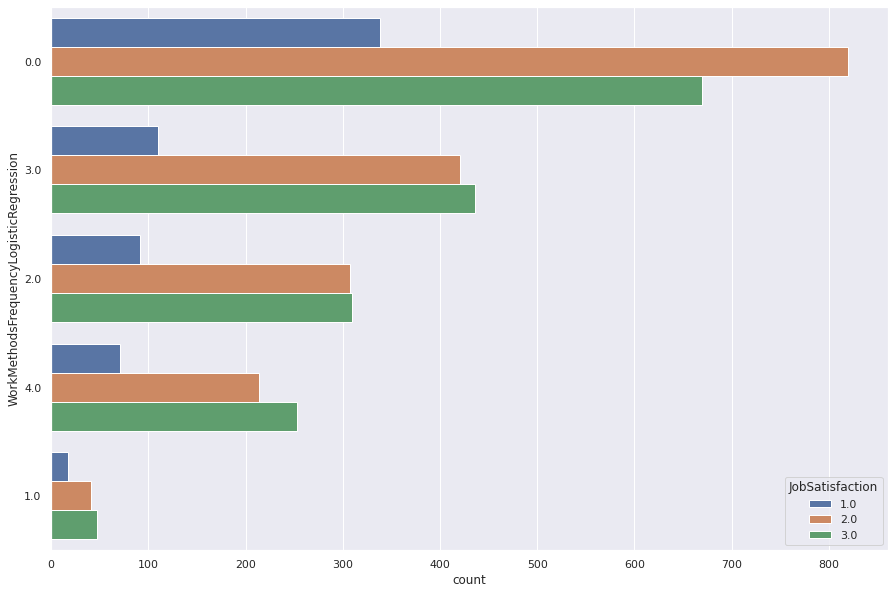

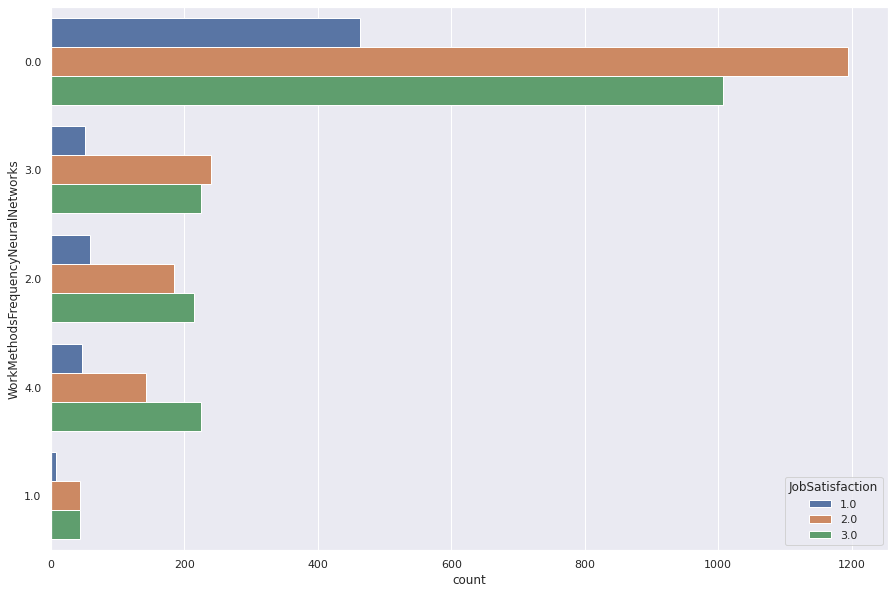

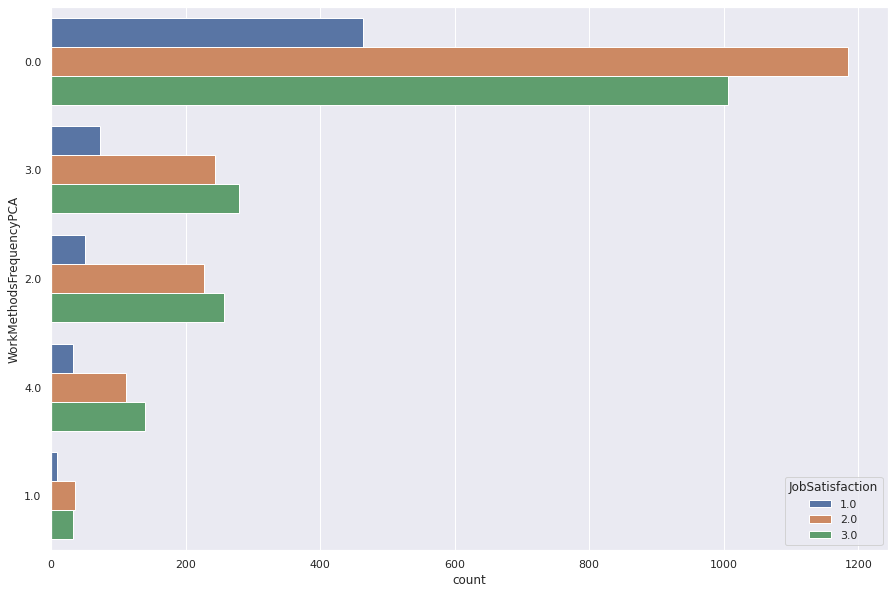

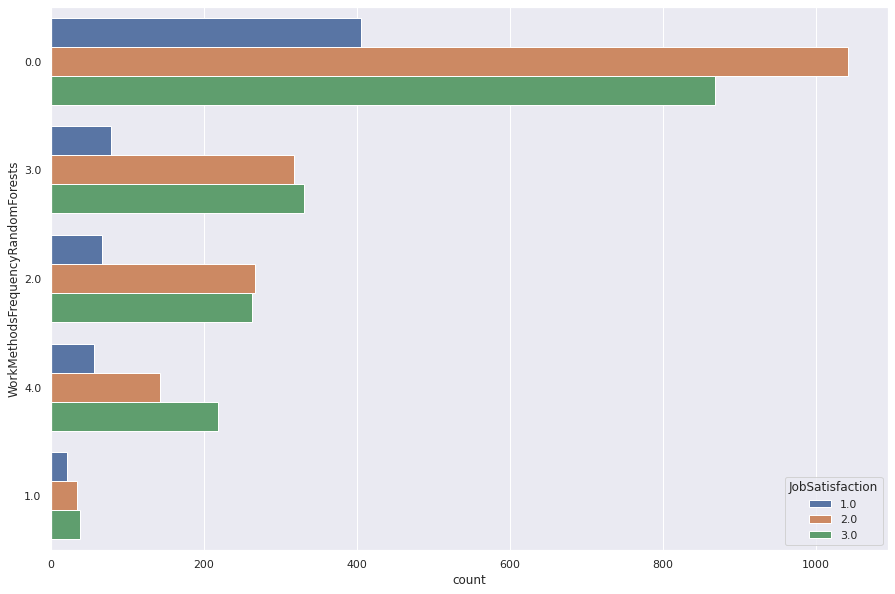

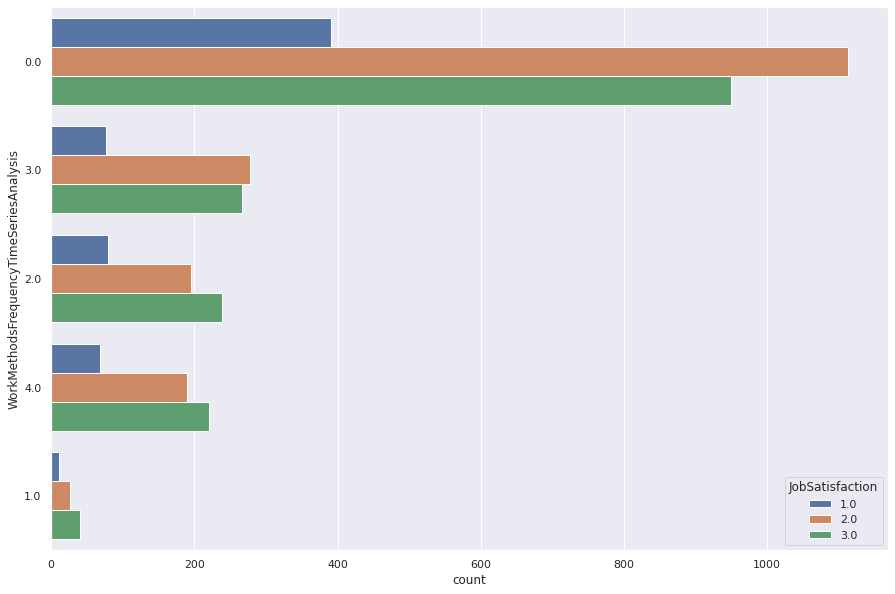

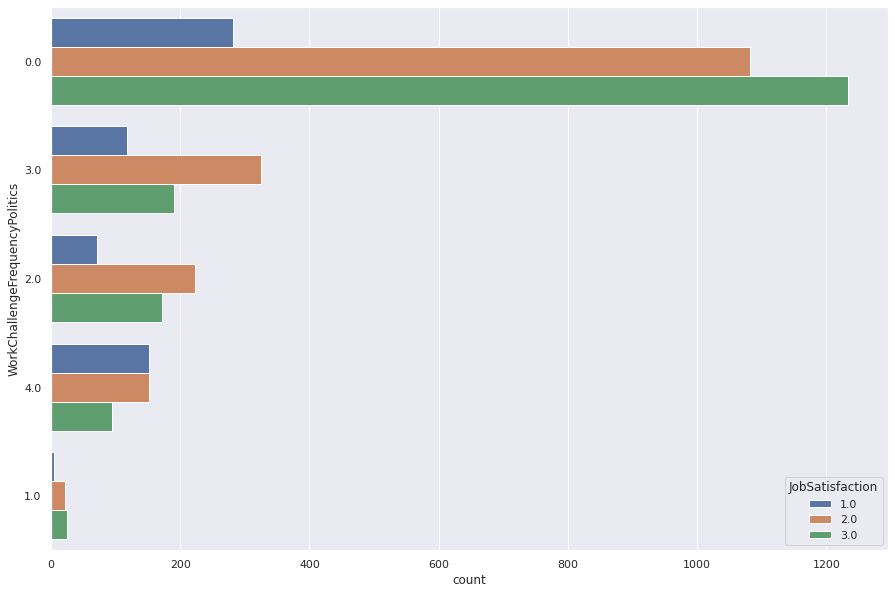

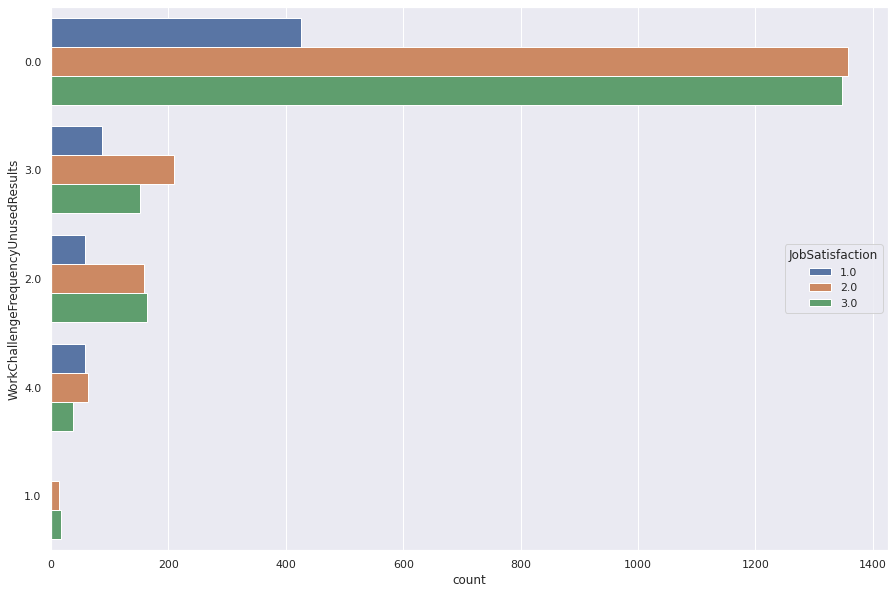

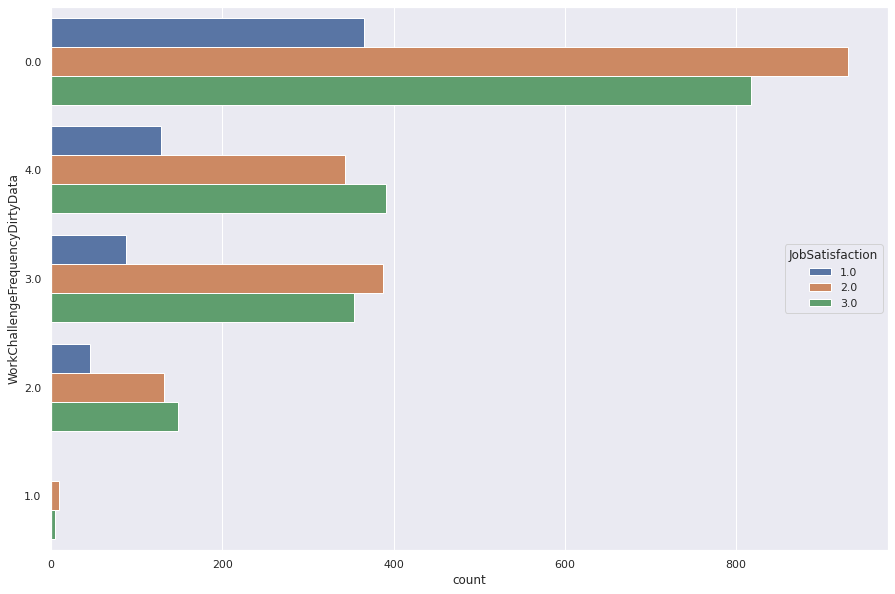

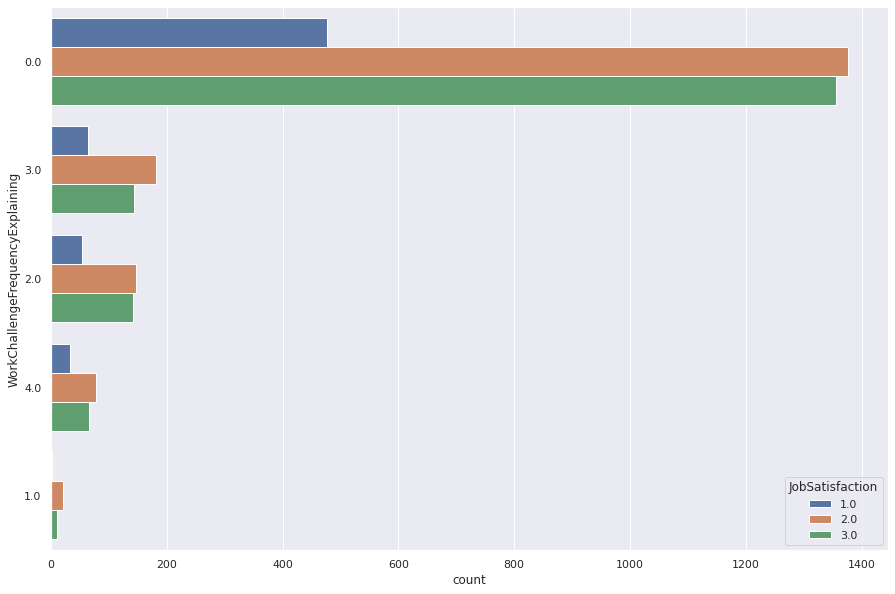

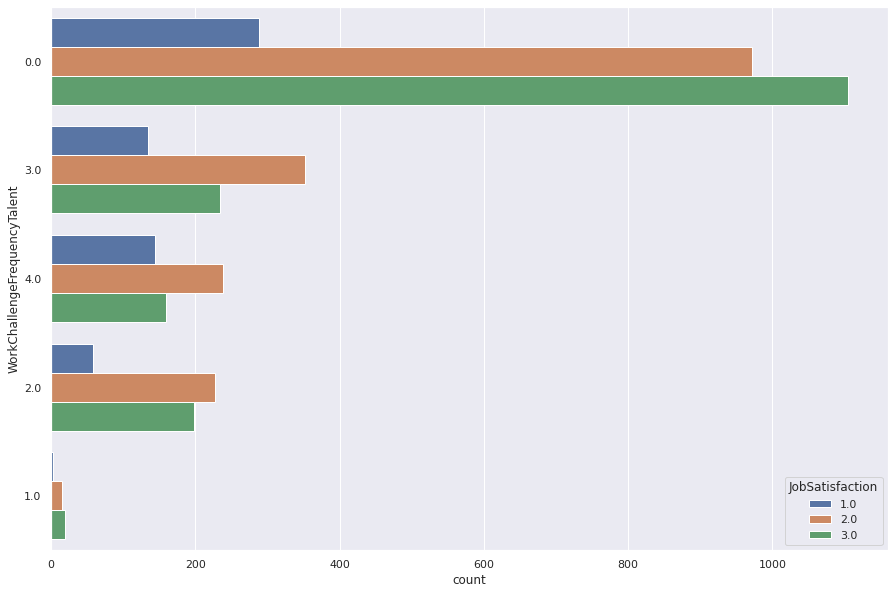

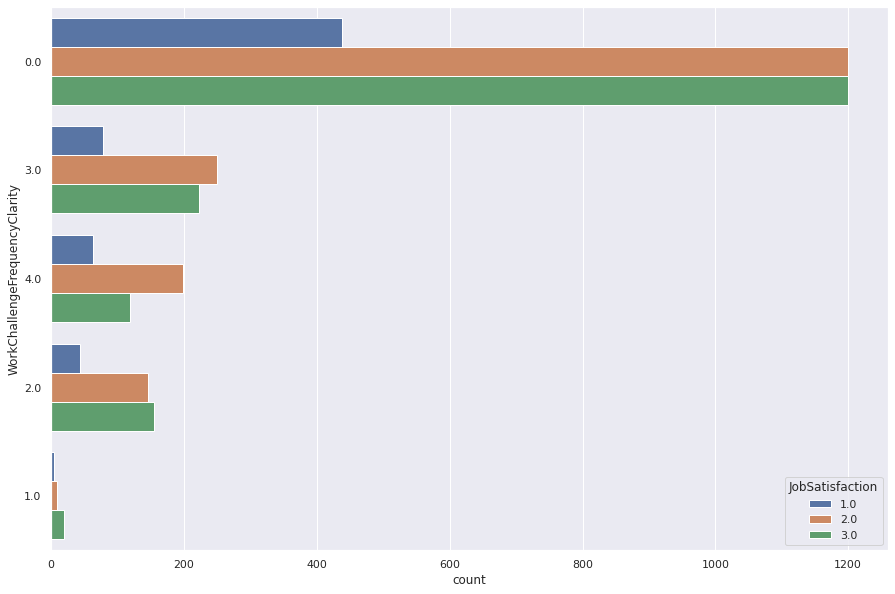

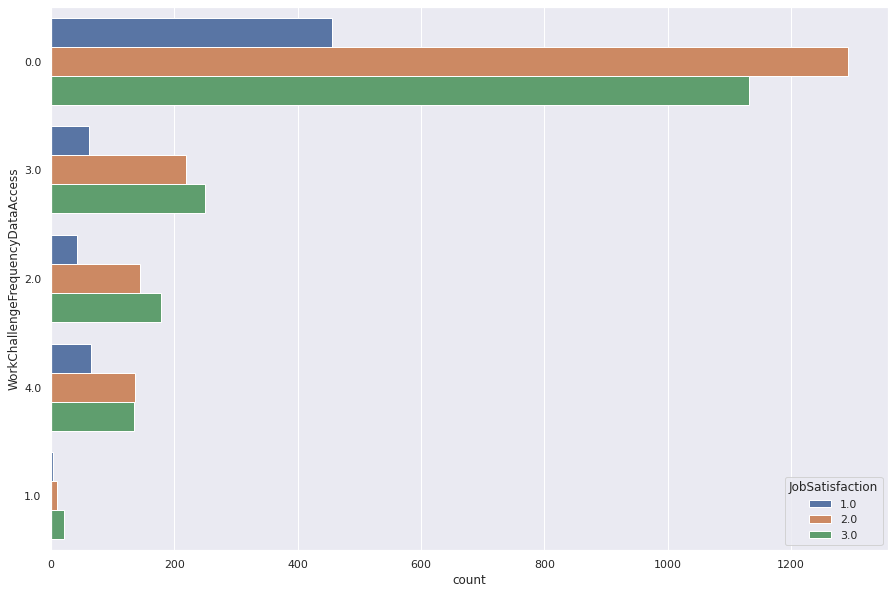

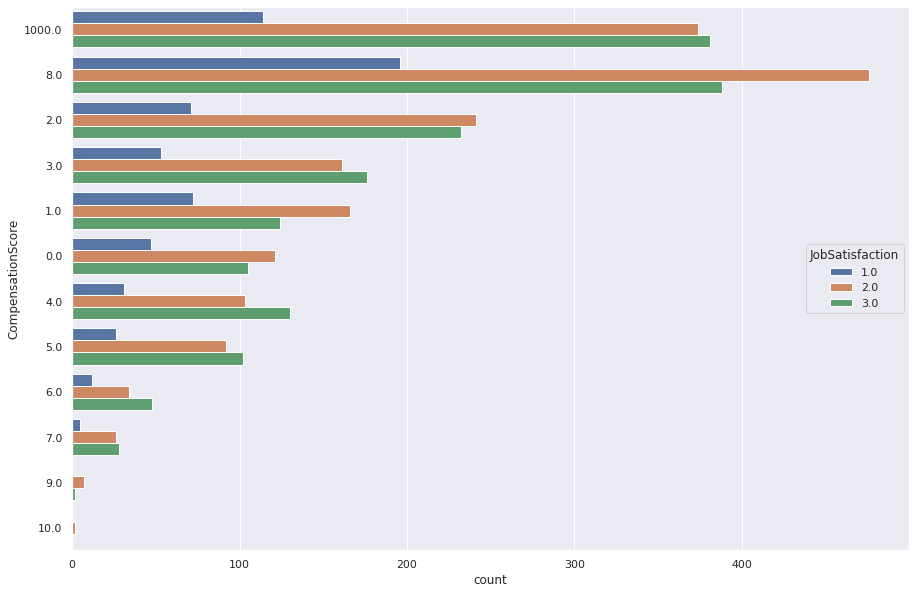

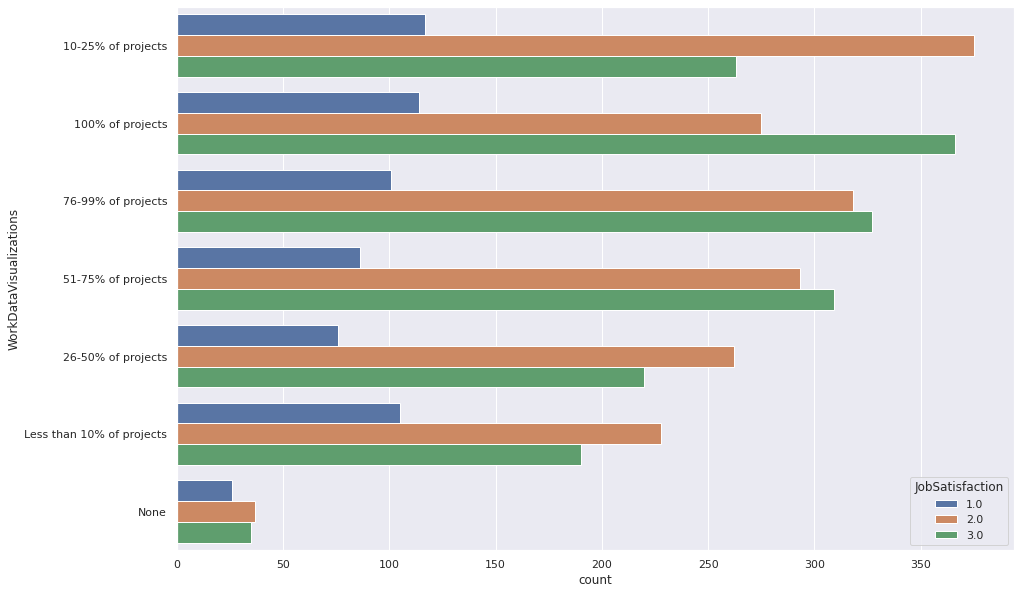

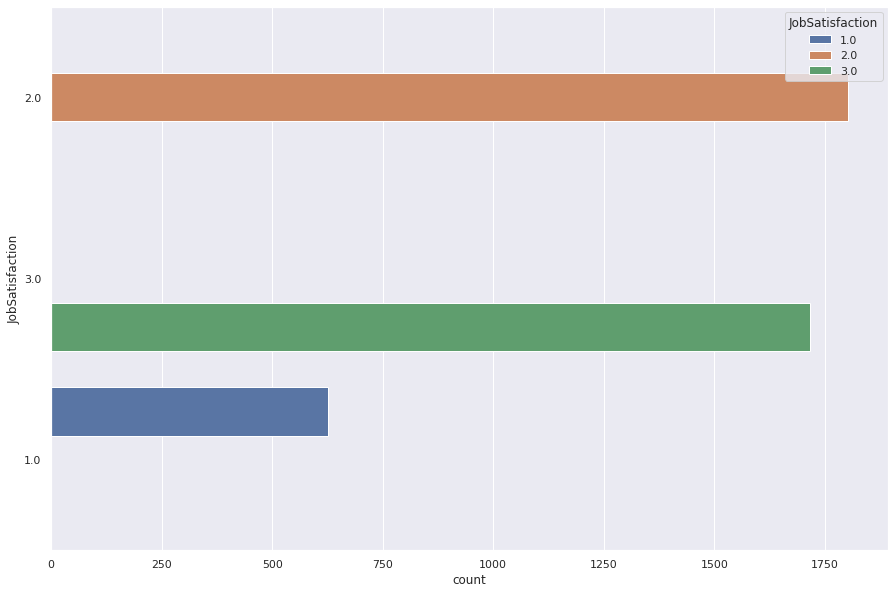

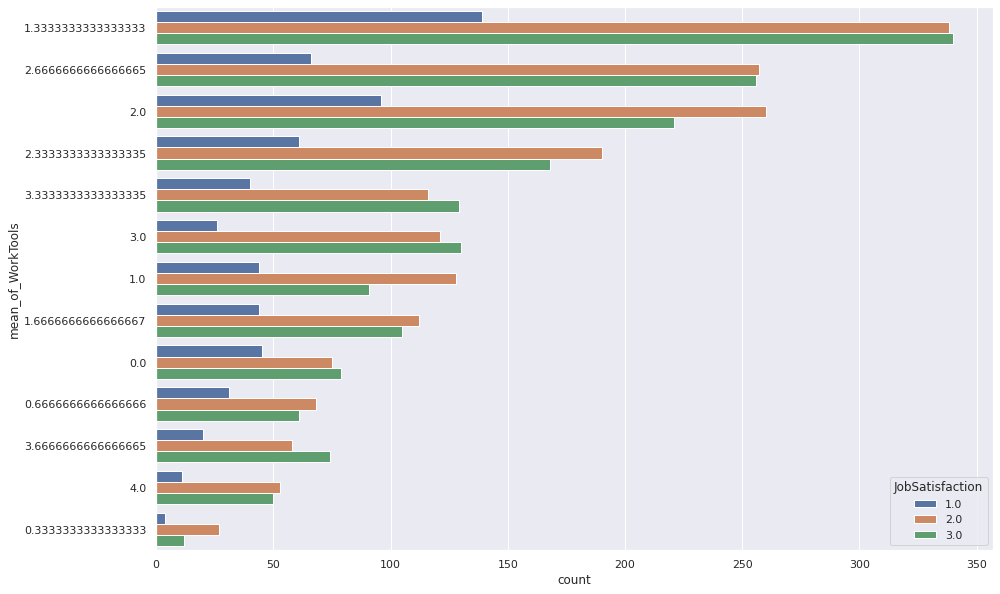

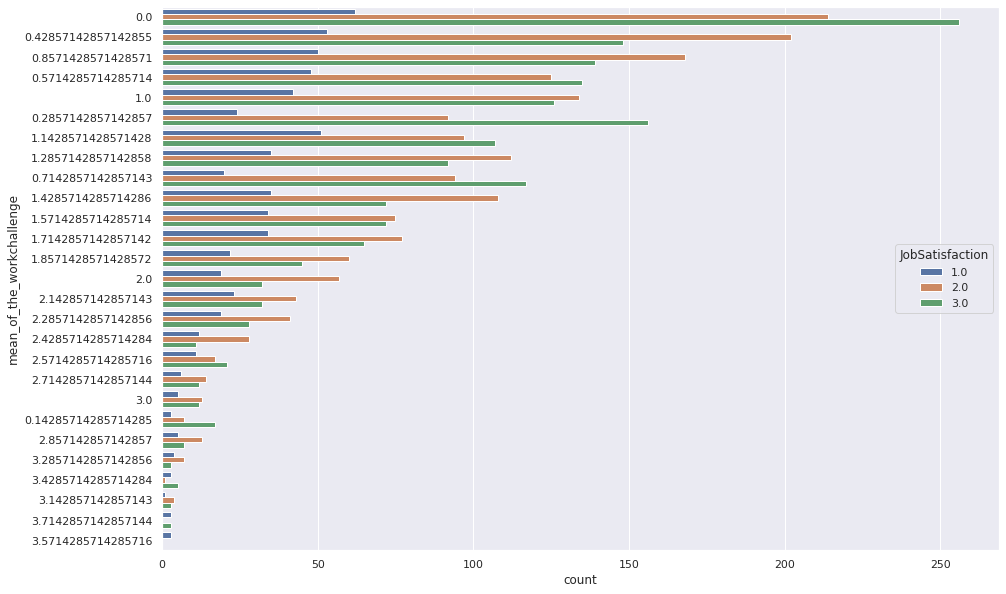

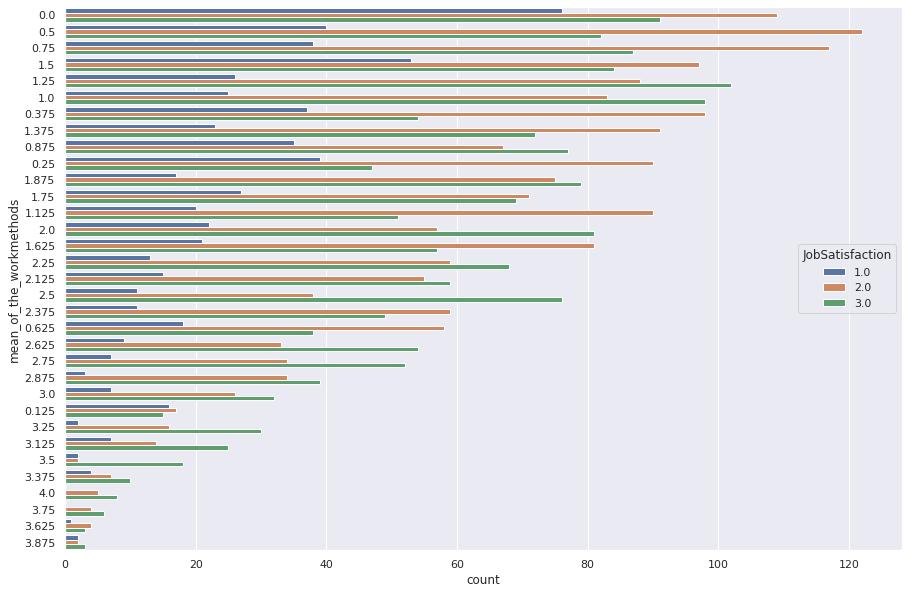

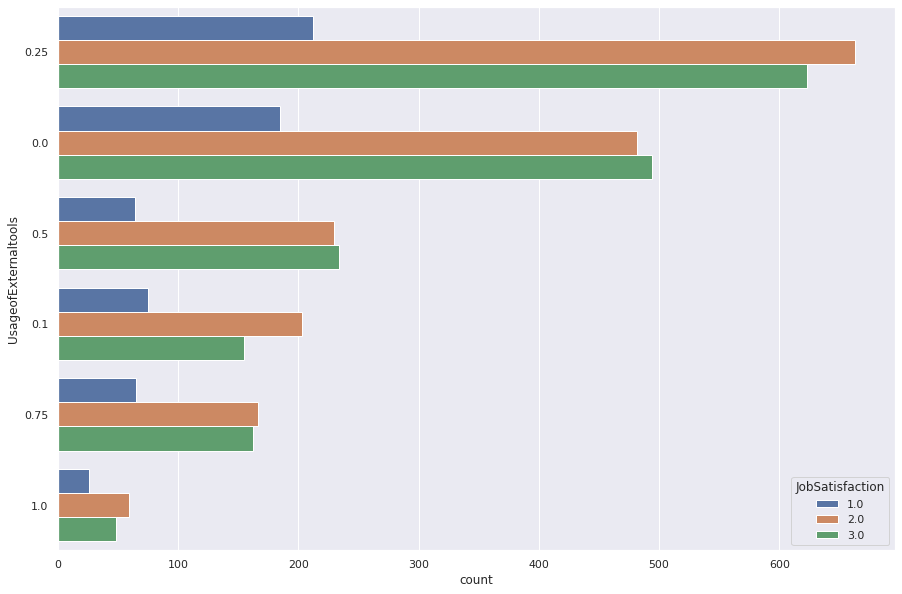

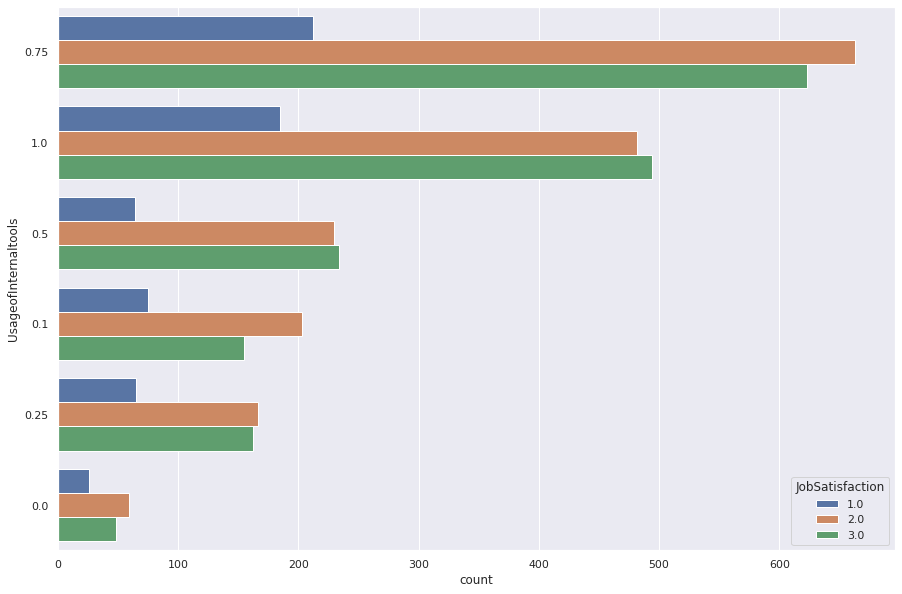

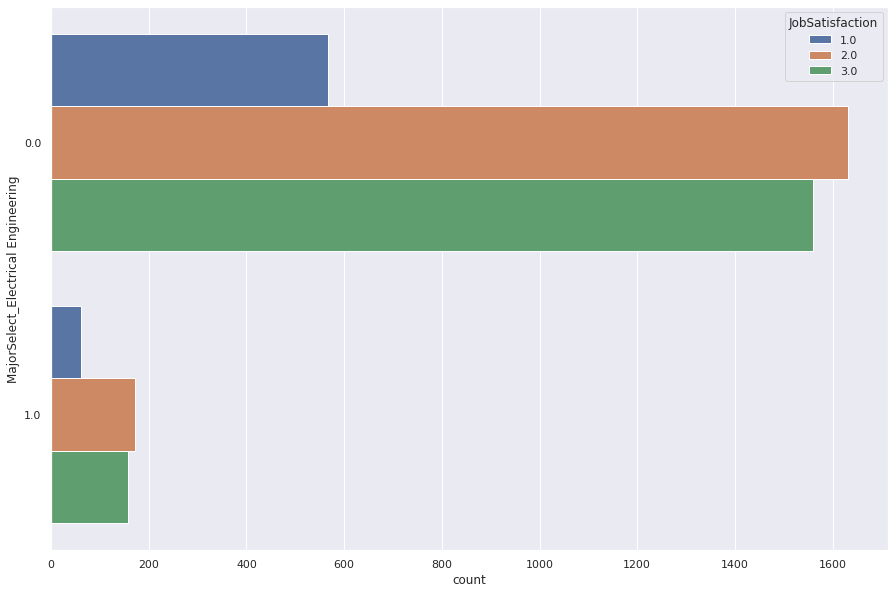

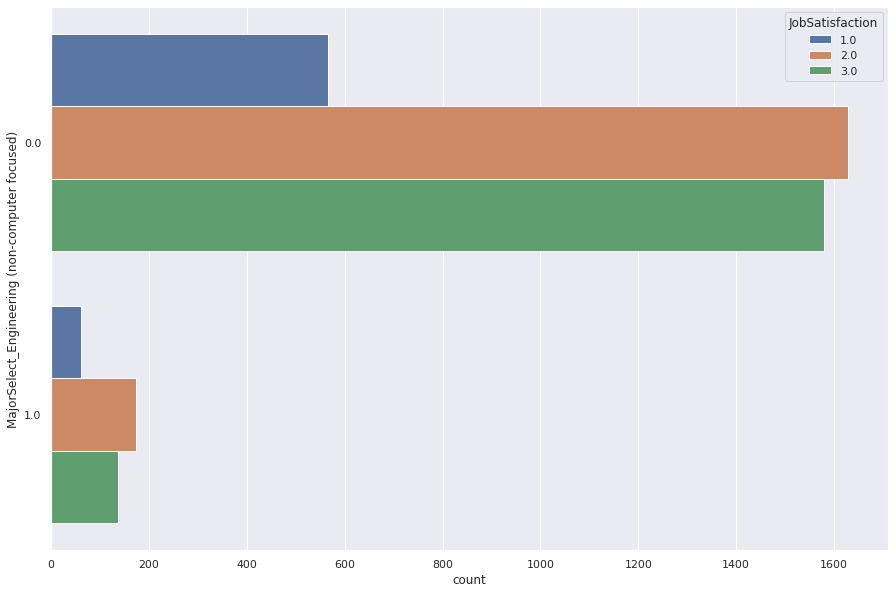

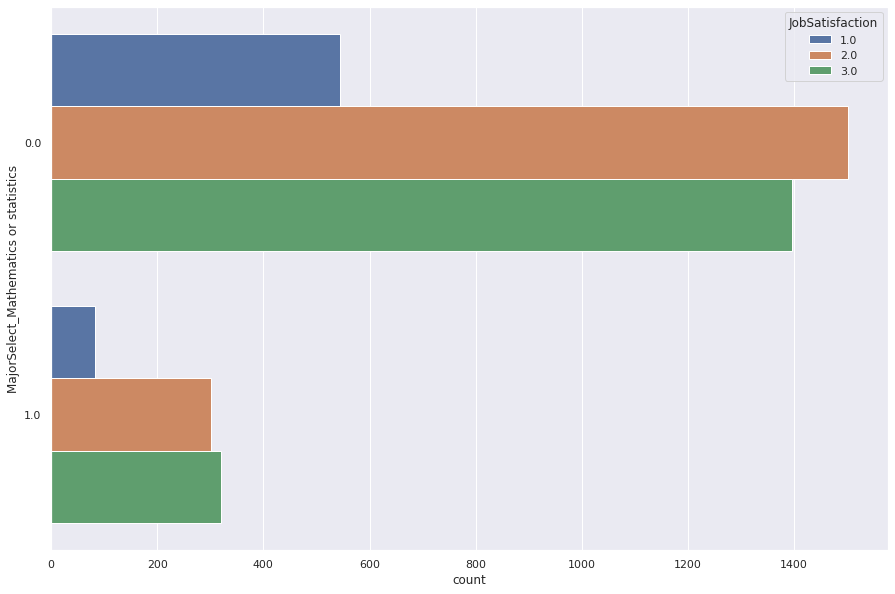

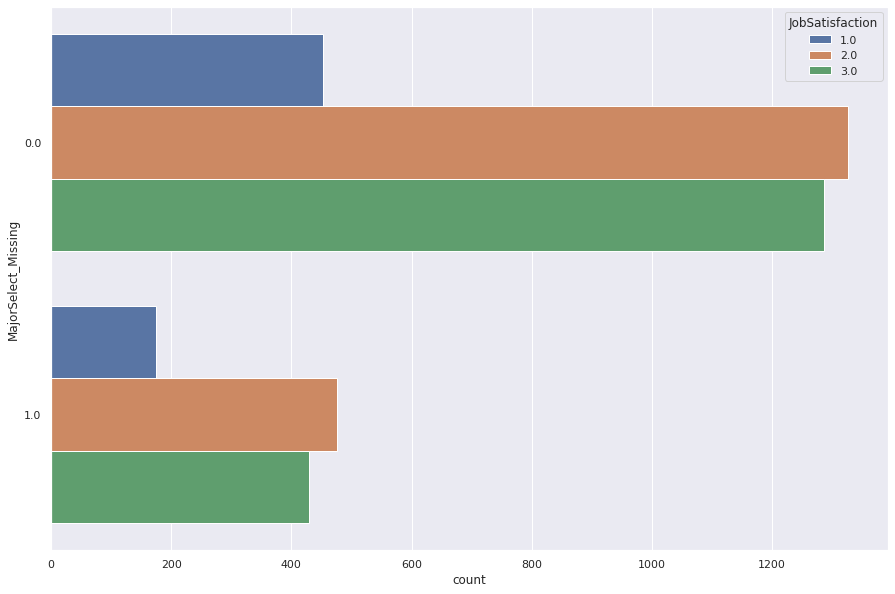

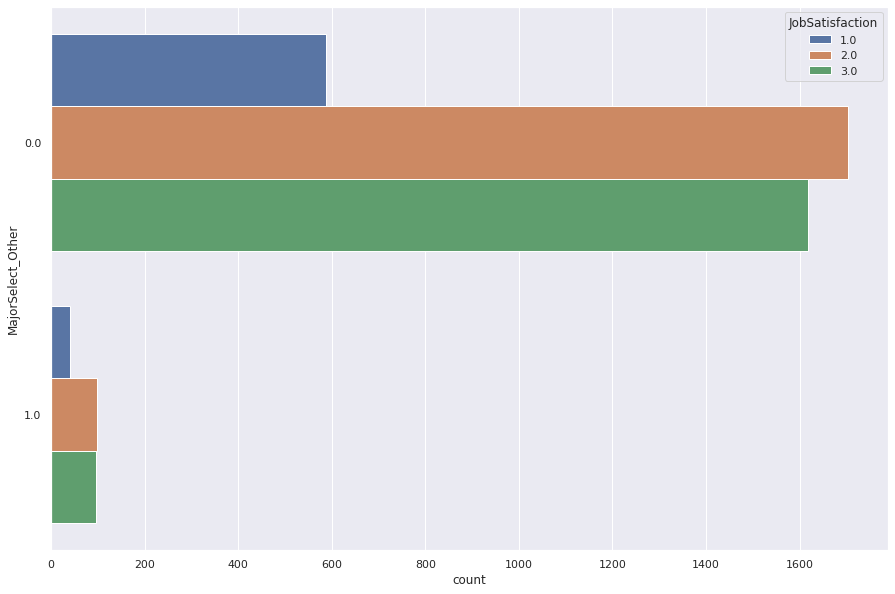

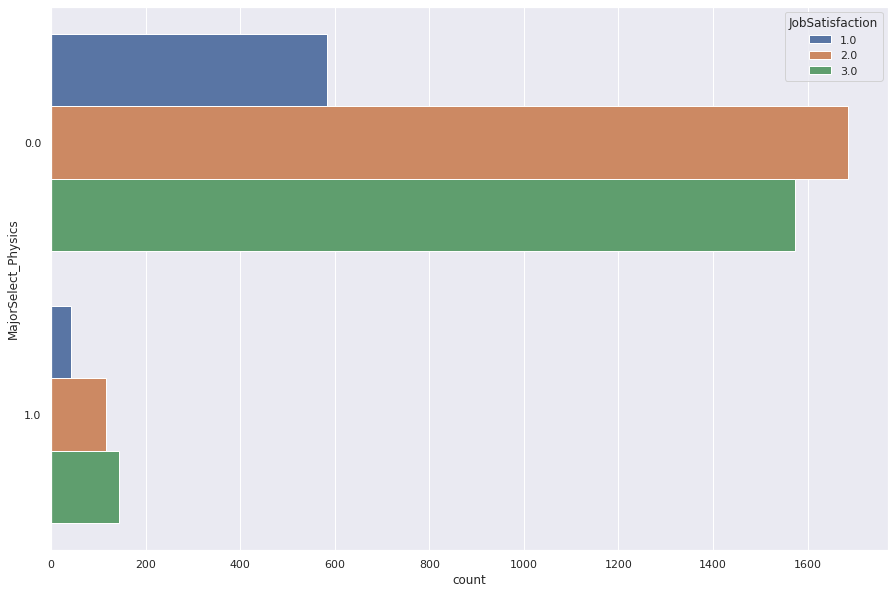

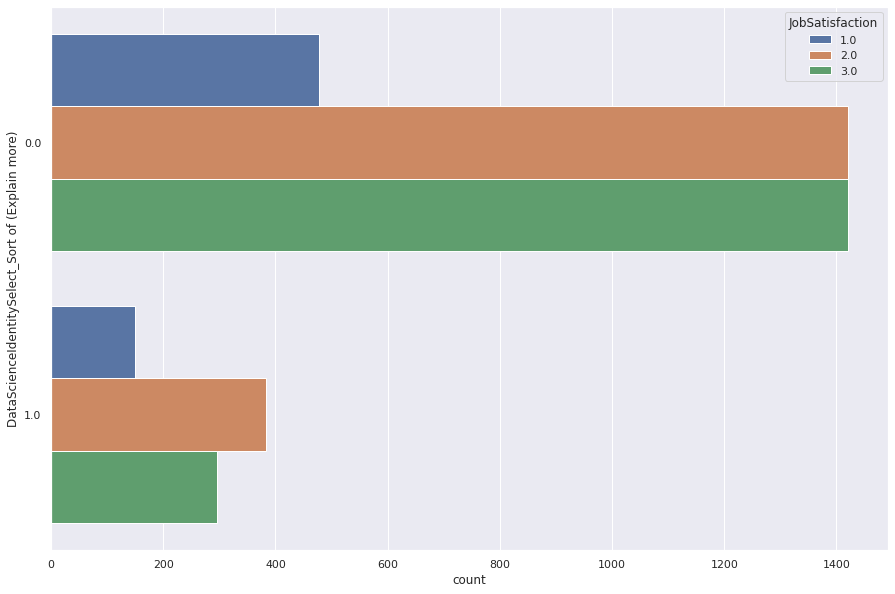

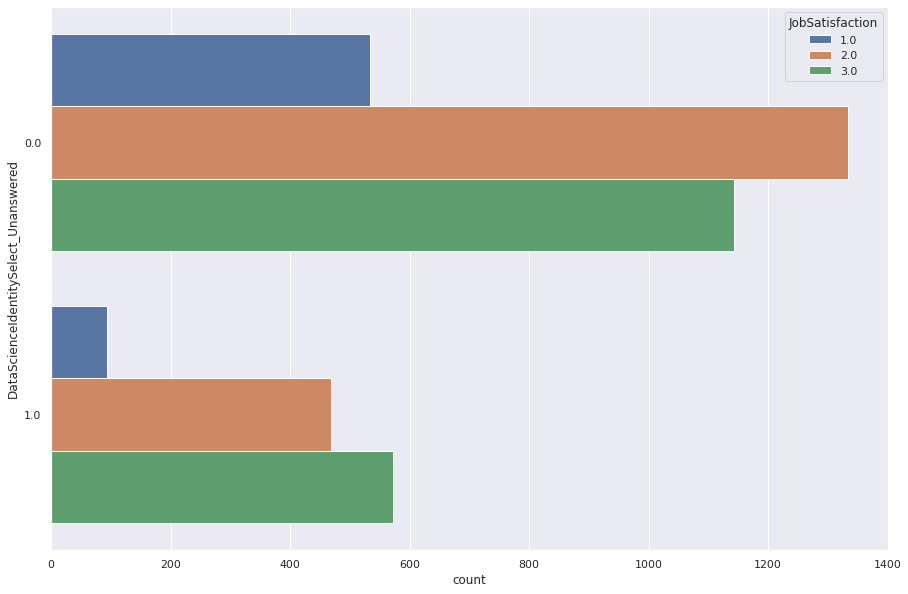

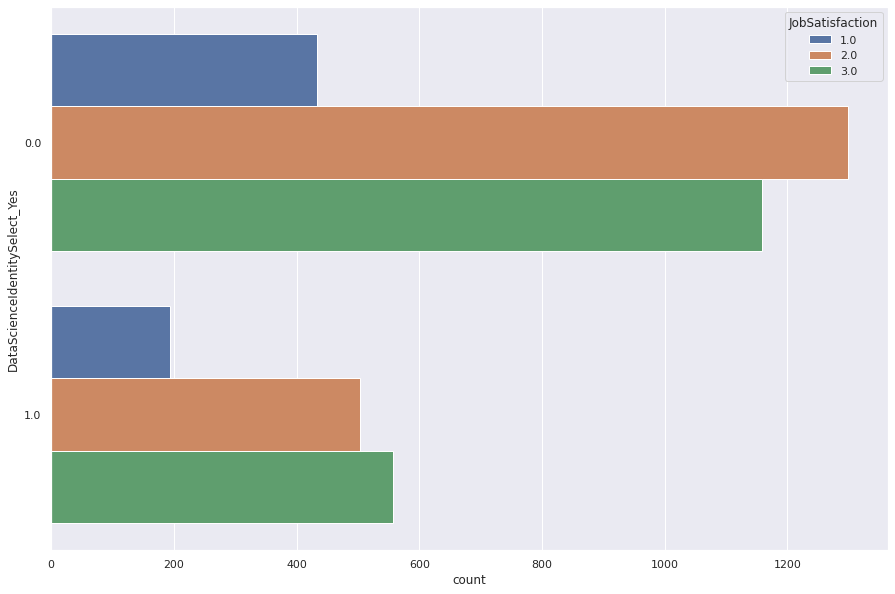

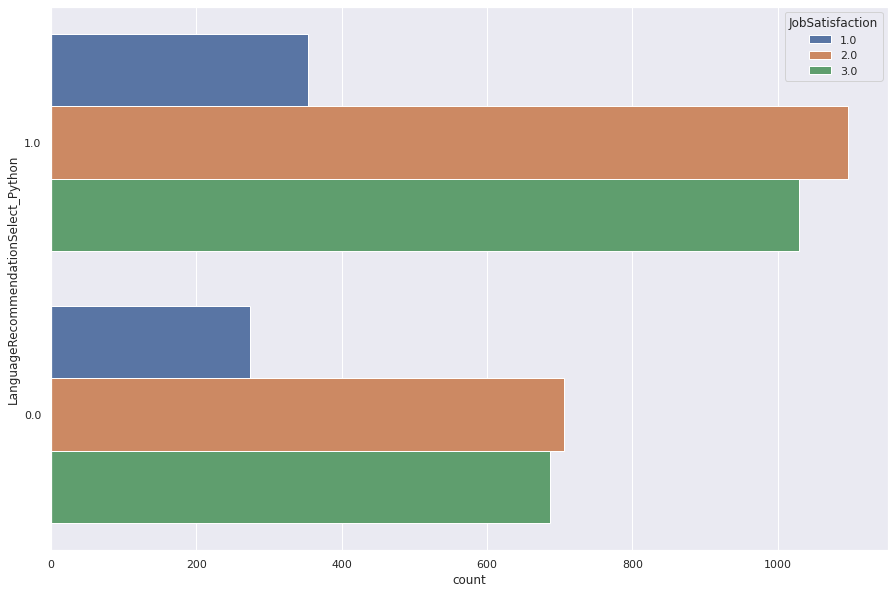

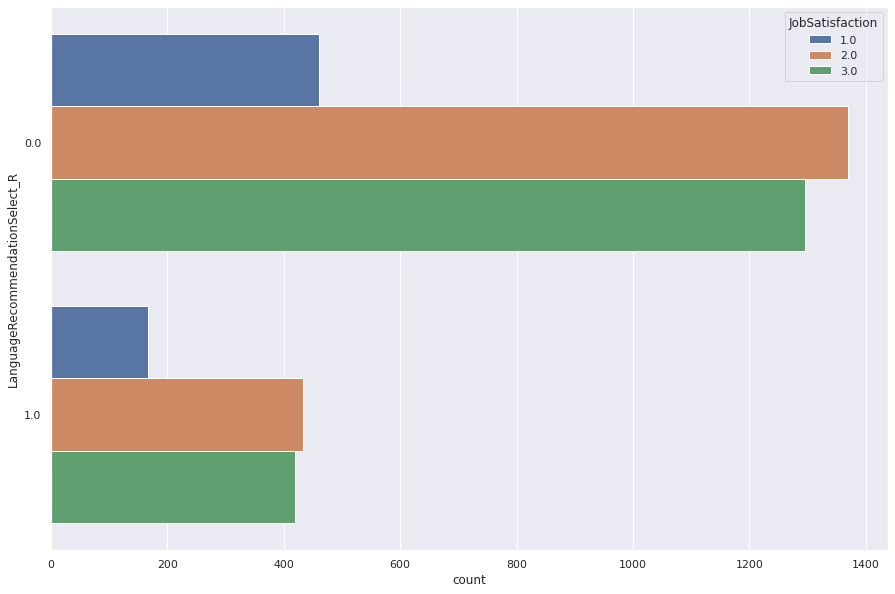

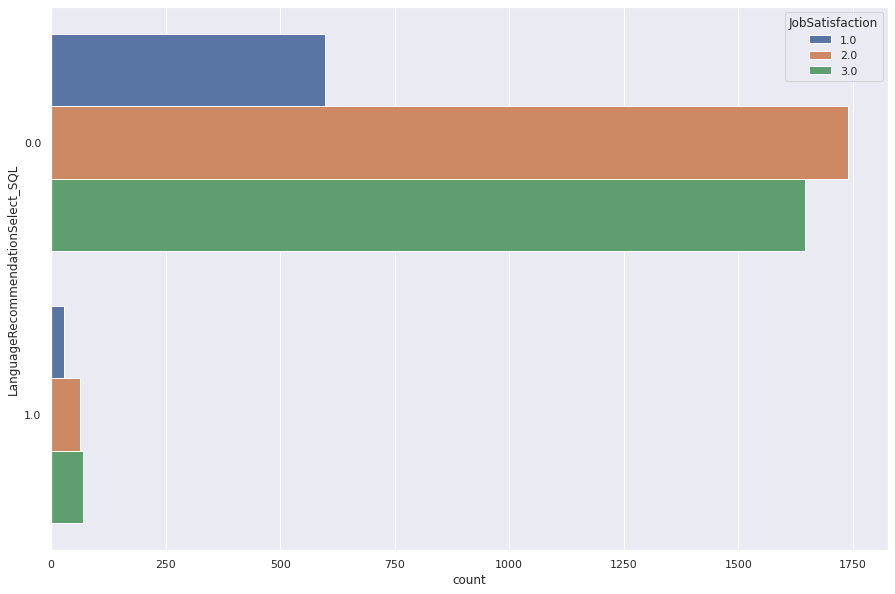

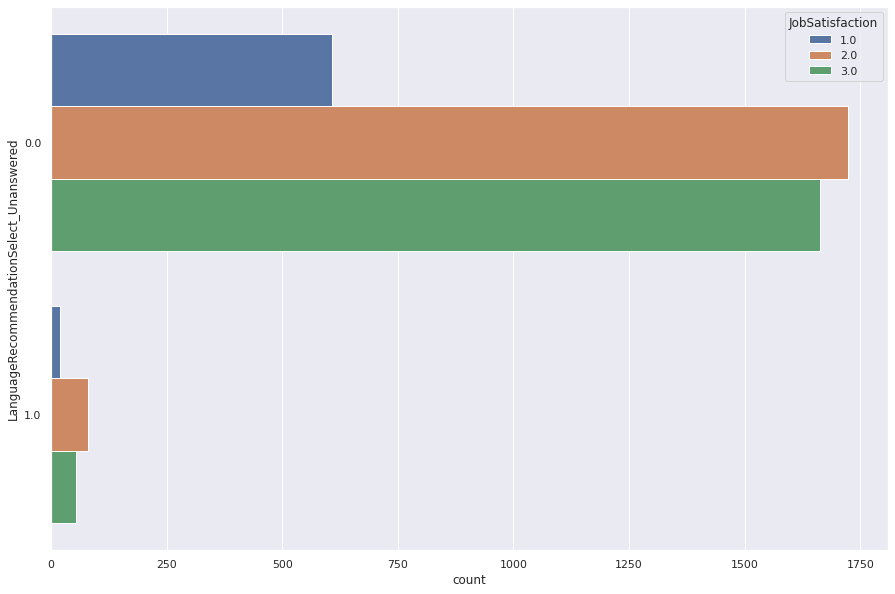

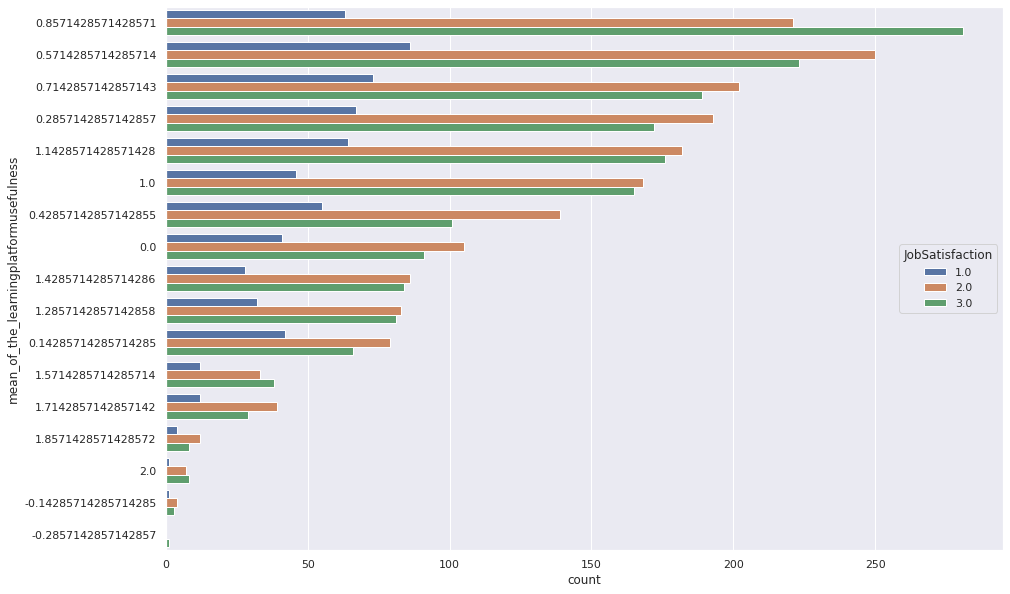

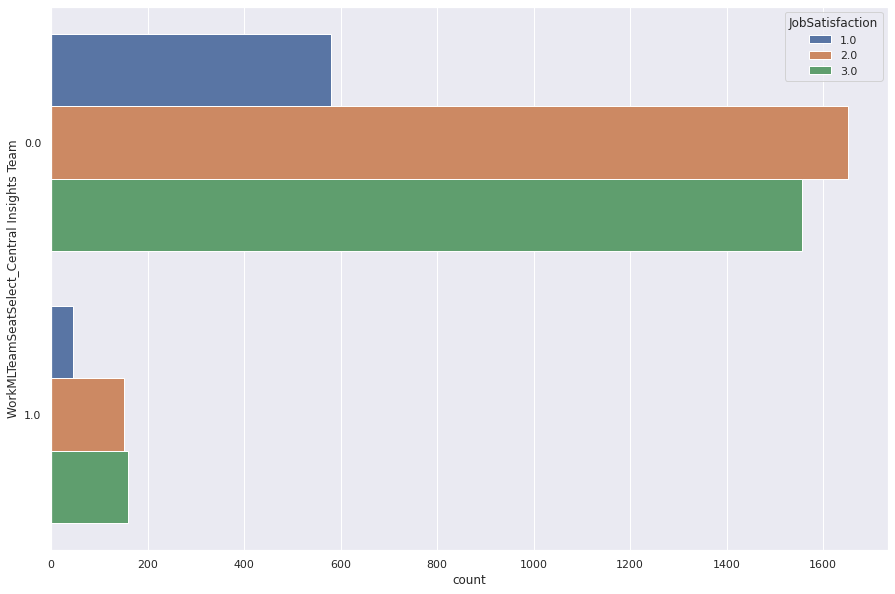

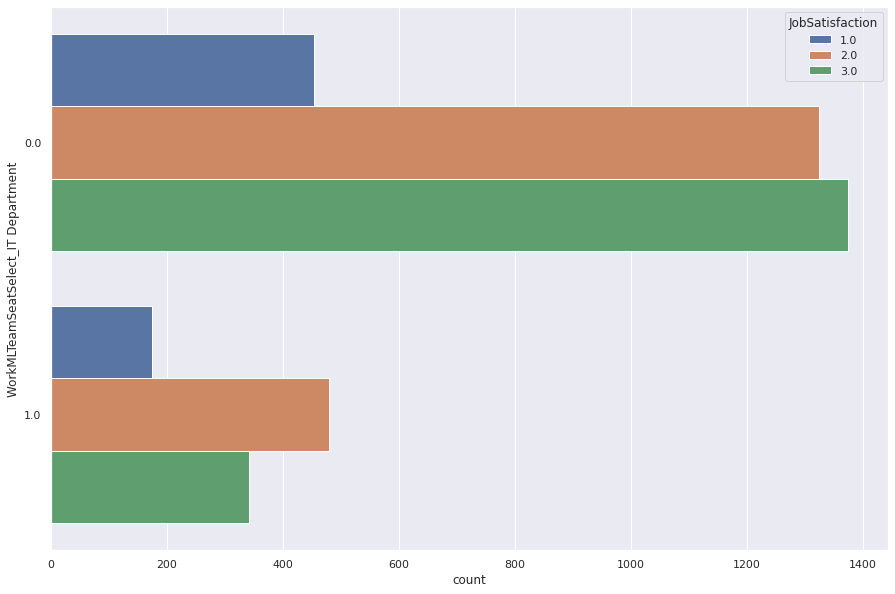

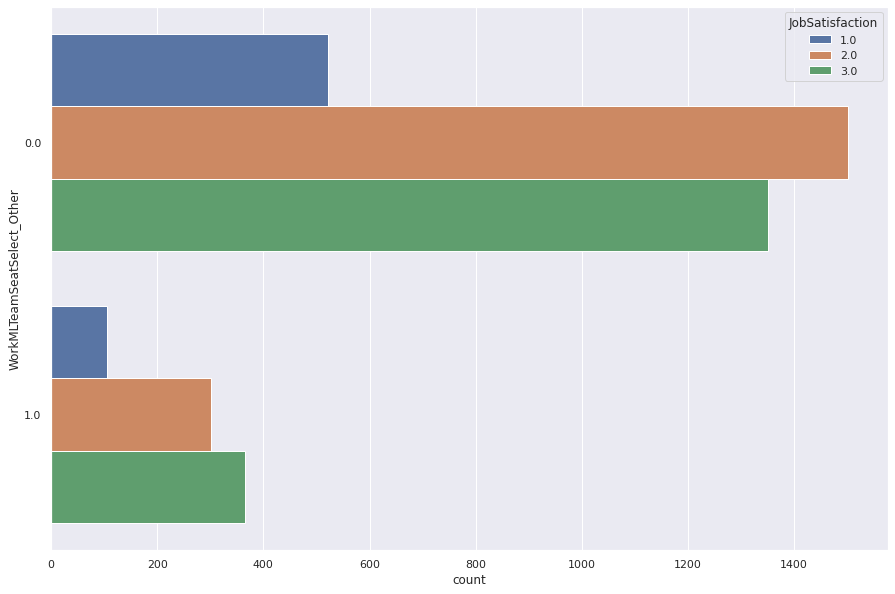

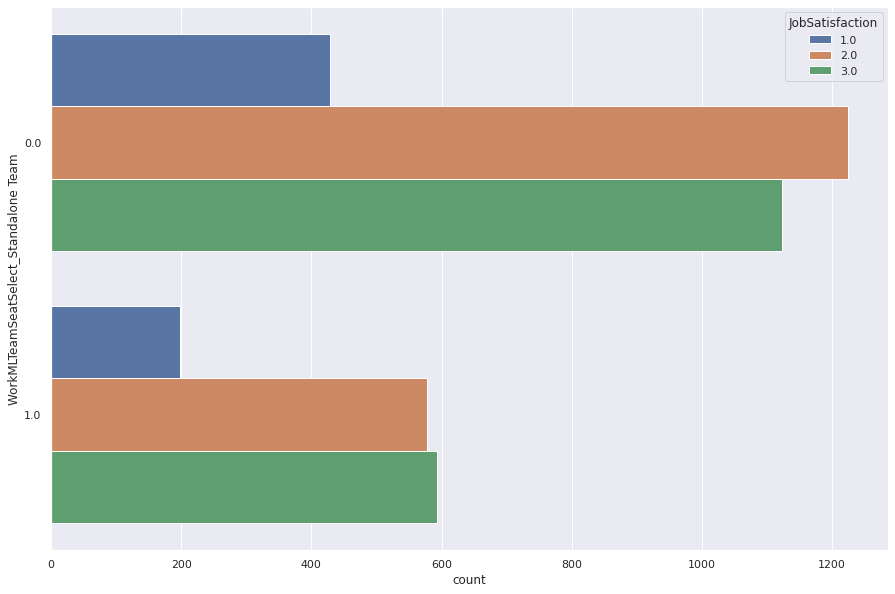

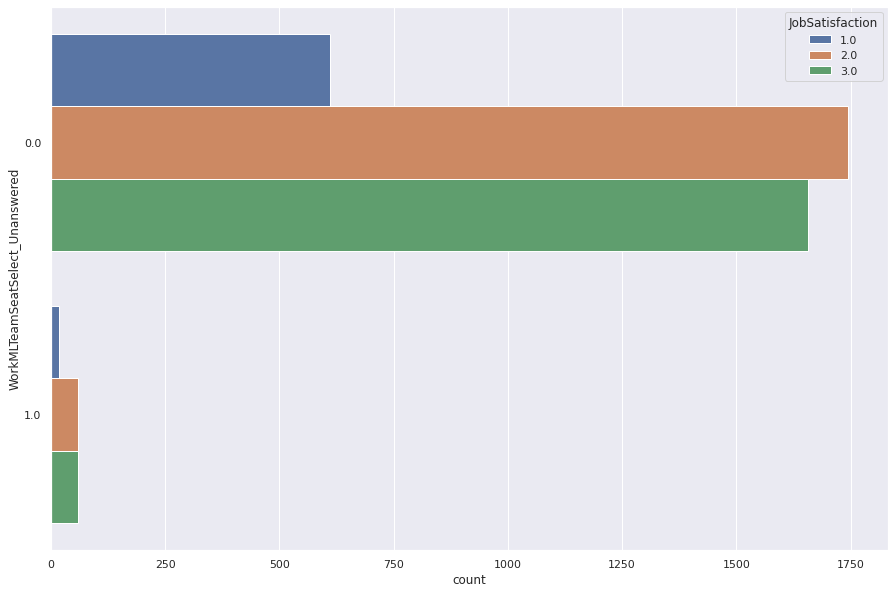

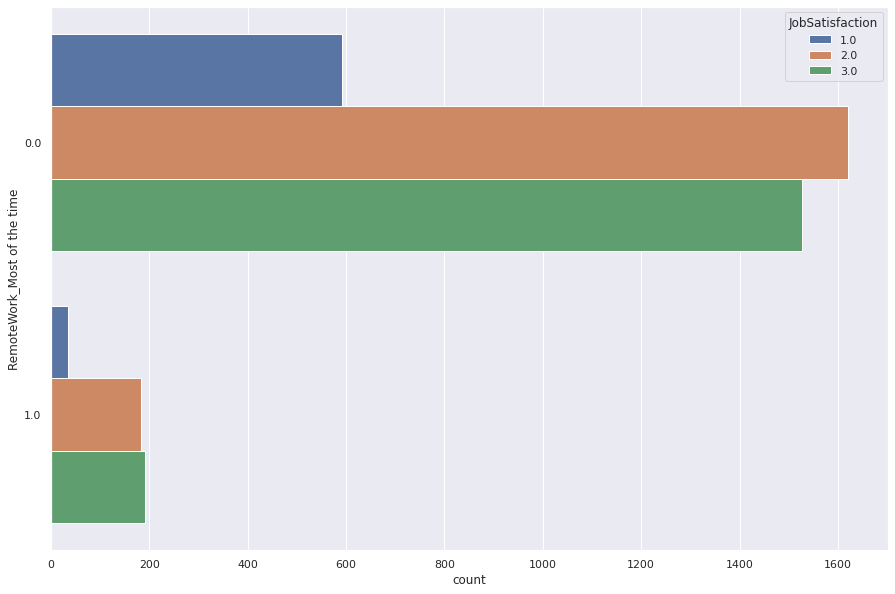

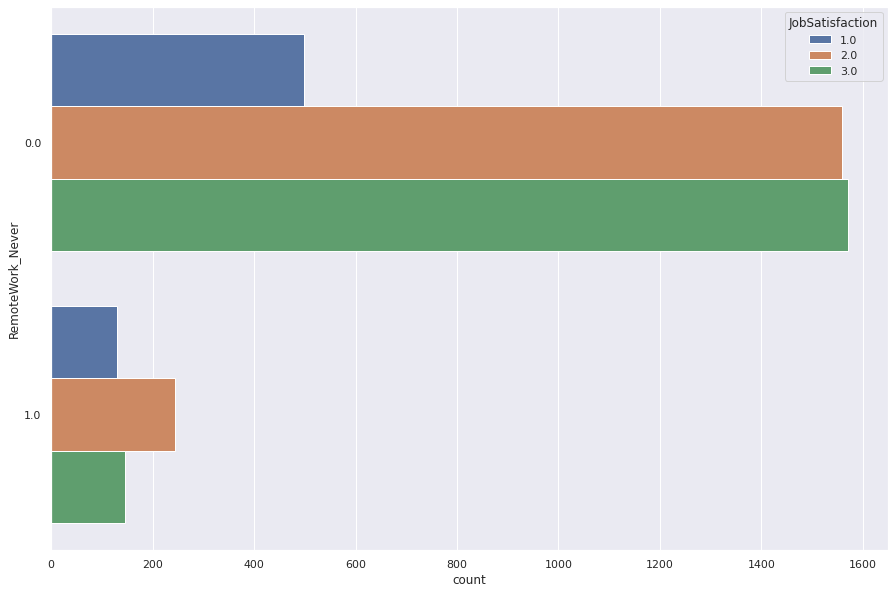

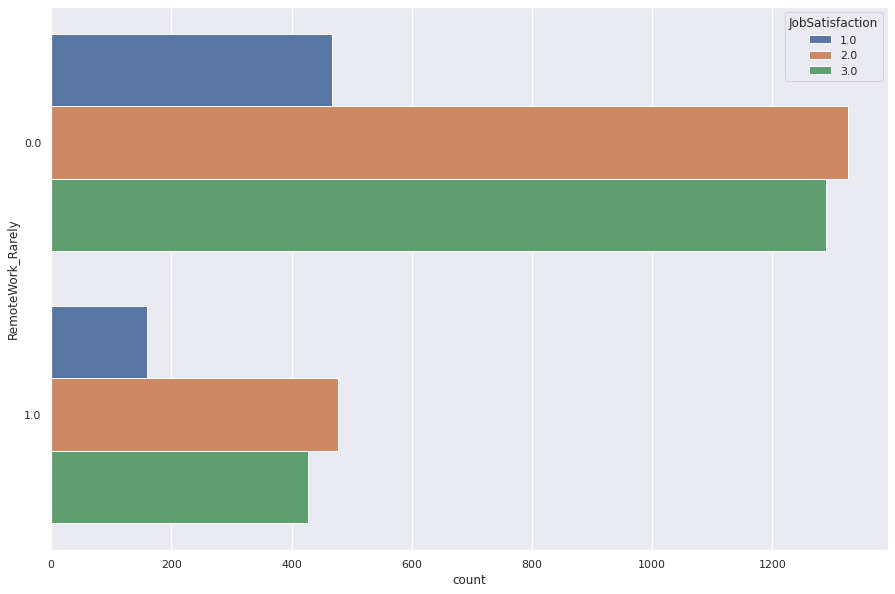

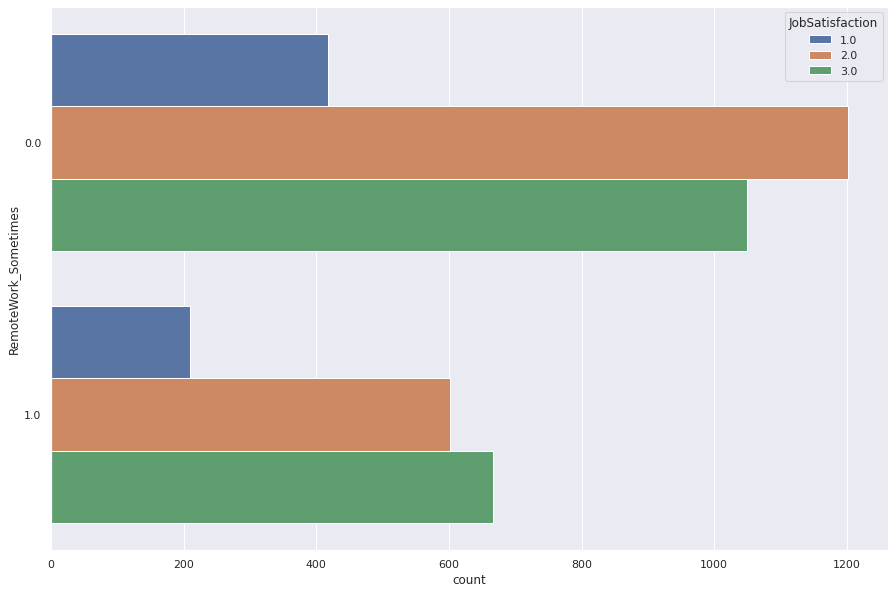

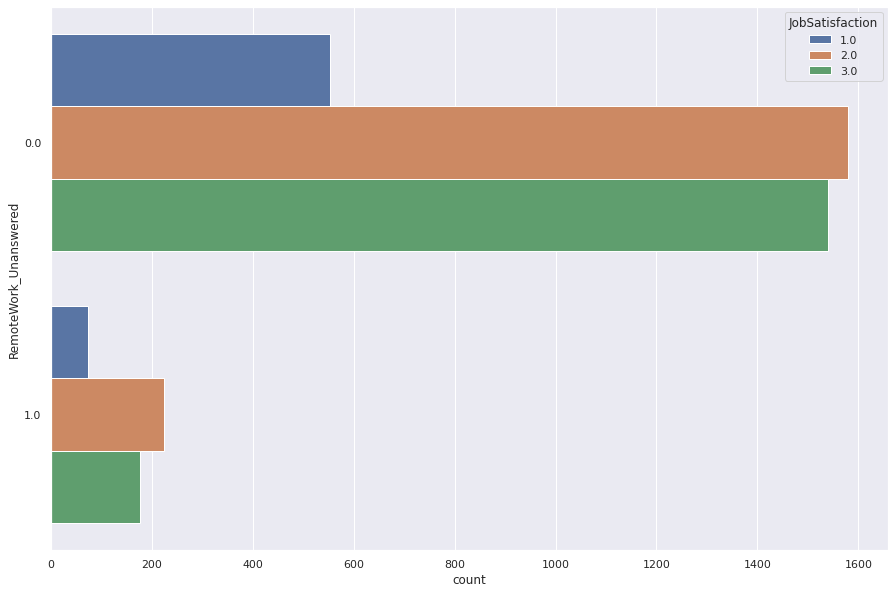

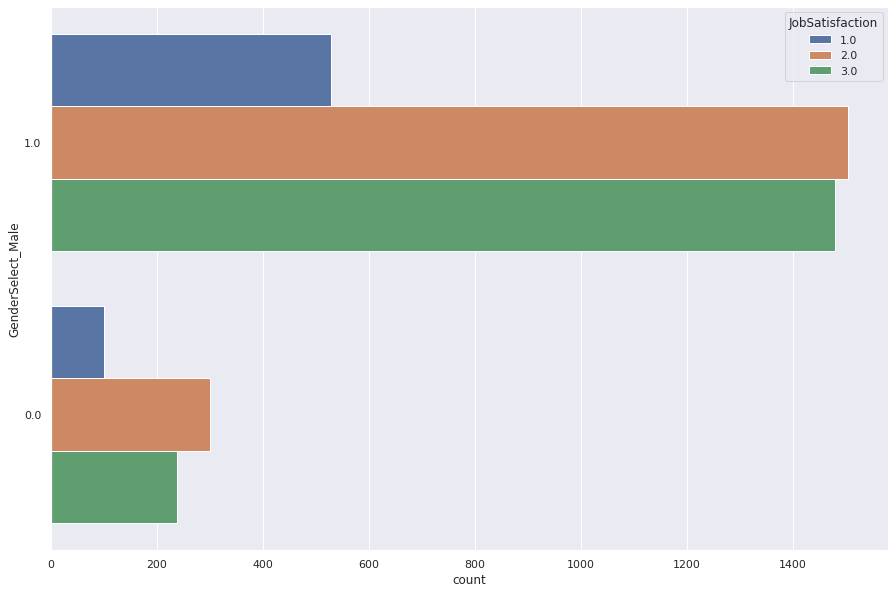

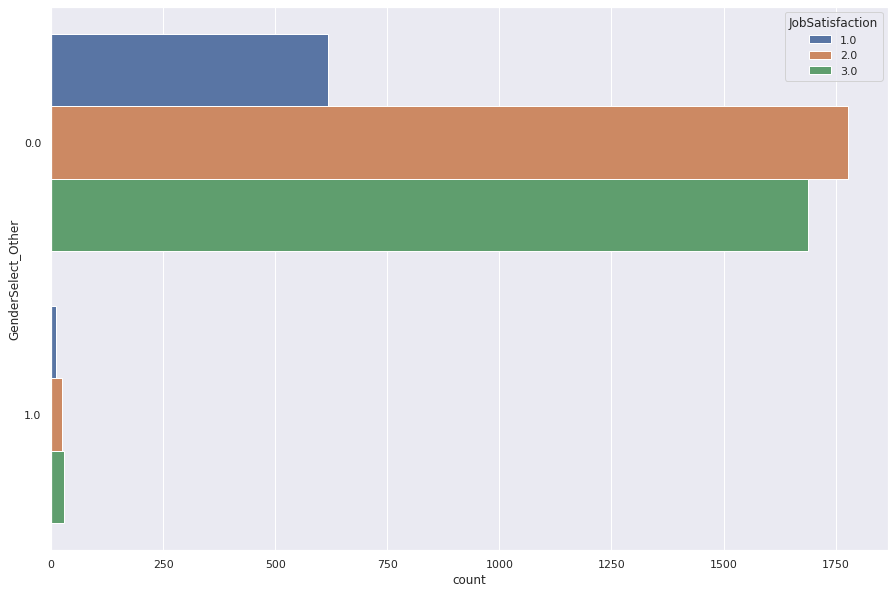

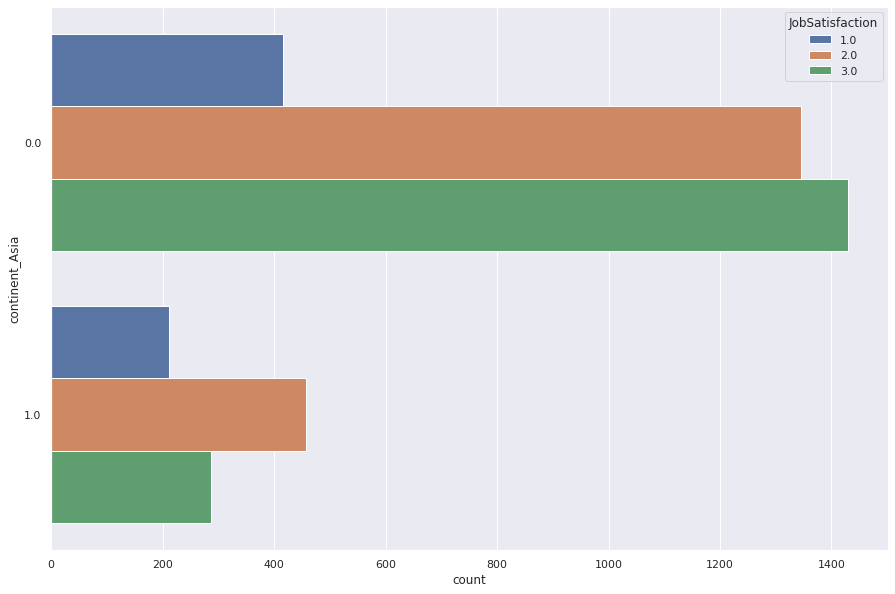

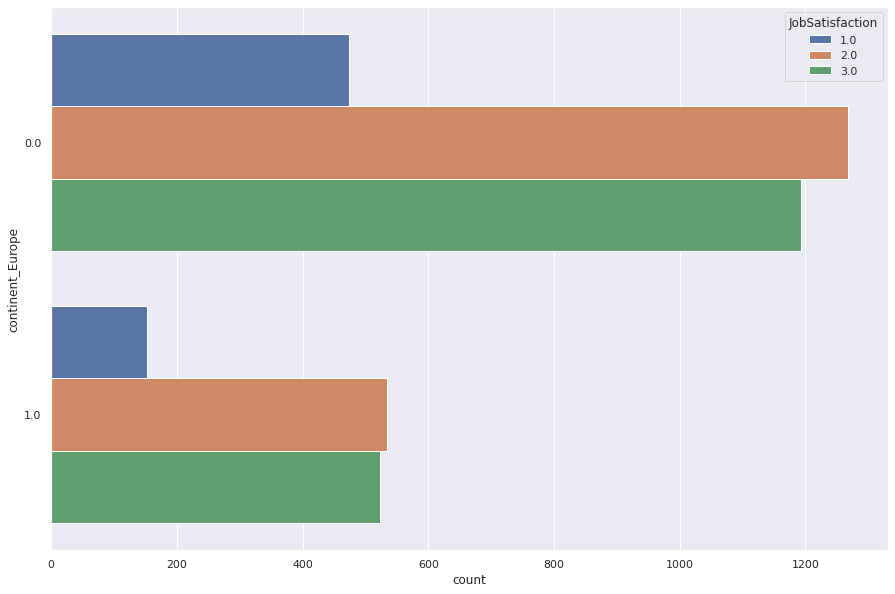

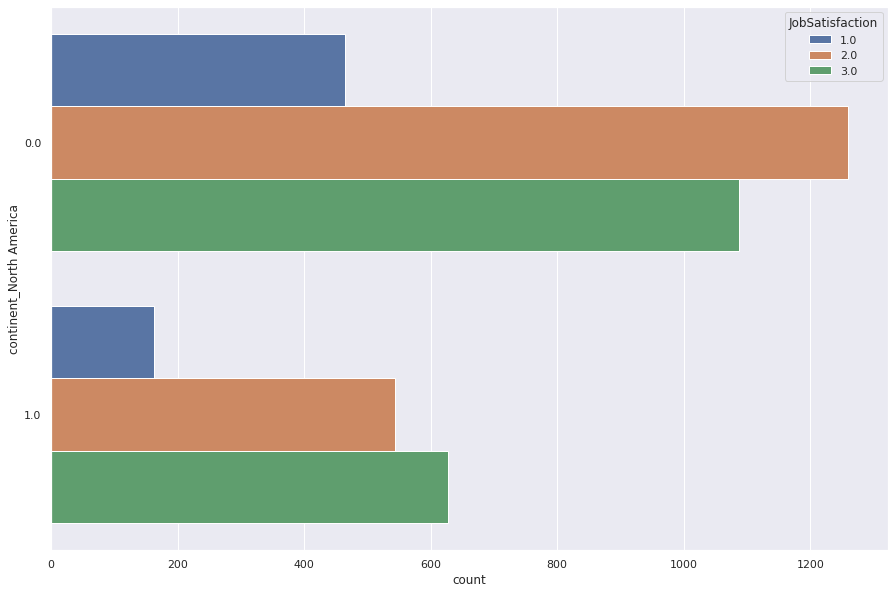

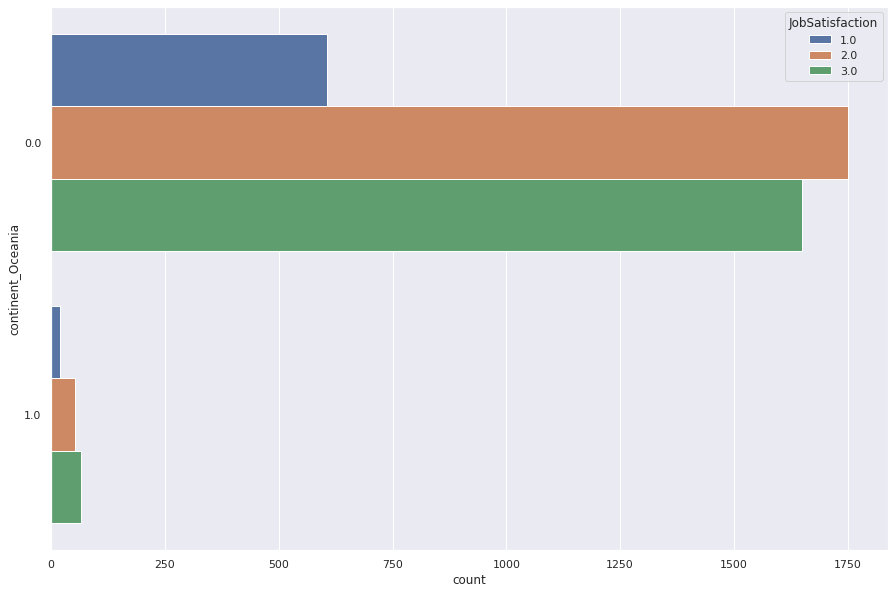

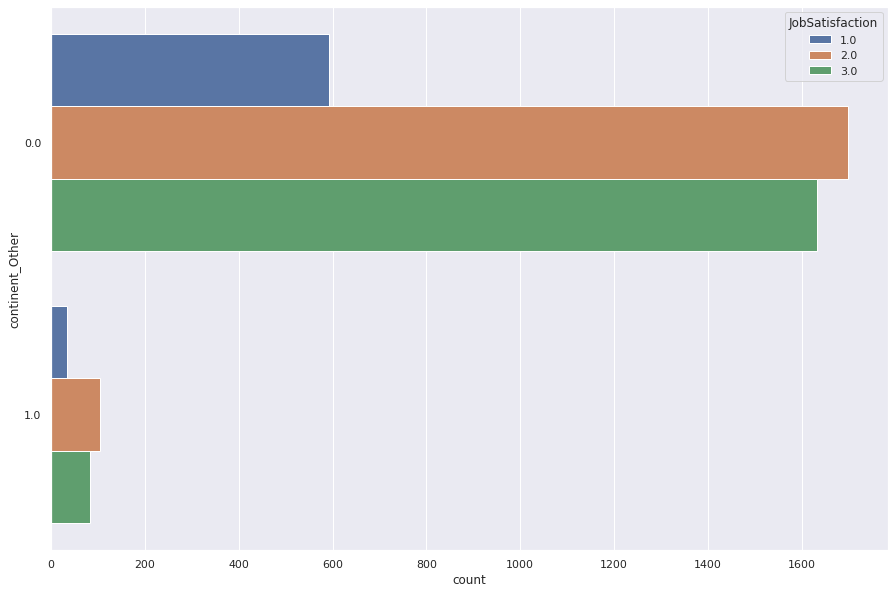

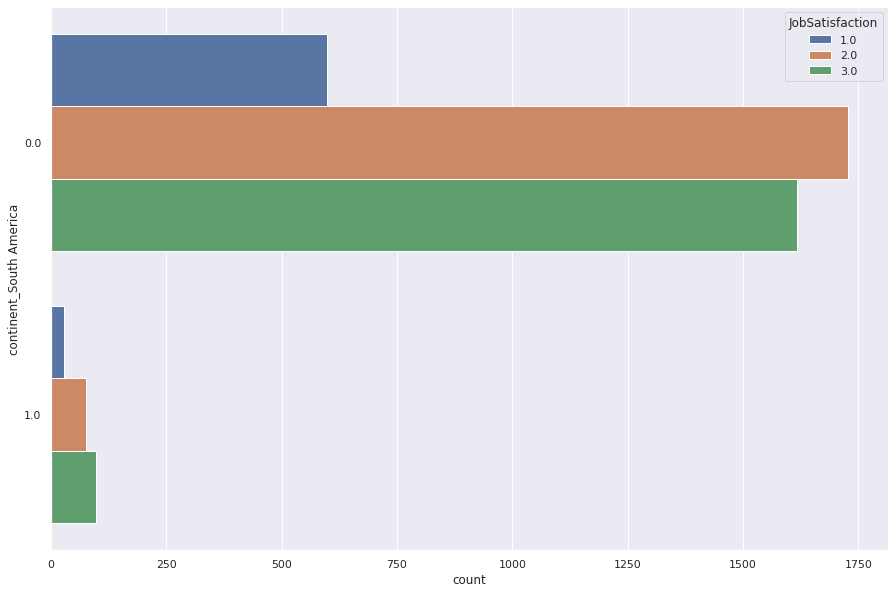

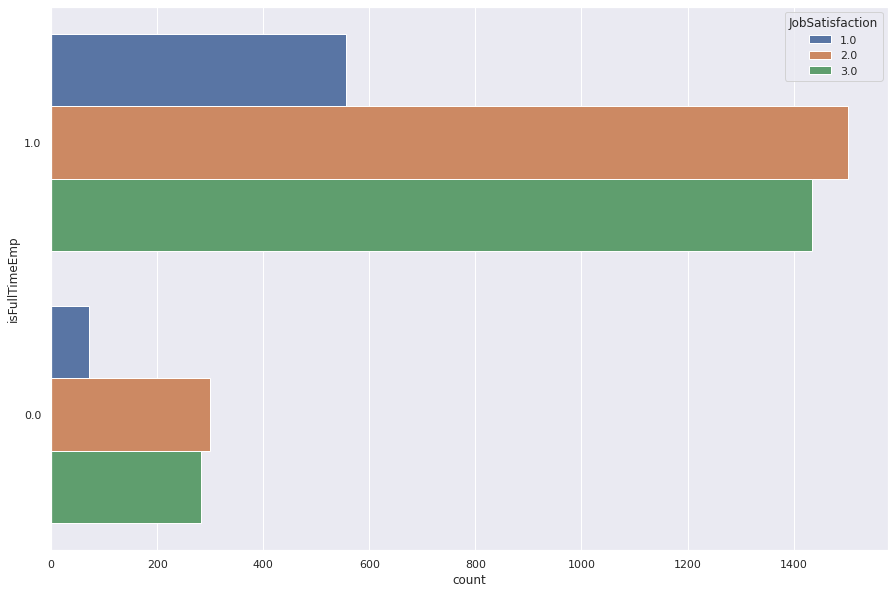

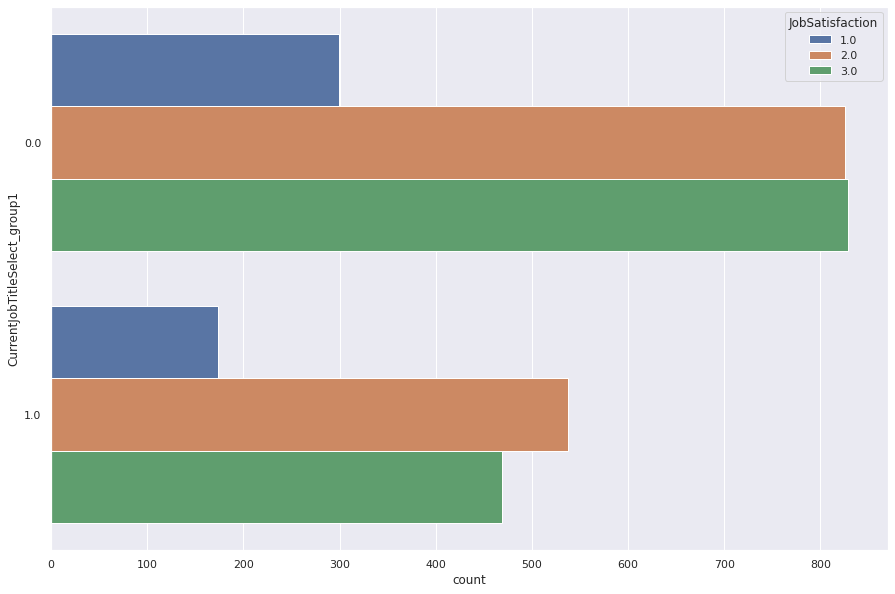

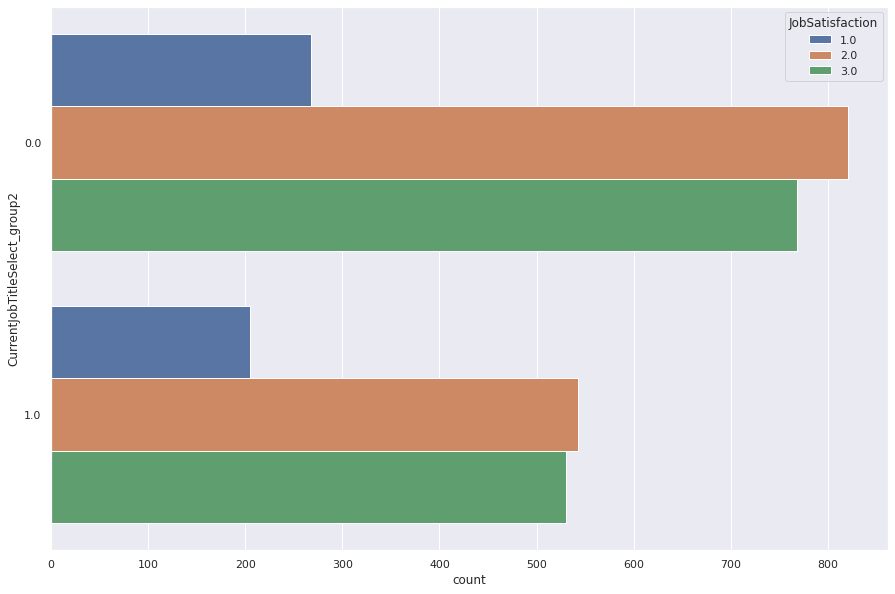

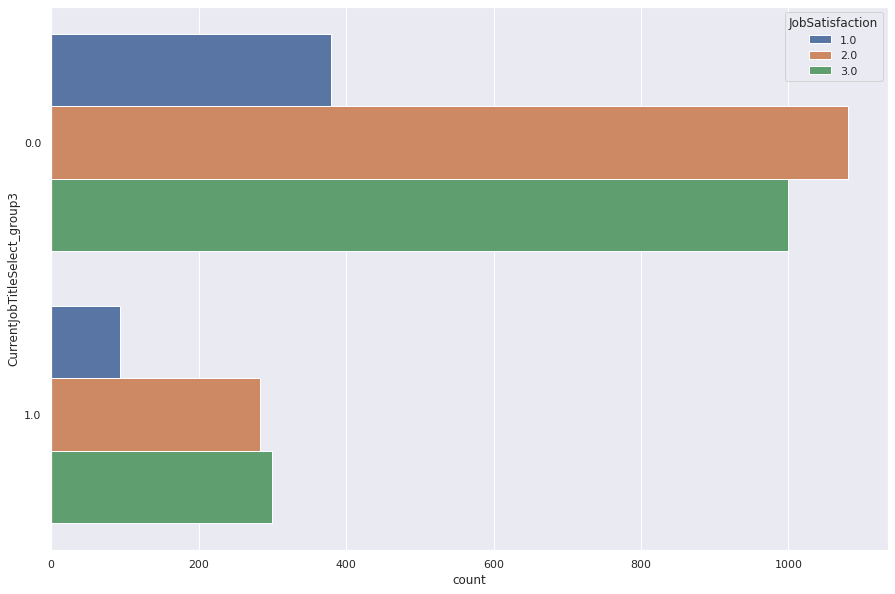

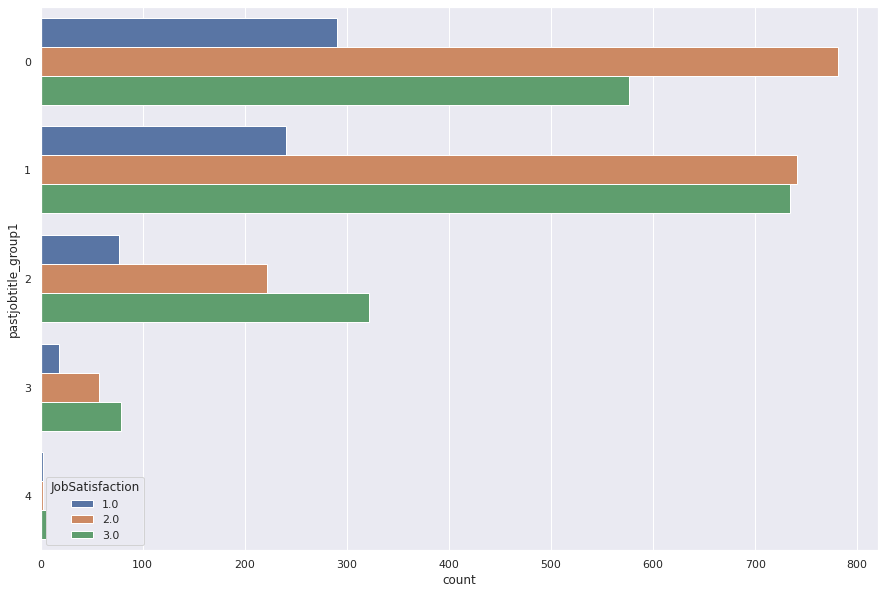

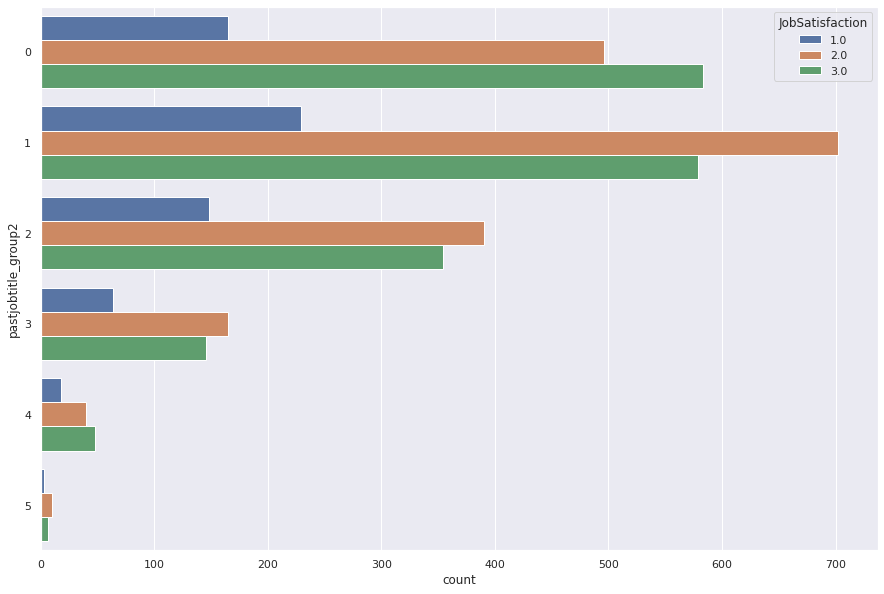

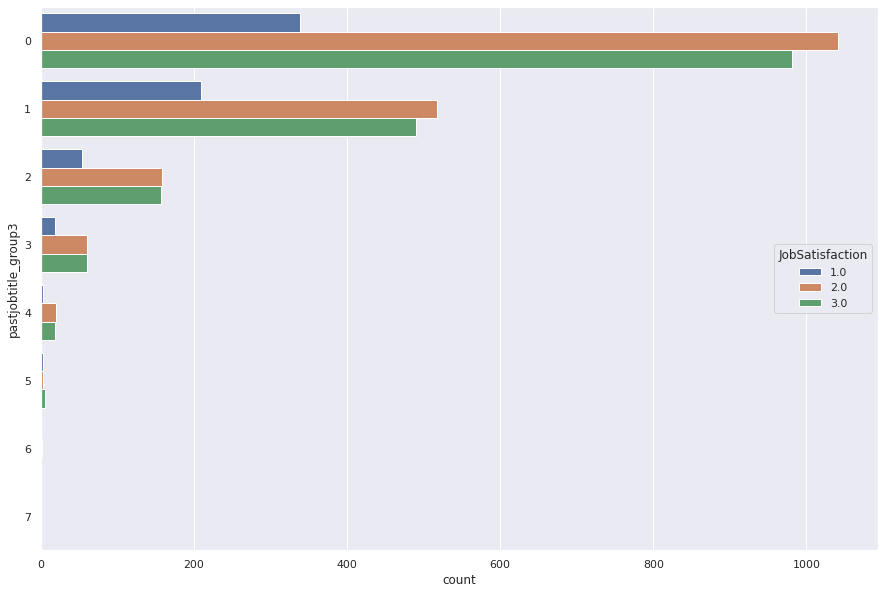

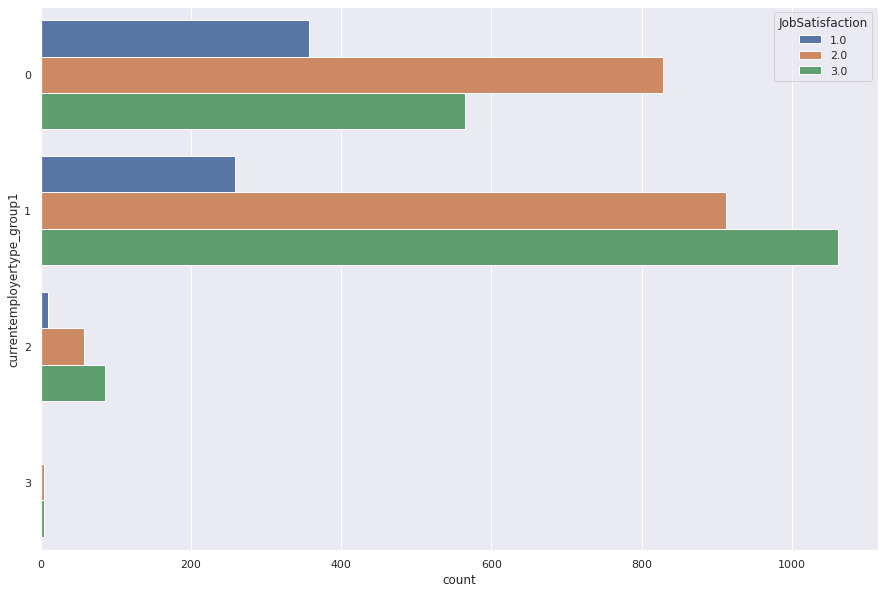

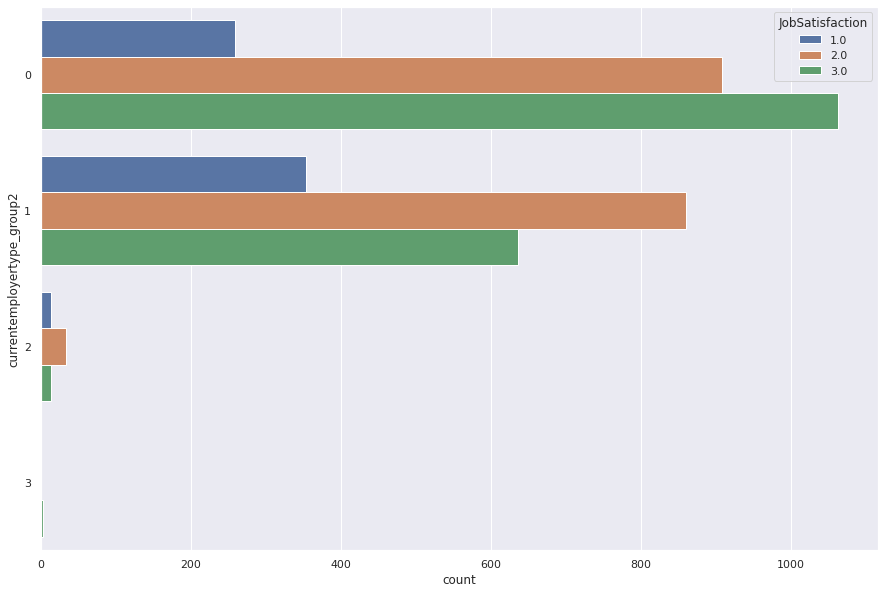

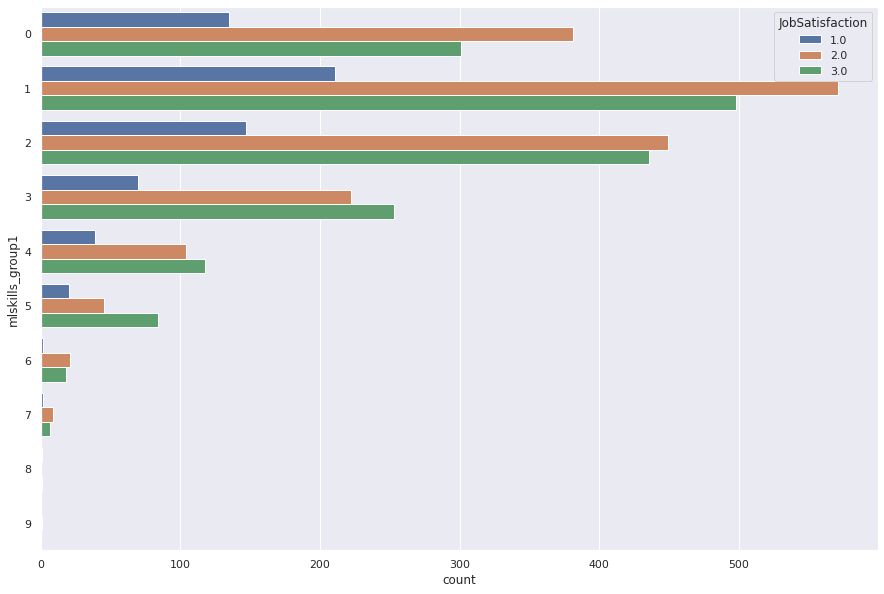

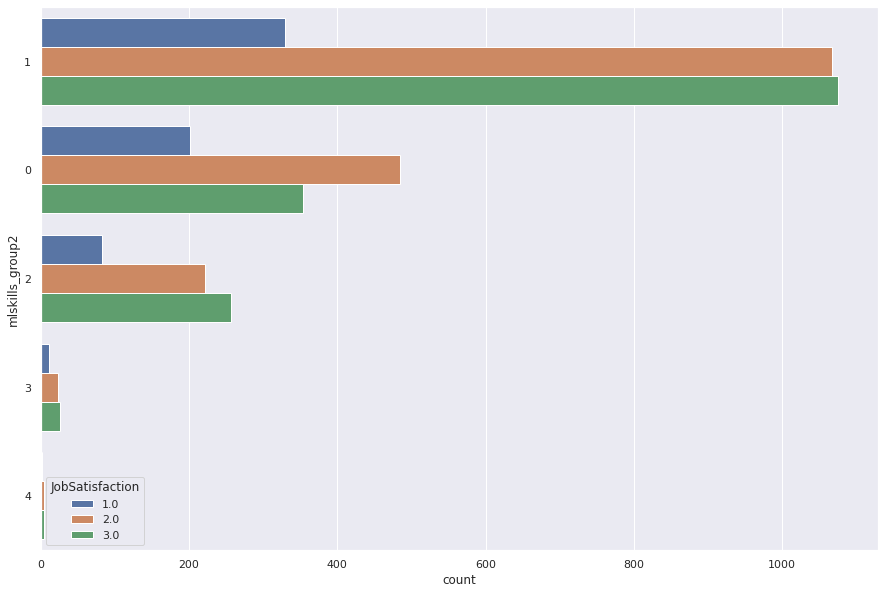

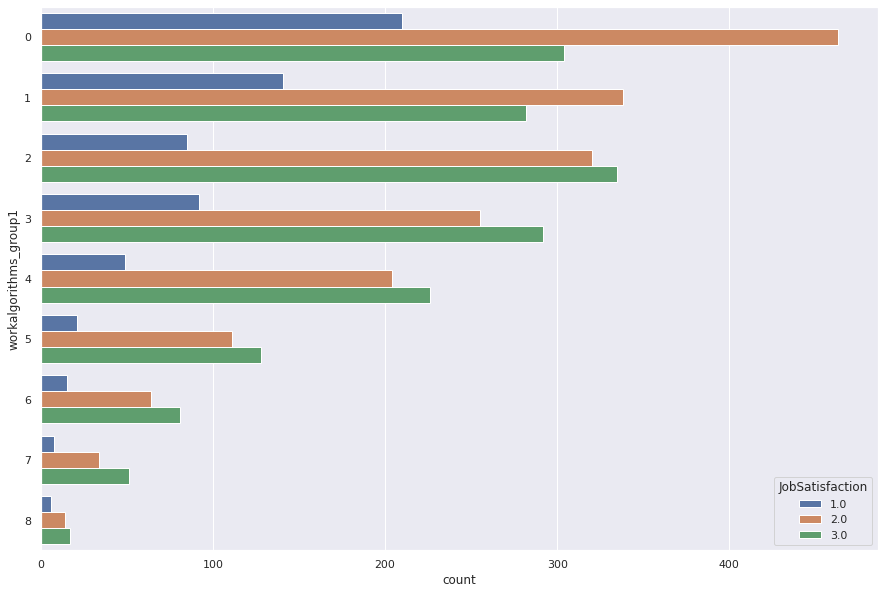

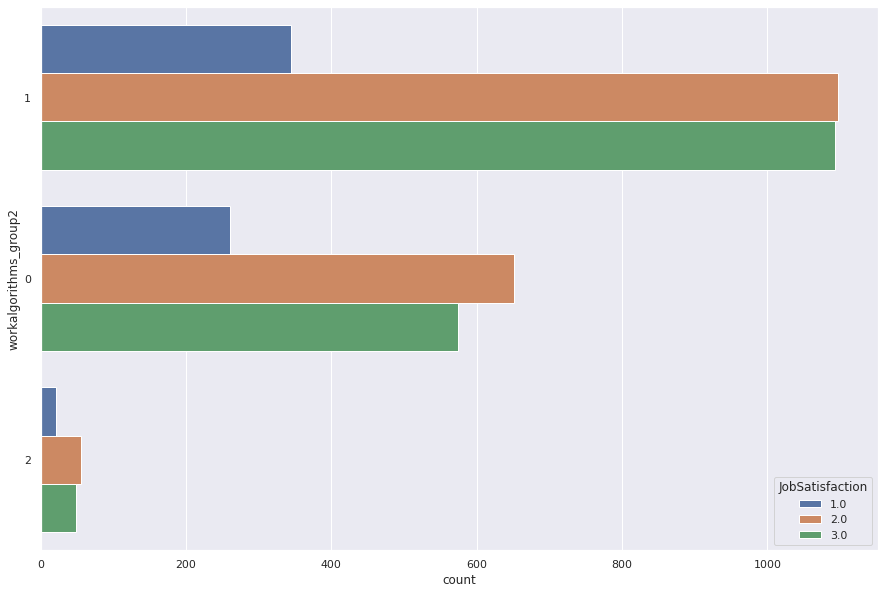

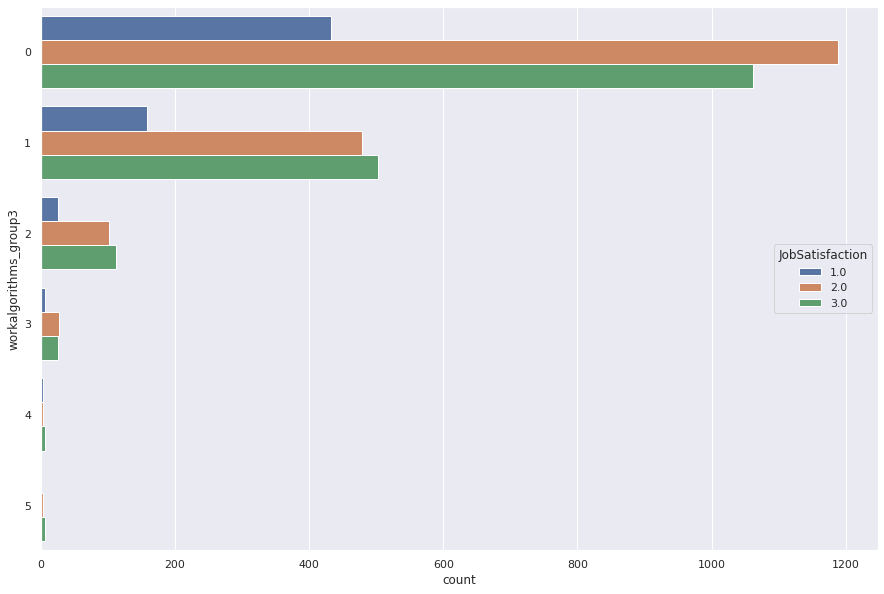

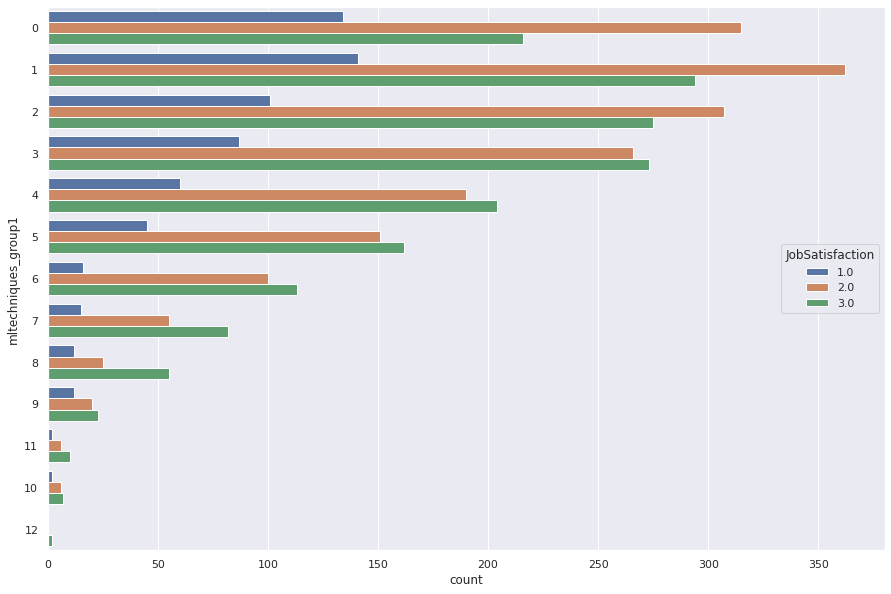

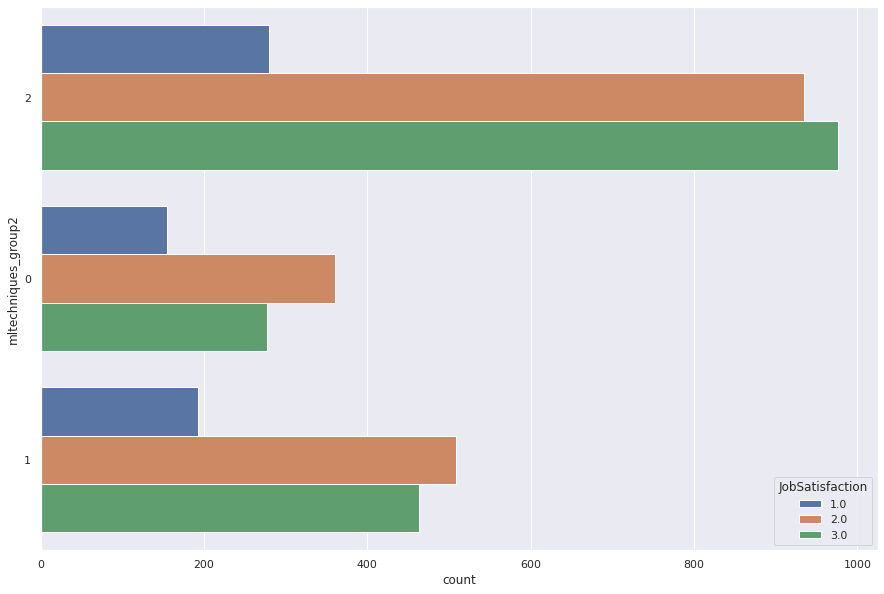

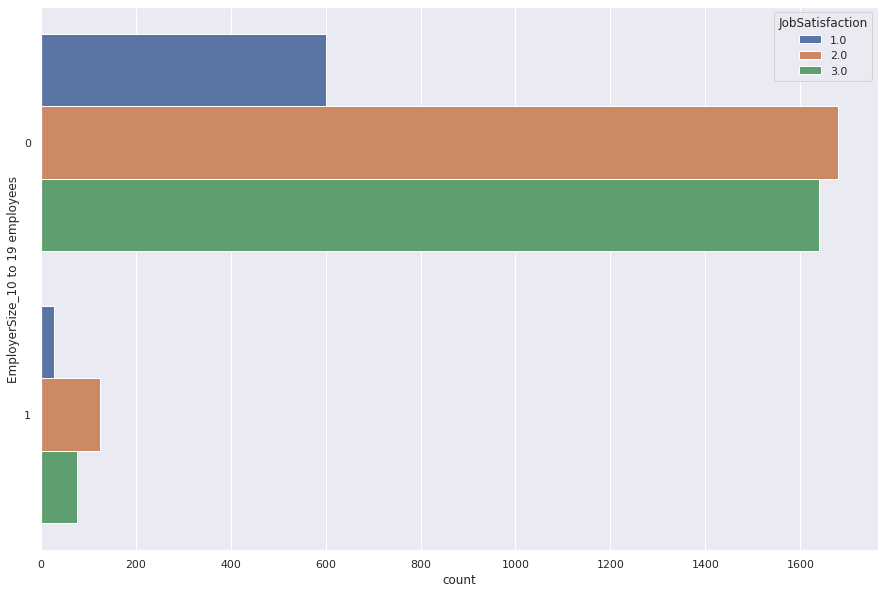

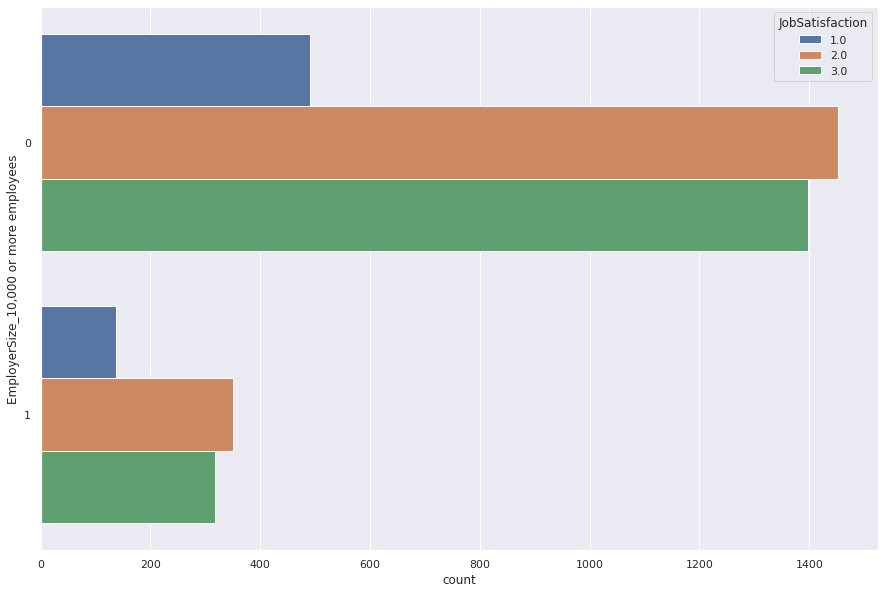

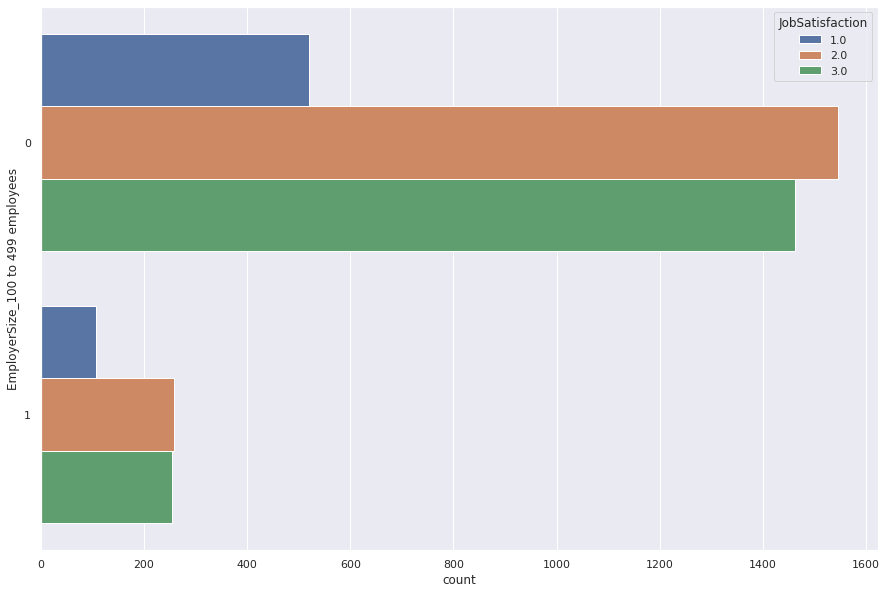

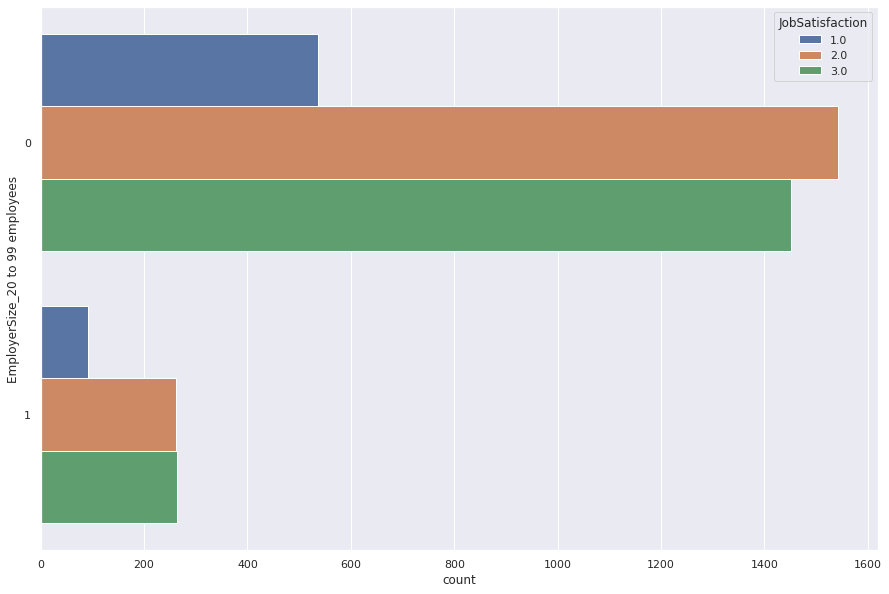

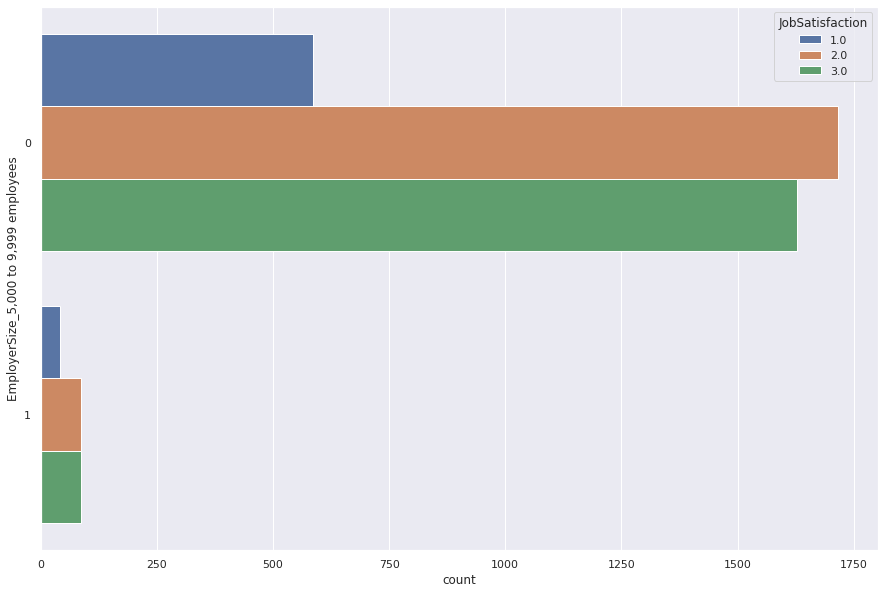

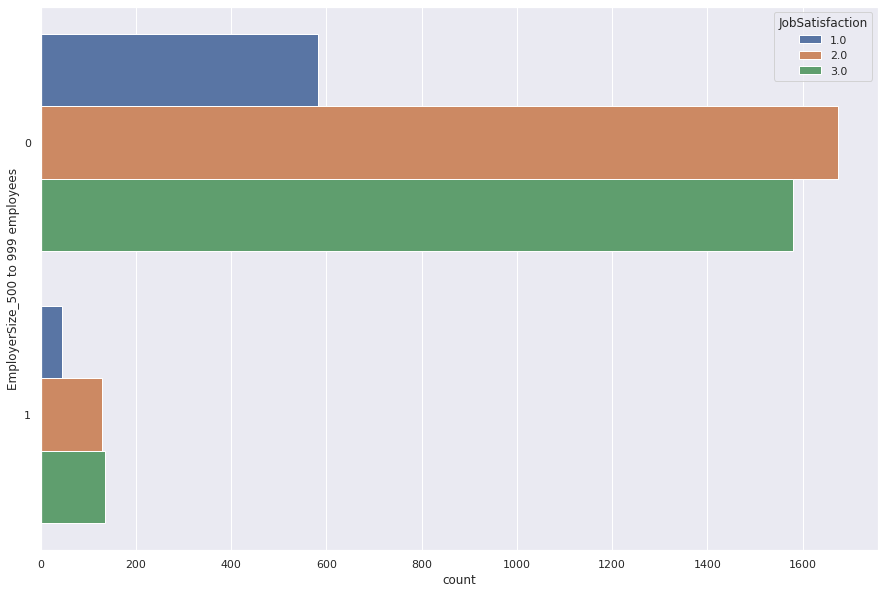

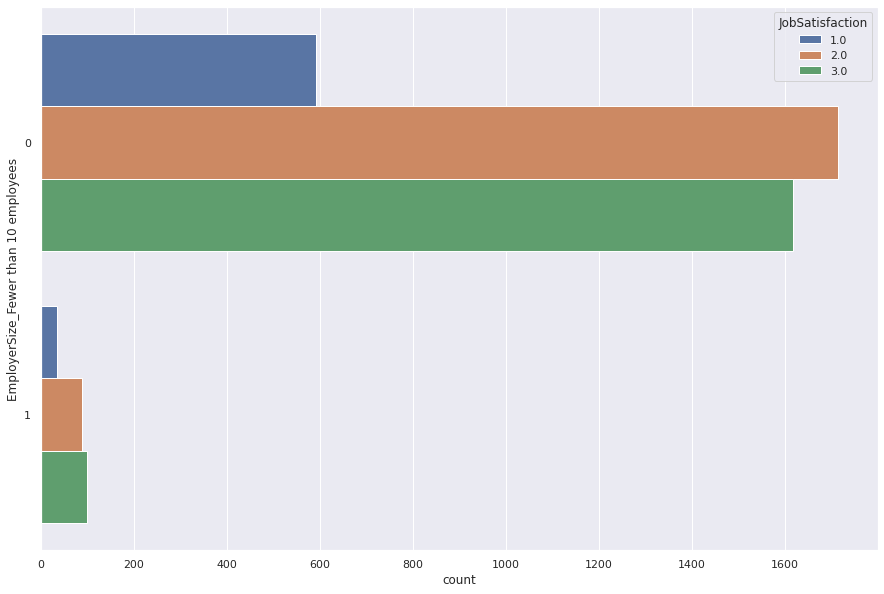

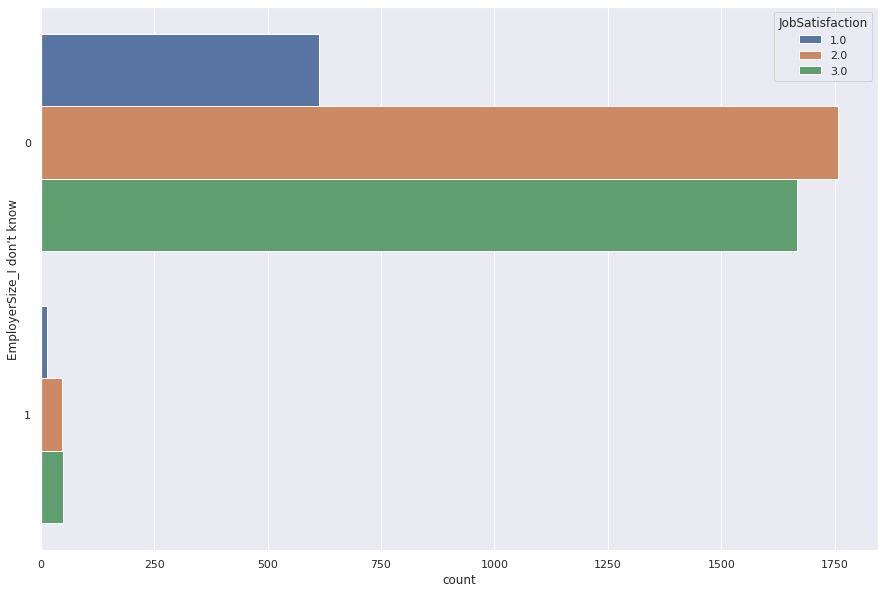

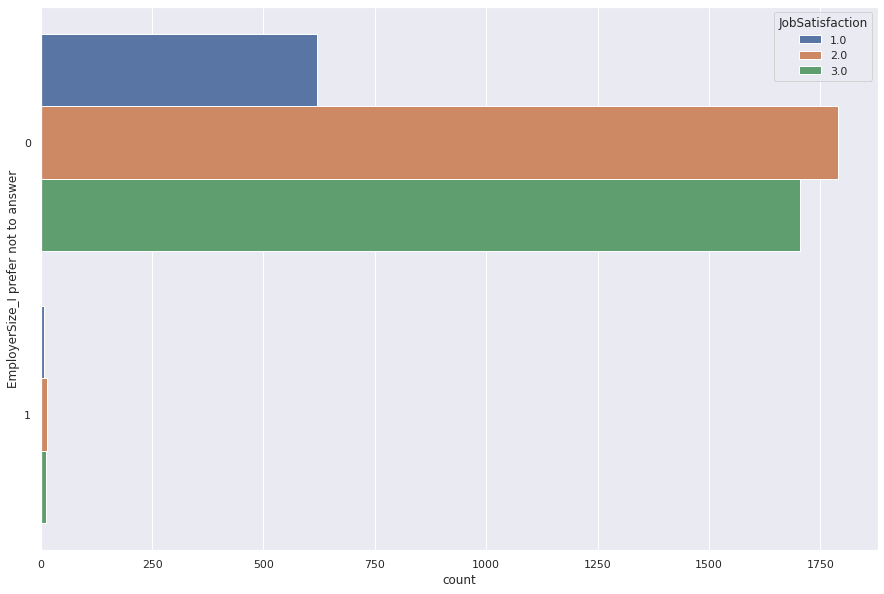

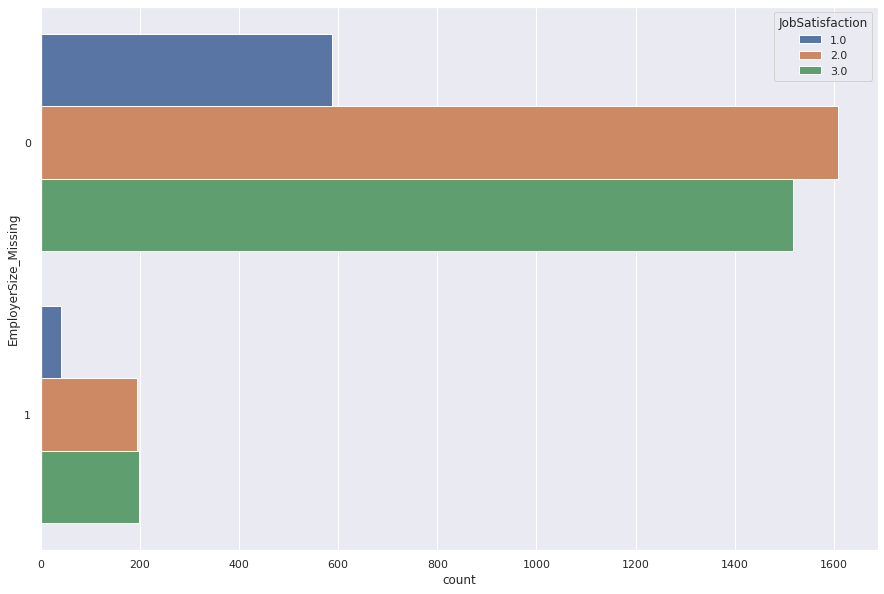

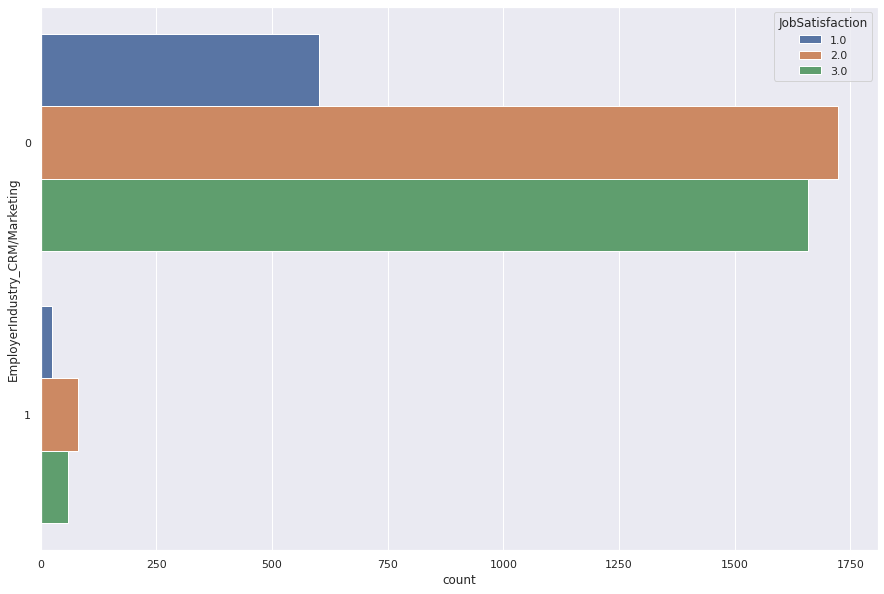

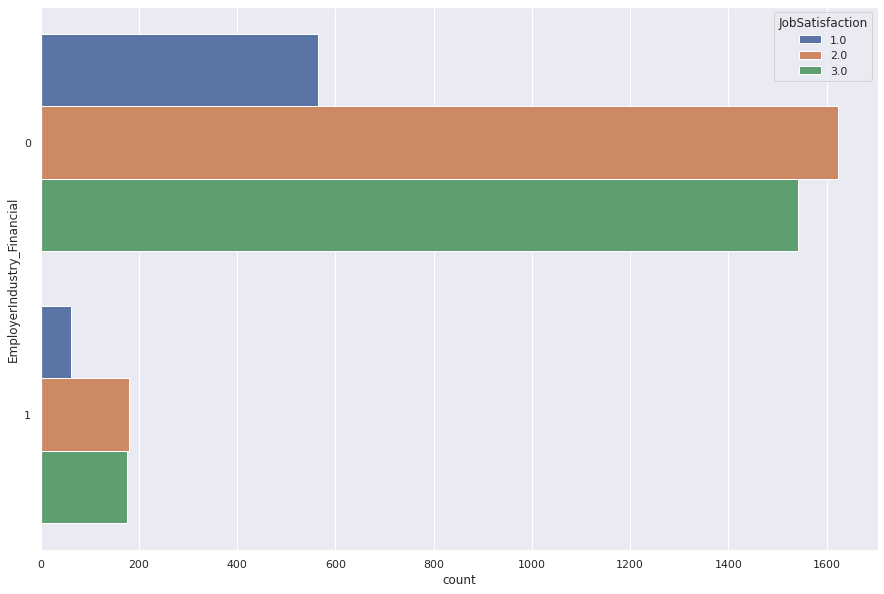

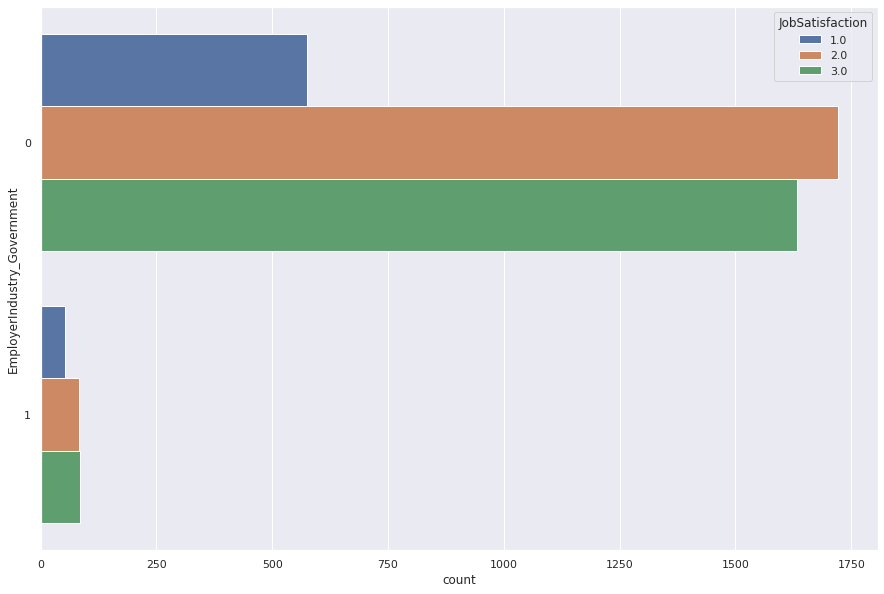

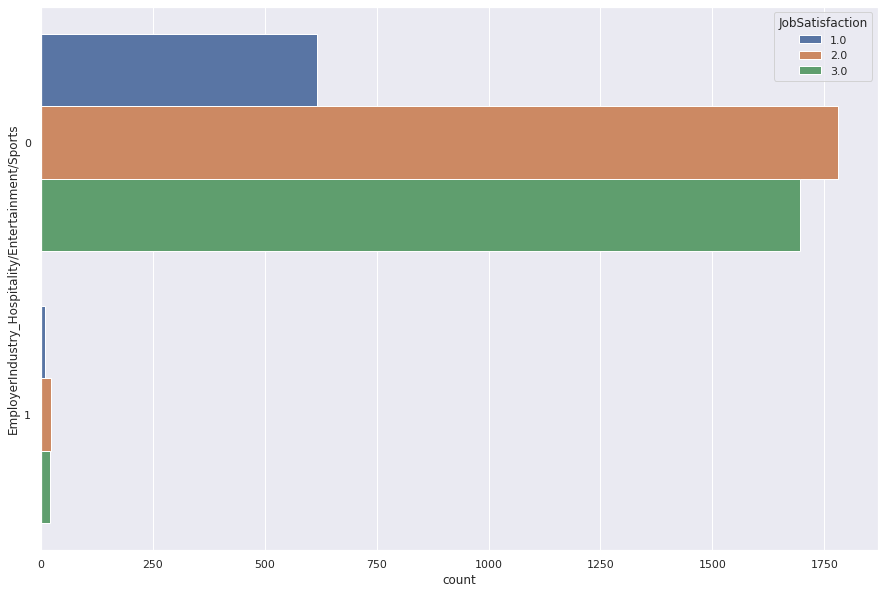

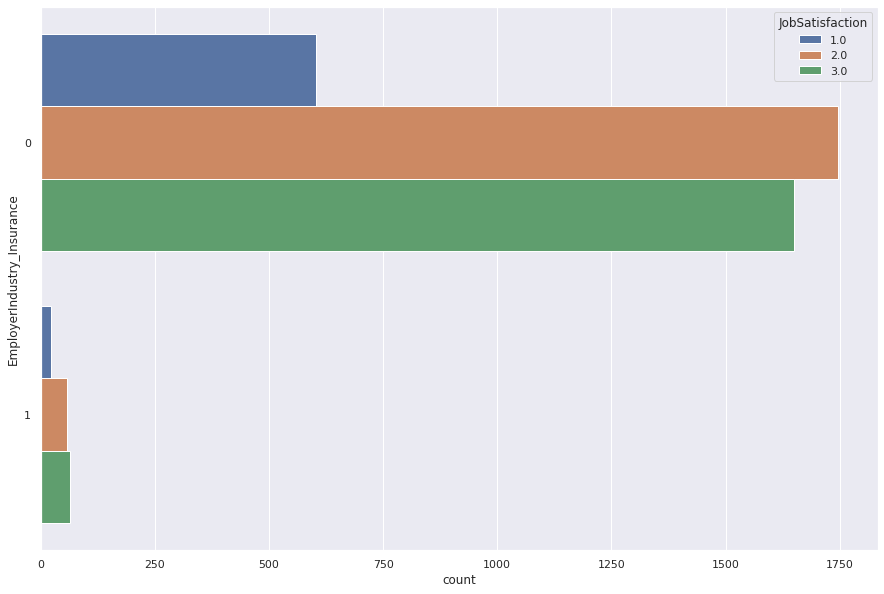

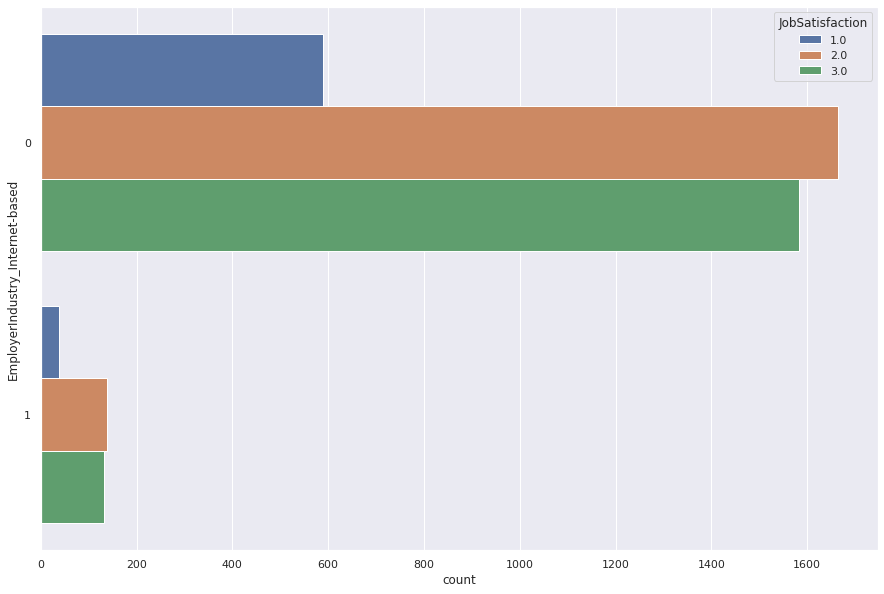

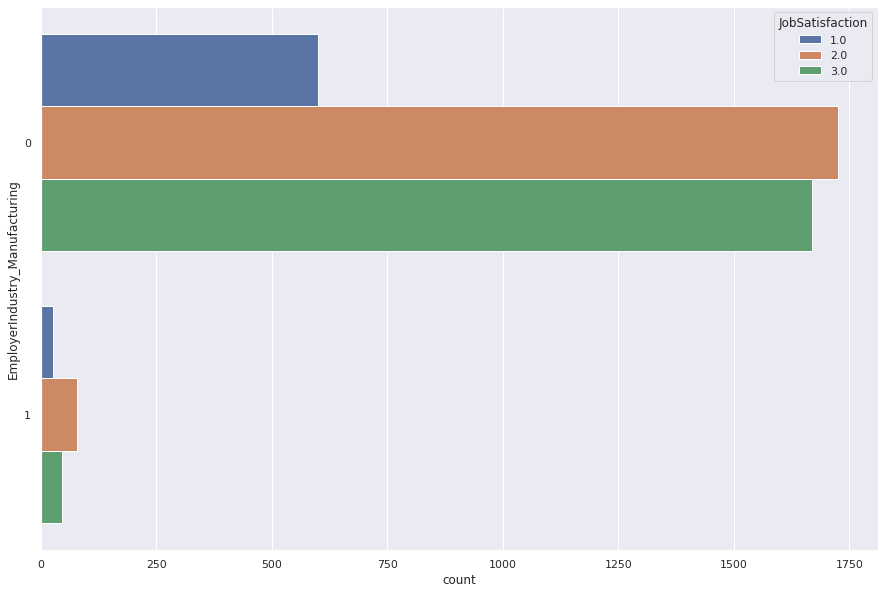

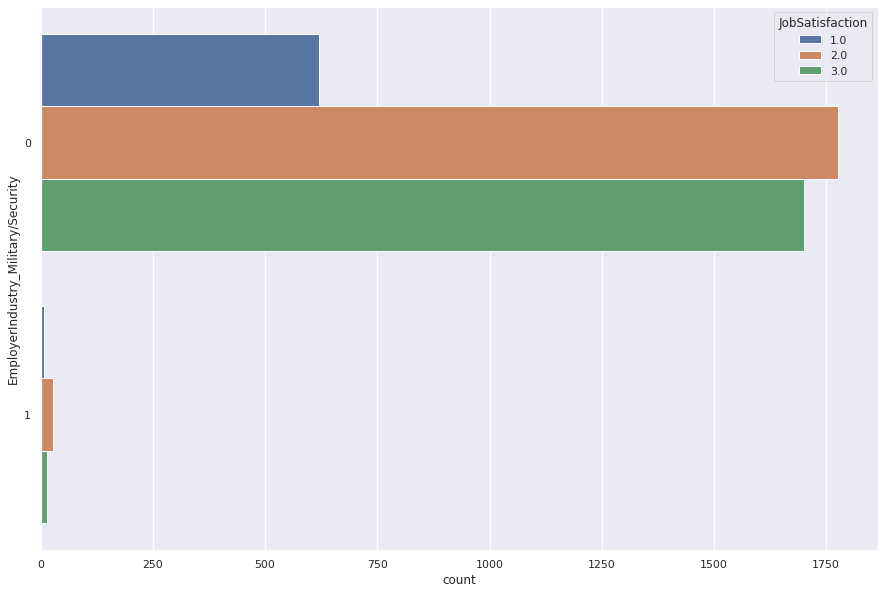

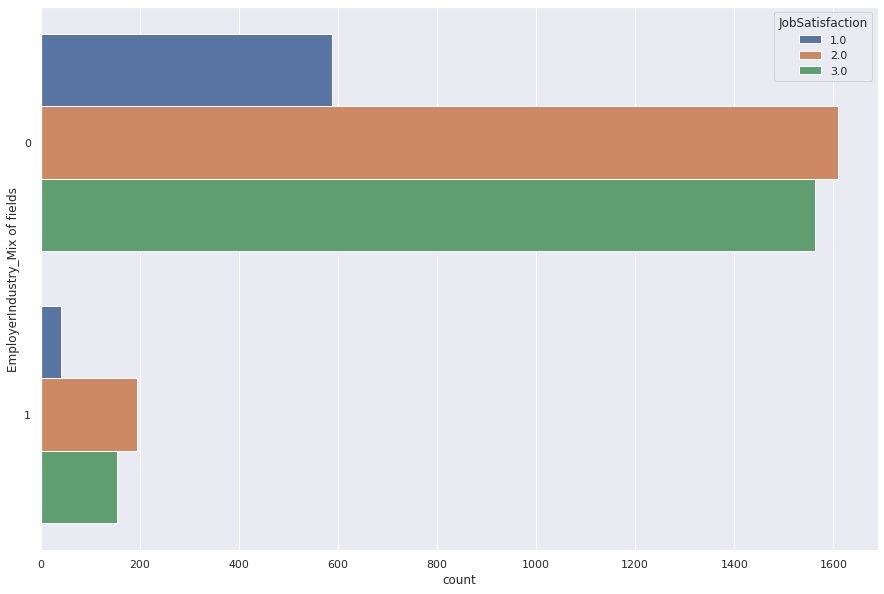

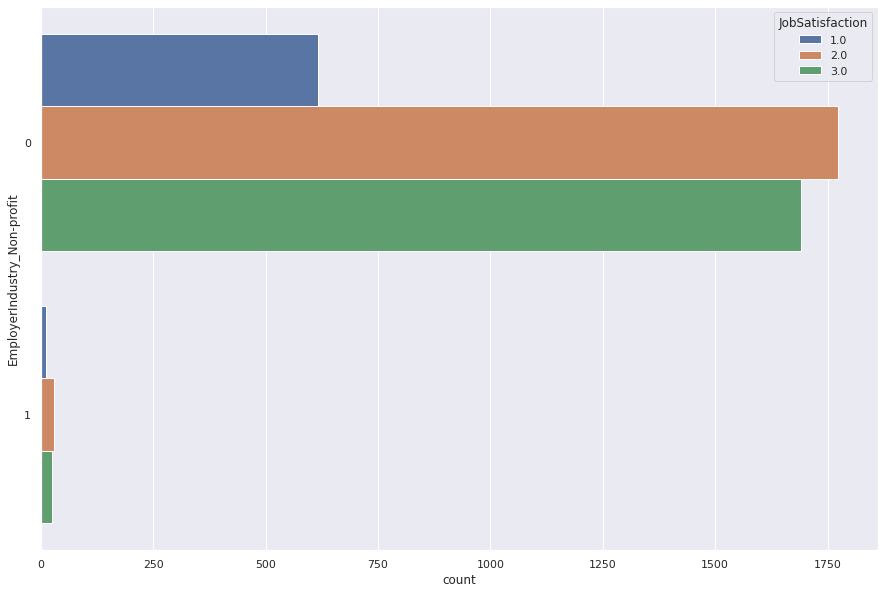

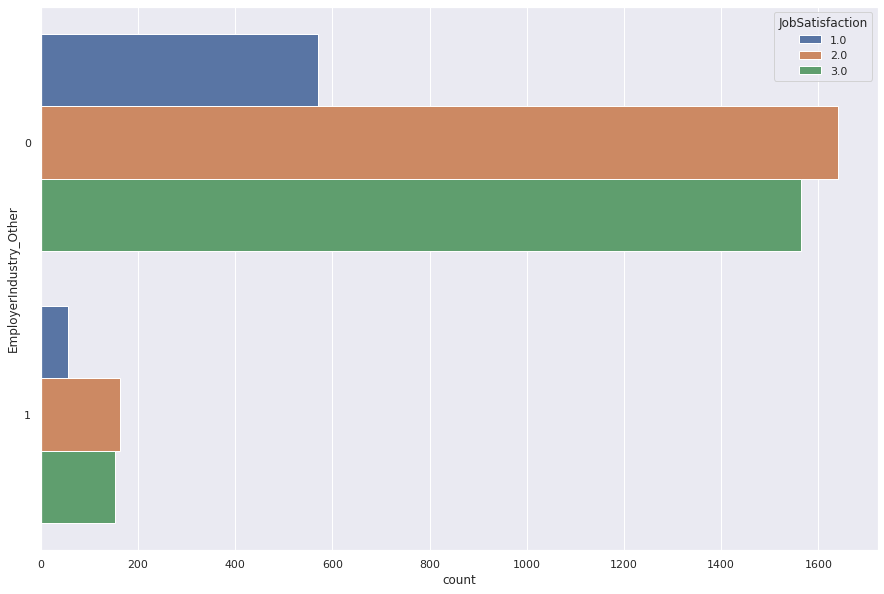

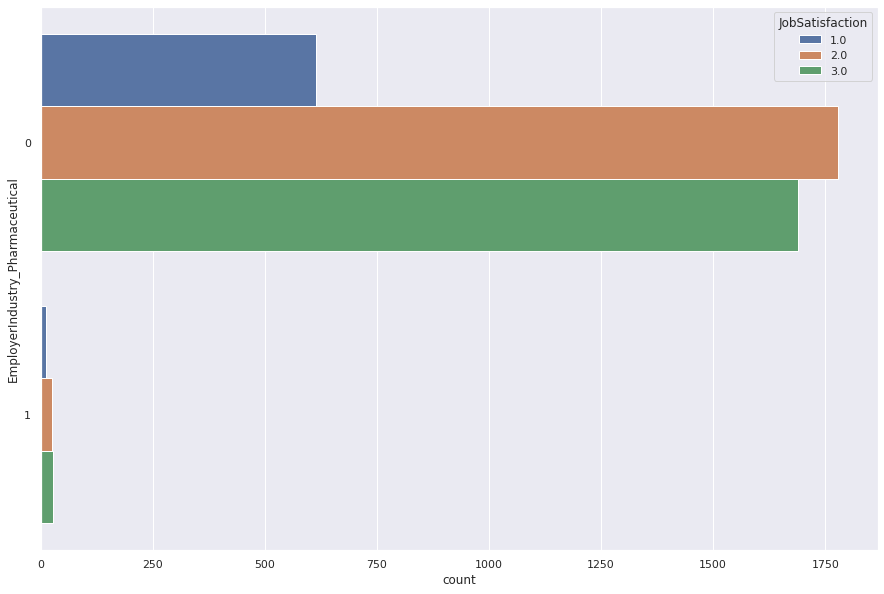

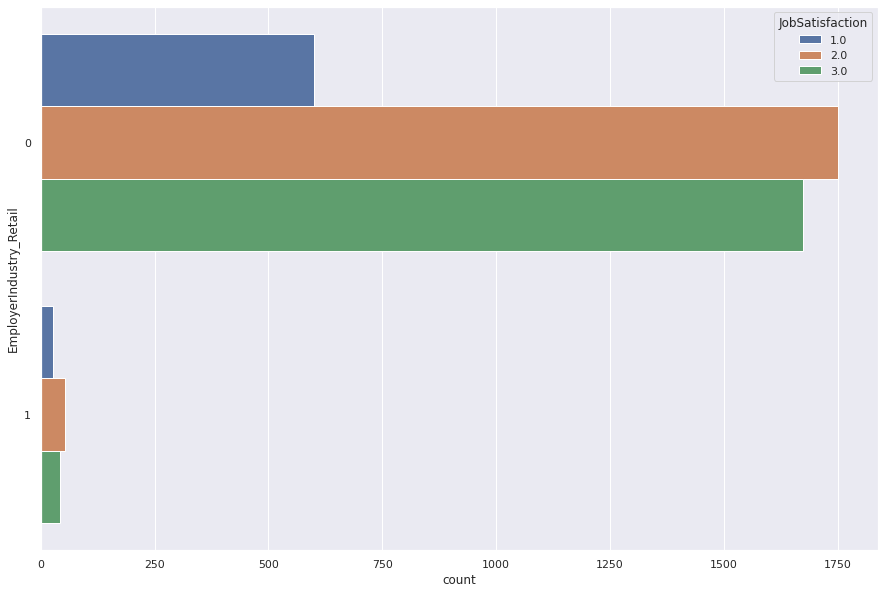

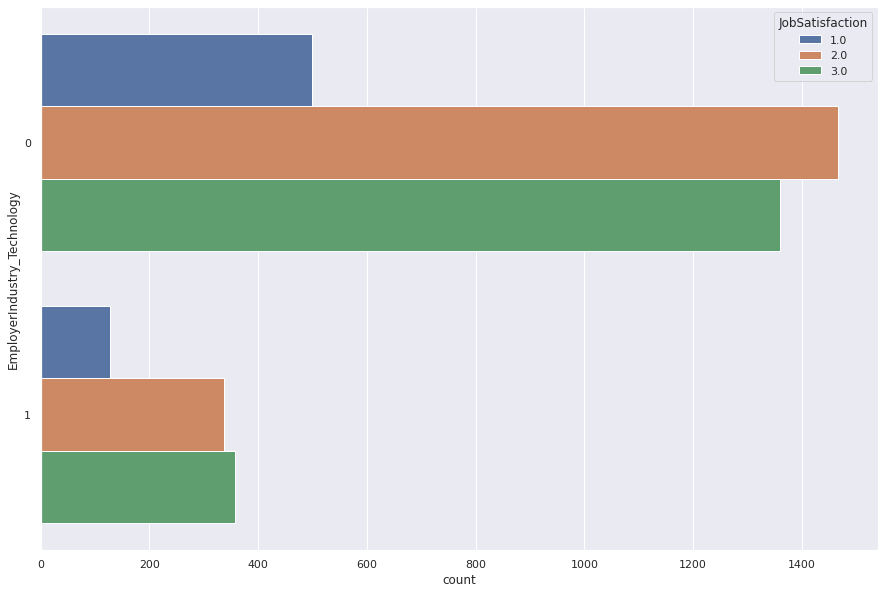

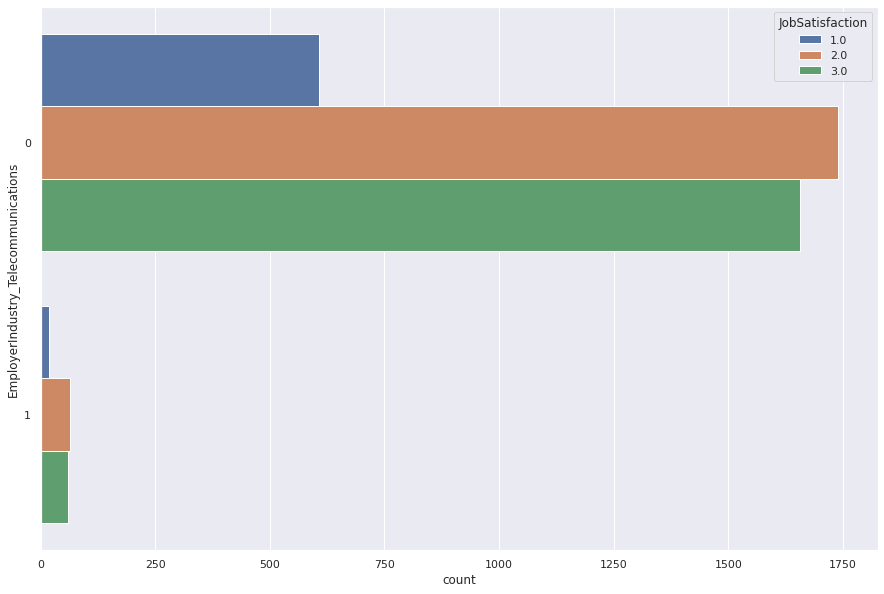

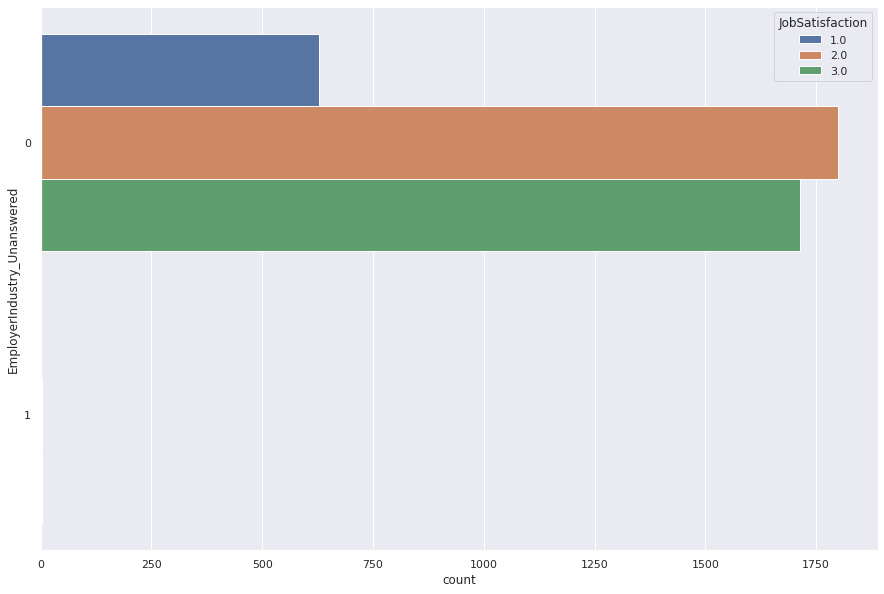

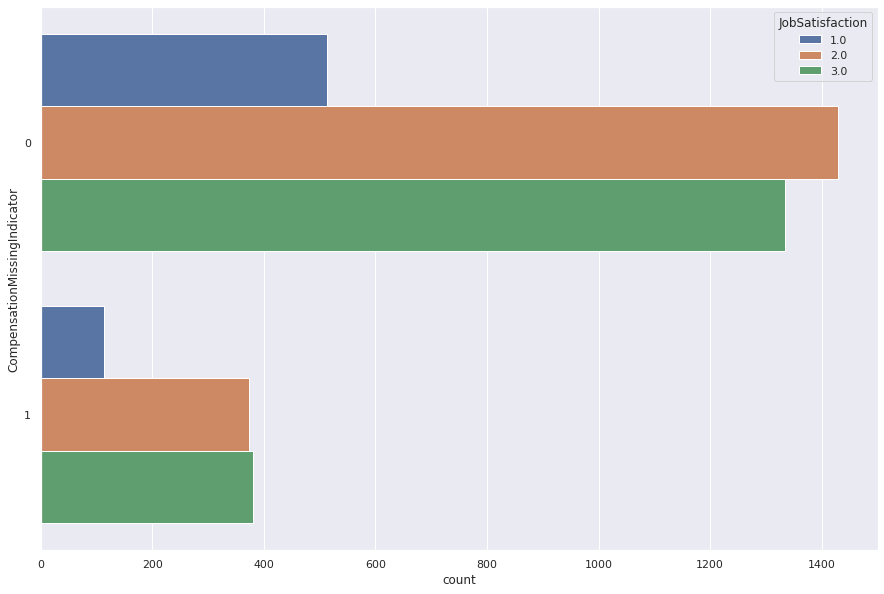

In [ ]:
skillist = list(result.columns)

for i in skillist:
  plt.figure(figsize=(15,10))
  sns.countplot(y=i, hue="JobSatisfaction", data=result, order=result[i].value_counts().iloc[:len(result[i])].index)


We checked the features' relationships with the target level in the above charts. Based on the information we had above we generated features in the following steps.

In [ ]:
num_cols, binary_cols, ordinal_cols, multi_categoric_cols  = [], [], [], []

for col in result.drop('JobSatisfaction', axis=1).columns:
  if result[col].nunique() > 13 and result[col].dtype != 'O':
    num_cols.append(col)
  elif result[col].nunique() <= 2:
    binary_cols.append(col)
  elif result[col].nunique() > 2 and result[col].nunique() <= 13:
    ordinal_cols.append(col)
  else:
    multi_categoric_cols.append(col)

**Correlation of Continuous Features**

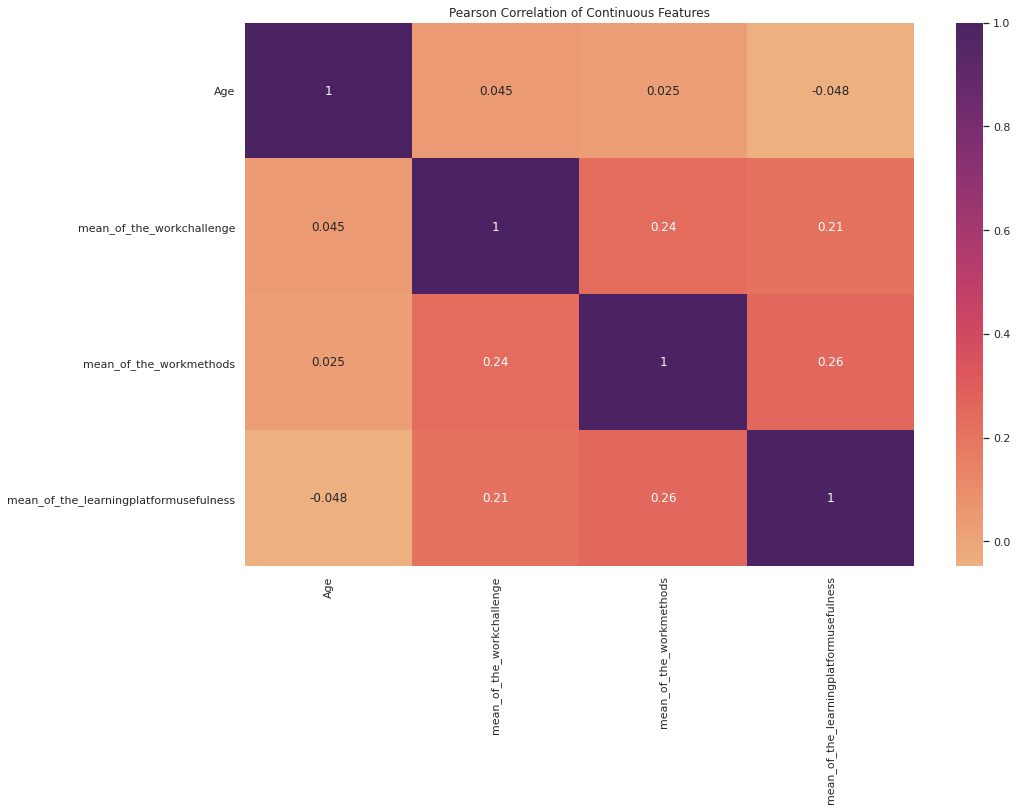

In [ ]:
#continuous
plt.figure(figsize=(15,10))
sns.heatmap(result[num_cols].corr(),cmap="flare", annot=True)
plt.title("Pearson Correlation of Continuous Features");

There is no highly correlated continuous feature among themselves

**Spearman Correlation of Continuous Features with the Target**

In [ ]:
selection_threshold = 0.05
cont_var_corr_with_target = pd.DataFrame(result[num_cols + ['JobSatisfaction']].corr(method='spearman')['JobSatisfaction']).sort_values(by='JobSatisfaction', ascending=False).reset_index().rename(columns={"index": "Features"})
selected_continuous_features = cont_var_corr_with_target[(cont_var_corr_with_target.JobSatisfaction >= selection_threshold) | (cont_var_corr_with_target.JobSatisfaction <= -selection_threshold)]["Features"].tolist()[1:]
cont_var_corr_with_target

Features  JobSatisfaction
0                         JobSatisfaction         1.000000
1                 mean_of_the_workmethods         0.169169
2                                     Age         0.061270
3  mean_of_the_learningplatformusefulness         0.047625
4               mean_of_the_workchallenge        -0.119841

**Continuous Features having 5% Spearman correlation with the target:**

* mean_of_the_workmethods
* WorkDataVisualizationsbinned
* mean_of_WorkTools
* Age
* mean_of_the_workchallenge

**Correlation of Ordinal Features**

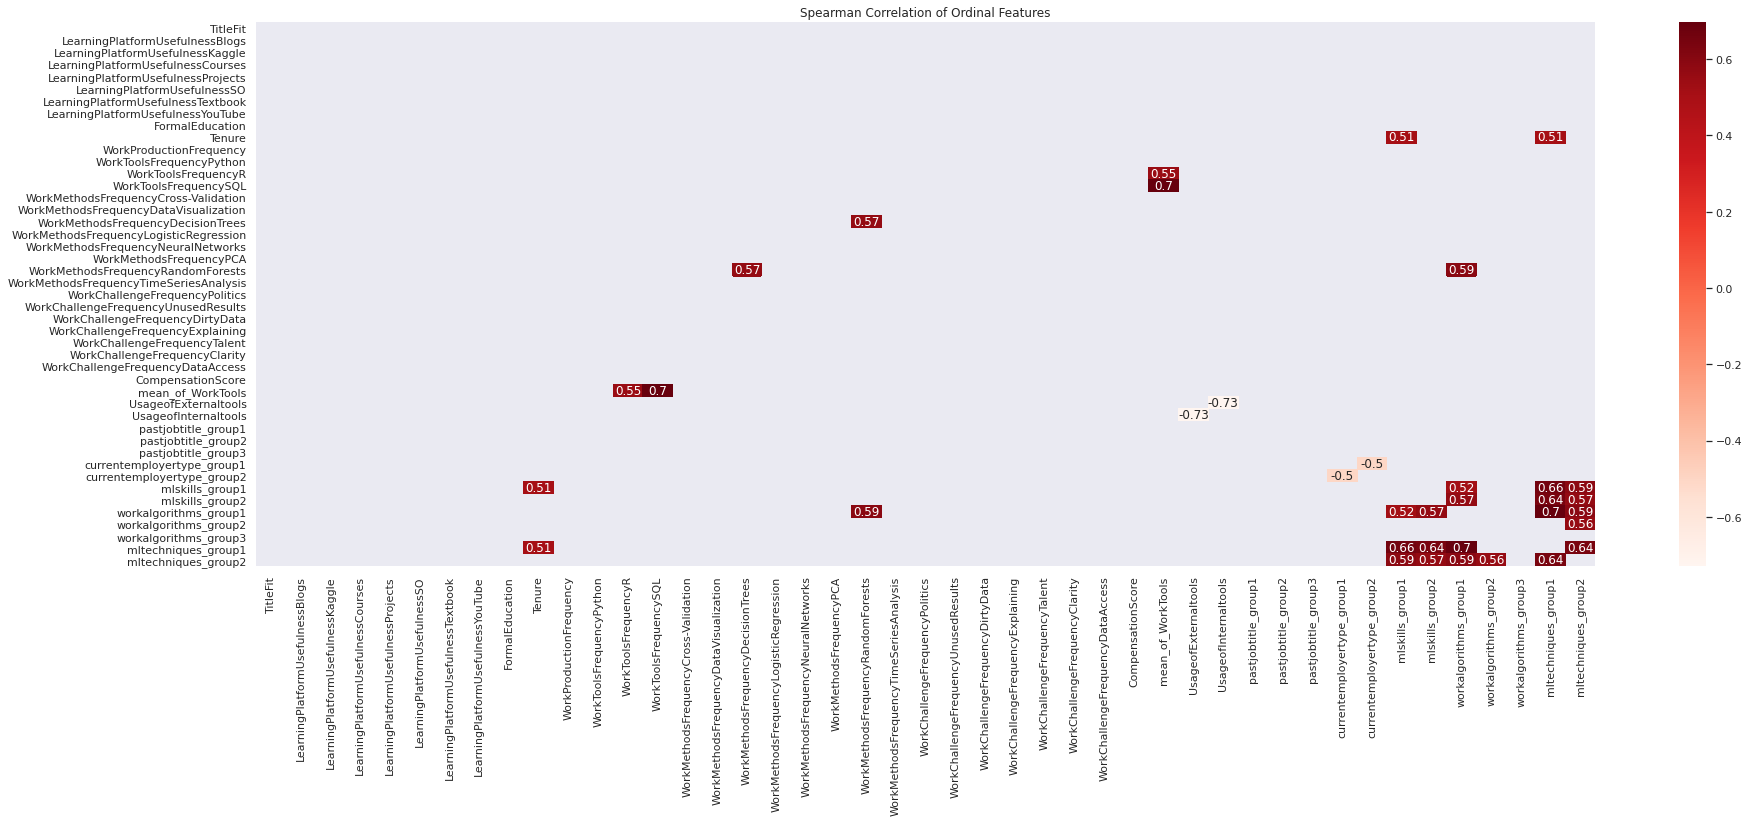

In [ ]:
dfCorr = result[ordinal_cols].corr(method='spearman')
filteredDf = dfCorr[((dfCorr >= .50) | (dfCorr <= -.50)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.title("Spearman Correlation of Ordinal Features");

plt.show()

Only the correlations greater than 0.5 or lower than -0.5 are shown in the heatmap above to make the graph readable. There is no multicollinearity risk among the features.

In [ ]:
#Spearman Correlation of Ordinal Features
def df_to_plotly(df):
    return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': df.index.tolist()}
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(df_to_plotly(pd.concat([result[ordinal_cols], y], axis=1).corr(method='spearman'))))

fig.update_layout(
    margin=dict(t=100, r=100, b=100, l=50),
    showlegend=False,
    width=1200, height=1200,
    autosize=False)

fig.show()            

In [ ]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr(method='spearman')
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

print("\033[1mSpearman Correlation among Ordinal Features (greater than 0.5 and lower than -0.5)")
print()
sprcorr = corrFilter(result[ordinal_cols], .50)
#print(pd.DataFrame(sprcorr).to_string())
pd.DataFrame(sprcorr).reset_index().rename(columns={'level_0': 'feature1', 'level_1': 'feature2', 0: 'Spearman_Corr'}).dropna()

Spearman Correlation among Ordinal Features (greater than 0.5 and lower than -0.5)



feature1  ... Spearman_Corr
0                UsageofExternaltools  ...     -0.728632
1          currentemployertype_group1  ...     -0.504349
2                              Tenure  ...      0.509803
3                              Tenure  ...      0.510648
4               workalgorithms_group1  ...      0.522429
5                 WorkToolsFrequencyR  ...      0.547977
6               workalgorithms_group2  ...      0.558331
7               workalgorithms_group1  ...      0.565330
8   WorkMethodsFrequencyDecisionTrees  ...      0.565449
9                 mltechniques_group2  ...      0.566279
10                mltechniques_group2  ...      0.589003
11              workalgorithms_group1  ...      0.591327
12              workalgorithms_group1  ...      0.592465
13                mltechniques_group1  ...      0.643095
14                mltechniques_group1  ...      0.644031
15                    mlskills_group1  ...      0.663086
16              WorkToolsFrequencySQL  ...      0.695778
17              workalgorithms_group1  ...      0.696688

[18 rows x 3 columns]

The Spearman Rank Correlation analysis above tells that there is no highly correlated ordinal features except Usage of Internal Tools and External Tools, which are calculated features,  in the dataset.

**Correlation of Ordinal Features with the Target**

In [ ]:
ordinal_corr_w_target = pd.DataFrame(result[ordinal_cols+['JobSatisfaction']].corr(method='spearman')['JobSatisfaction']).sort_values(by='JobSatisfaction', ascending=False)
selected_ordinal_features = list(ordinal_corr_w_target[(ordinal_corr_w_target['JobSatisfaction'] >= selection_threshold) | (ordinal_corr_w_target['JobSatisfaction'] <= -selection_threshold)].index)[1:]
ordinal_corr_w_target[(ordinal_corr_w_target['JobSatisfaction'] >= selection_threshold) | (ordinal_corr_w_target['JobSatisfaction'] <= -selection_threshold)]

JobSatisfaction
JobSatisfaction                                1.000000
TitleFit                                       0.179047
currentemployertype_group1                     0.177325
workalgorithms_group1                          0.155274
WorkMethodsFrequencyCross-Validation           0.148395
WorkProductionFrequency                        0.129368
mltechniques_group1                            0.126208
pastjobtitle_group1                            0.119961
WorkMethodsFrequencyNeuralNetworks             0.113319
WorkMethodsFrequencyRandomForests              0.105850
WorkMethodsFrequencyPCA                        0.105013
WorkMethodsFrequencyLogisticRegression         0.097775
Tenure                                         0.093361
WorkMethodsFrequencyDataVisualization          0.092882
mltechniques_group2                            0.089084
FormalEducation                                0.089063
WorkToolsFrequencyPython                       0.086674
WorkMethodsFrequencyDecisionTrees              0.083592
mlskills_group2                                0.083591
mlskills_group1                                0.076081
mean_of_WorkTools                              0.072208
WorkChallengeFrequencyDirtyData                0.063291
WorkMethodsFrequencyTimeSeriesAnalysis         0.059051
LearningPlatformUsefulnessSO                   0.057973
workalgorithms_group3                          0.055927
WorkChallengeFrequencyDataAccess               0.050142
pastjobtitle_group2                           -0.057184
WorkChallengeFrequencyUnusedResults           -0.089021
currentemployertype_group2                    -0.151482
WorkChallengeFrequencyTalent                  -0.157206
WorkChallengeFrequencyPolitics                -0.210227

**Ordinal Features having 5% Spearman Correlation with the Target**

* TitleFit
* WorkMethodsFrequencyCross-Validation
* WorkProductionFrequency	
* WorkMethodsFrequencyLogisticRegression
* WorkMethodsFrequencyNeuralNetworks
* WorkMethodsFrequencyRandomForests	
* Tenure	
* WorkMethodsFrequencyPCA
* FormalEducation	
* WorkToolsFrequencyPython	
* WorkMethodsFrequencyDataVisualization
* WorkMethodsFrequencyDecisionTrees
* WorkChallengeFrequencyDataAccess
* WorkChallengeFrequencyDirtyData
* LearningPlatformUsefulnessSO	
* WorkMethodsFrequencyTimeSeriesAnalysis
* WorkChallengeFrequencyUnusedResults
* WorkChallengeFrequencyTalent	
* WorkChallengeFrequencyPolitics

**Correlation of Binary Features**

**Phi's Coeffifient among Binary Features**

In [ ]:
from sklearn.metrics import matthews_corrcoef
from itertools import combinations

phi_coefs = []
df_not_null = result[binary_cols].dropna(axis = 0)
for i, j  in combinations(df_not_null[binary_cols], 2):
  phi_coefs.append([i, j, matthews_corrcoef(df_not_null[i], df_not_null[j])])

for i in sorted(phi_coefs,key=lambda x: x[2], reverse=True):
  if i[2] >= 0.50 or i[2] <= -0.50:
    print(i[0],'-', i[1],':', i[2])

CurrentJobTitleSelect_group1 - CurrentJobTitleSelect_group2 : -0.6449442039640352
LanguageRecommendationSelect_Python - LanguageRecommendationSelect_R : -0.6854902829739733
isFullTimeEmp - EmployerSize_Missing : -0.7608837476577502


**Highly Correlated Binary Features via Phi's Coefficient Analysis:**

* CurrentJobTitleSelect_group2	vs. DataScienceIdentitySelect_Unanswered

Job titles in group 2:
  * Scientist/Researcher, 
  * Data Scientist,
  * Statistician, 
  * Operations Research Practitioner


**Cramer's V Correlation of Binary Variables with the Target**

In [ ]:
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramers_v_target = []
for i  in binary_cols:
  cramers_v_target.append(['JobSatisfaction', i, cramers_v(result['JobSatisfaction'], result[i])])

selected_binary_features = []
for i in sorted(cramers_v_target,key=lambda x: x[1], reverse=True):
  if i[2] <= -selection_threshold or i[2] >= selection_threshold:
    selected_binary_features.append(i[1])
    print(i[1],':', i[2])

continent_North America : 0.0828122769635807
continent_Asia : 0.14118065680114458
WorkMLTeamSeatSelect_Other : 0.05342566841120866
WorkMLTeamSeatSelect_IT Department : 0.07828152047913041
RemoteWork_Sometimes : 0.05189571440367688
RemoteWork_Never : 0.12326298483634304
RemoteWork_Most of the time : 0.057933414840916964
EmployerSize_Missing : 0.05323498527611985
EmployerIndustry_Government : 0.05612200897461242
DataScienceIdentitySelect_Unanswered : 0.1382646979847856
DataScienceIdentitySelect_Sort of (Explain more) : 0.057651014485669616


**Binary Features having >= 5% Cramer's V correlation with the target**
* continent_North America
* continent_Asia
* WorkMLTeamSeatSelect_IT Department
* RemoteWork_Never
* DataScienceIdentitySelect_Unanswered
* DataScienceIdentitySelect_Sort of (Explain more)
* CurrentJobTitleSelect_group2
* CurrentJobTitleSelect_group1

**Cramer's V Correlation of Multi-Labelled Features**

In [ ]:
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

multilabel_cramers_v_target = []
for i  in multi_categoric_cols:
  multilabel_cramers_v_target.append(['JobSatisfaction', i, cramers_v(result['JobSatisfaction'], result[i])])

multilabel_cramers_v_target

[['JobSatisfaction', 'MLToolNextYearSelect', 0.06028240977443879],
 ['JobSatisfaction', 'MLMethodNextYearSelect', 0.02582138632466454]]

In [ ]:
selected_multi_labelled_features = []
for i in sorted(multilabel_cramers_v_target,key=lambda x: x[1], reverse=True):
  if i[2] <= -selection_threshold or i[2] >= selection_threshold:
    selected_multi_labelled_features.append(i[1])
    print(i[1],':', i[2])

MLToolNextYearSelect : 0.06028240977443879


#Method - 1
**Feature Selection Based on Correlation Coefficients**

In [ ]:
total_selected_features = [item for sublist in [selected_binary_features, selected_ordinal_features, selected_continuous_features] for item in sublist]
if 'CompensationScore' in total_selected_features:
  total_selected_features.append("CompensationMissingIndicator") # bu iki değişken modele beraber girmeli

for i in total_selected_features:
  print(i)

continent_North America
continent_Asia
WorkMLTeamSeatSelect_Other
WorkMLTeamSeatSelect_IT Department
RemoteWork_Sometimes
RemoteWork_Never
RemoteWork_Most of the time
EmployerSize_Missing
EmployerIndustry_Government
DataScienceIdentitySelect_Unanswered
DataScienceIdentitySelect_Sort of (Explain more)
TitleFit
currentemployertype_group1
workalgorithms_group1
WorkMethodsFrequencyCross-Validation
WorkProductionFrequency
mltechniques_group1
pastjobtitle_group1
WorkMethodsFrequencyNeuralNetworks
WorkMethodsFrequencyRandomForests
WorkMethodsFrequencyPCA
WorkMethodsFrequencyLogisticRegression
Tenure
WorkMethodsFrequencyDataVisualization
mltechniques_group2
FormalEducation
WorkToolsFrequencyPython
WorkMethodsFrequencyDecisionTrees
mlskills_group2
mlskills_group1
mean_of_WorkTools
WorkChallengeFrequencyDirtyData
WorkMethodsFrequencyTimeSeriesAnalysis
LearningPlatformUsefulnessSO
workalgorithms_group3
WorkChallengeFrequencyDataAccess
pastjobtitle_group2
WorkChallengeFrequencyUnusedResults
curren

**Feature Generation**

In [ ]:
eye_ball_feature_selection = [
                              'TitleFit',
                              'LearningPlatformUsefulnessProjects',
                              'LearningPlatformUsefulnessSO',
                              'LearningPlatformUsefulnessTextbook',
                              'WorkProductionFrequency',
                              'WorkMethodsFrequencyCross-Validation',
                              'WorkMethodsFrequencyDataVisualization',
                              'WorkMethodsFrequencyDecisionTrees',
                              'WorkMethodsFrequencyLogisticRegression',
                              'WorkMethodsFrequencyNeuralNetworks',
                              'WorkMethodsFrequencyPCA',
                              'WorkMethodsFrequencyRandomForests',
                              'WorkMethodsFrequencyTimeSeriesAnalysis',
                              'WorkChallengeFrequencyPolitics',
                              'WorkChallengeFrequencyTalent',
                              'CompensationScore',
                              'mean_of_WorkTools',
                              'mean_of_the_workchallenge',
                              'mean_of_the_workmethods',
                              'DataScienceIdentitySelect_Unanswered',
                              'WorkMLTeamSeatSelect_IT Department',
                              'continent_Asia',
                              'continent_North America',
                              'CurrentJobTitleSelect_group1',
                              'CurrentJobTitleSelect_group2',
                              'pastjobtitle_group1',
                              'pastjobtitle_group2',
                              'currentemployertype_group1',
                              'currentemployertype_group2',
                              'mlskills_group1',
                              'mlskills_group2',
                              'workalgorithms_group1',
                              'workalgorithms_group3',
                              'mltechniques_group1'
                              ]

eyeball_num_cols = []

for i in eye_ball_feature_selection:
  if i in num_cols:
    eyeball_num_cols.append(i)

result2 = result[eye_ball_feature_selection]

result2['Is_TitleFit_2'] = result2['TitleFit'].apply(lambda x: 1 if x == 2 else 0)
result2['Is_LearningPlatformUsefulnessProjects_2'] = result2['LearningPlatformUsefulnessProjects'].apply(lambda x: 1 if x == 2 else 0)
result2['Is_LearningPlatformUsefulnessSO_0'] = result2['LearningPlatformUsefulnessSO'].apply(lambda x: 1 if x == 0 else 0)
result2['Is_LearningPlatformUsefulnessTextbook_0'] = result2['LearningPlatformUsefulnessTextbook'].apply(lambda x: 1 if x == 1 else 0)
result2['Is_WorkProductionFrequency_3'] = result2['WorkProductionFrequency'].apply(lambda x: 1 if x == 3 else 0)
result2['Is_WorkMethodsFrequencyCross-Validation_4'] = result['WorkMethodsFrequencyCross-Validation'].apply(lambda x: 1 if x == 4 else 0)
result2['Is_WorkMethodsFrequencyCross-Validation_0'] = result['WorkMethodsFrequencyCross-Validation'].apply(lambda x: 1 if x == 0 else 0)
result2['Is_WorkMethodsFrequencyDataVisualization_4'] = result['WorkMethodsFrequencyDataVisualization'].apply(lambda x: 1 if x == 4 else 0)
result2['Is_WorkMethodsFrequencyDataVisualization_0'] = result['WorkMethodsFrequencyDataVisualization'].apply(lambda x: 1 if x == 0 else 0)
result2['Is_WorkMethodsFrequencyDecisionTrees_0'] = result2['WorkMethodsFrequencyDecisionTrees'].apply(lambda x: 1 if x == 0 else 0)
result2['Is_WorkMethodsFrequencyLogisticRegression_0'] = result2['WorkMethodsFrequencyLogisticRegression'].apply(lambda x: 1 if x == 0 else 0)
result2['Is_WorkMethodsFrequencyNeuralNetworks_0'] = result2['WorkMethodsFrequencyNeuralNetworks'].apply(lambda x: 1 if x == 0 else 0)
result2['Is_WorkMethodsFrequencyPCA_0'] = result2['WorkMethodsFrequencyPCA'].apply(lambda x: 1 if x == 0 else 0)
result2['Is_WorkMethodsFrequencyRandomForests_0'] = result2['WorkMethodsFrequencyRandomForests'].apply(lambda x: 1 if x == 0 else 0)
result2['Is_WorkMethodsFrequencyTimeSeriesAnalysis_0'] = result2['WorkMethodsFrequencyTimeSeriesAnalysis'].apply(lambda x: 1 if x == 0 else 0)
result2['Is_WorkChallengeFrequencyPolitics_0'] = result2['WorkChallengeFrequencyPolitics'].apply(lambda x: 1 if x == 0 else 0)
result2['Is_WorkChallengeFrequencyPolitics_3'] = result2['WorkChallengeFrequencyPolitics'].apply(lambda x: 1 if x == 3 else 0)
result2['Is_WorkChallengeFrequencyTalent_0'] = result2['WorkChallengeFrequencyTalent'].apply(lambda x: 1 if x == 0 else 0)
result2['Is_WorkChallengeFrequencyTalent_3'] = result2['WorkChallengeFrequencyTalent'].apply(lambda x: 1 if x == 3 else 0)
result2['Is_CompensationScore_0'] = result2['CompensationScore'].apply(lambda x: 1 if x == 8 else 0)
result2['Is_mean_of_WorkTools_1_2'] = result2['mean_of_WorkTools'].apply(lambda x: 1 if x >=1 and x<=2 else 0)
result2['Is_mean_of_the_workchallenge_lowerthan0.02'] = result2['mean_of_the_workchallenge'].apply(lambda x: 1 if x < 0.02 else 0)
result2['Is_mean_of_the_workchallenge_greaterthan1.4'] = result2['mean_of_the_workchallenge'].apply(lambda x: 1 if x >= 1.4 else 0)
result2['Is_mean_of_the_workmethods_0'] = result2['WorkMethodsFrequencyPCA'].apply(lambda x: 1 if x >= 0.75 else 0)
result2['Is_WorkMLTeamSeatSelect_IT Department_1'] = result2['WorkMLTeamSeatSelect_IT Department'].apply(lambda x: 1 if x == 1 else 0)
result2['Is_pastjobtitle_group1_1'] = result2['pastjobtitle_group1'].apply(lambda x: 1 if x == 1 else 0)
result2['Is_pastjobtitle_group1_2'] = result2['pastjobtitle_group1'].apply(lambda x: 1 if x == 2 else 0)
result2['Is_pastjobtitle_group2_1'] = result2['pastjobtitle_group2'].apply(lambda x: 1 if x == 1 else 0)
result2['Is_pastjobtitle_group2_0'] = result2['pastjobtitle_group2'].apply(lambda x: 1 if x == 0 else 0)
result2['Is_mlskills_group1_lowerthan2'] = result2['mlskills_group1'].apply(lambda x: 1 if x < 2 else 0)
result2['Is_mlskills_group2_0'] = result2['mlskills_group2'].apply(lambda x: 1 if x == 0 else 0)
result2['Is_workalgorithms_group1_0'] = result2['workalgorithms_group1'].apply(lambda x: 1 if x == 0 else 0)
result2['Is_workalgorithms_group3_0'] = result2['workalgorithms_group3'].apply(lambda x: 1 if x == 0 else 0)
result2['Is_mltechniques_group1_lowerthan3'] = result2['mltechniques_group1'].apply(lambda x: 1 if x < 3 else 0)
result2['Is_mltechniques_group1_greaterthan3'] = result2['mltechniques_group1'].apply(lambda x: 1 if x > 3 else 0)

result2 = result2.drop(['TitleFit',"LearningPlatformUsefulnessProjects", "LearningPlatformUsefulnessSO", "LearningPlatformUsefulnessTextbook",
                        "WorkProductionFrequency", "WorkMethodsFrequencyCross-Validation", "WorkMethodsFrequencyDataVisualization", "WorkMethodsFrequencyDecisionTrees",
                        "WorkMethodsFrequencyLogisticRegression", "WorkMethodsFrequencyNeuralNetworks", "WorkMethodsFrequencyPCA", "WorkMethodsFrequencyRandomForests",
                        "WorkMethodsFrequencyTimeSeriesAnalysis", "WorkChallengeFrequencyPolitics", "WorkChallengeFrequencyTalent", "CompensationScore", "mean_of_WorkTools",
                        "mean_of_the_workchallenge", "WorkMethodsFrequencyPCA", "WorkMLTeamSeatSelect_IT Department", "pastjobtitle_group1", "pastjobtitle_group2",
                        "mlskills_group1", "mlskills_group2", "workalgorithms_group1", "workalgorithms_group3", "mltechniques_group1"], axis=1)
result2 = pd.concat([result2, result['JobSatisfaction']], axis=1)

In [ ]:
result2.head()

mean_of_the_workmethods  ...  JobSatisfaction
0                    0.375  ...                1
1                    0.875  ...                2
2                    1.625  ...                2
3                    1.250  ...                3
4                    2.000  ...                3

[5 rows x 44 columns]

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.5s finished


{'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_depth': 50, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
None

Train Data F1 Score:  0.9814430900798584
Test Data F1 Score:  0.5226863641103607

accuracy: 0.5300072306579898

[[ 55  98  57]
 [ 54 317 230]
 [ 28 183 361]]


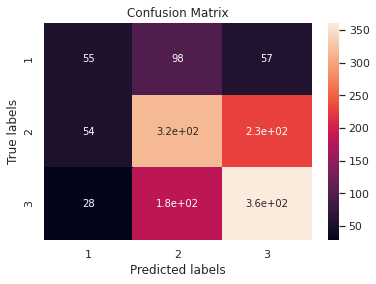

In [ ]:
from sklearn.compose import ColumnTransformer
seed=42
num_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                                  ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, selected_continuous_features)], remainder = 'passthrough') # preprocess numerical features and let the remaining ones pass through


from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, make_scorer

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier',   RandomForestClassifier(random_state=seed))])

params = [{'classifier__n_estimators'      : [200], 
           'classifier__max_features'      : ["sqrt"], 
           'classifier__criterion'         : ['entropy'], 
           'classifier__class_weight'      : ['balanced'], #{1: 3}, {2: 1}, {3: 1} 
           'classifier__max_depth'         : [50],
           'classifier__min_samples_split' : [10],
           'classifier__min_samples_leaf'  : [3]
           }
         ]

kfold = StratifiedKFold(n_splits = 5, random_state = seed, shuffle=True)
grid_search = GridSearchCV(pipeline, param_grid = params, cv = kfold, verbose = 1, n_jobs = -1, scoring="f1_weighted")
grid_search.fit(X_train[total_selected_features], y_train)
y_pred = grid_search.predict(X_test[total_selected_features])
print(print(grid_search.best_params_))
print()
print("Train Data F1 Score: ",f1_score(y_train, grid_search.predict(X_train[total_selected_features]), average='weighted'))
print("Test Data F1 Score: ",f1_score(y_test, y_pred, average='weighted'))
print()
print("accuracy:",accuracy_score(y_test, y_pred))
print()
cm = confusion_matrix(y_test, y_pred)
print(cm)
ax= plt.subplot()

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([1,2,3]); ax.yaxis.set_ticklabels([1,2,3]);

In this document, the exploratory data analysis and feature engineering is done and a simple model is built for trial. In order to keep the model building and EDA parts clean and readable, we continued to the modelling process in other notebooks.